<a href="https://colab.research.google.com/github/emkcosta/KillifishAtlas/blob/main/06_AgingClocks/PCR_validation_ALDR_250121.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Title: PCR_validation_ALDR_250121.ipynb
# Author: Lajoyce Mboning
# Edited/reviewed by: Emma K. Costa, Nimrod Rappoport
# Date:2024
# Related publication: Emma K. Costa, and Jingxun Chen, In prep.


# Description - run PC regression on the ALDR query dataset

In [ ]:
# If you need to install 'omics tools in your workspace
!pip install omicverse
!pip install torch_geometric

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.4/60.4 kB 1.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.4/44.4 kB 1.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
INFO: pip is looking at multiple versions of plotnine to determine which version is compatible with other requirements. This could take a while.
INFO: pip is still looking at multiple versions of plotnine to determine which version is compatible with other requirements. This could take a while.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 27.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 48.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 192.2/192.2 kB 10.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.8/5.8 MB 30.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.6/52.6 kB 3.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.4/45.4 kB 2.4 MB/s eta 0:

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.1/63.1 kB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 28.1 MB/s eta 0:00:00


# Set-Up

In [ ]:
import os
import pandas as pd
from scipy.stats import pearsonr, spearmanr
from scipy.stats import poisson
from pydeseq2.dds import DeseqDataSet
from pydeseq2.ds import DeseqStats
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LassoCV
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import Lasso
from numpy import arange
from numpy import absolute
from numpy import mean
from numpy import std
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.metrics import mean_absolute_error
import statsmodels.api as sm
lowess = sm.nonparametric.lowess
from matplotlib.lines import Line2D
from sklearn.decomposition import PCA
#import umap
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, make_scorer
#from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from scipy.stats import ttest_ind, mannwhitneyu

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
import os
os.chdir("/content/drive/My Drive/african_killifish_atlas/Code_check")

In [ ]:
palette = sns.color_palette("deep")
hex_codes = palette.as_hex()

print(hex_codes)

['#4c72b0', '#dd8452', '#55a868', '#c44e52', '#8172b3', '#937860', '#da8bc3', '#8c8c8c', '#ccb974', '#64b5cd']


### Load data

In [ ]:
df_norm = pd.read_csv("./AtlasFiles_forLajoyce_240507/CountsNormDESeq2_AllTissue_240506.csv")

In [ ]:
df_norm = df_norm.T

In [ ]:
df_norm.head(5)

a1cf        aaas         aacs       aadat       aaed1  \
A1_1   23876.707871  687.004459  2181.018965  576.907591  221.294706   
A1_2      36.845369  407.384647   349.683408  374.015256  493.588906   
A10_1   4821.965545  907.596706   218.510659  554.051370  191.503723   
A10_2      4.382338  451.380822  1198.256441  303.633424  289.860362   
A11_1   7011.583272  766.674115   222.103168  627.278822  272.285474   

            aagab         aak1        aamdc        aamp        aar2  ...  \
A1_1   884.077854  1368.504075  1348.686639  619.845370  636.359900  ...   
A1_2   469.257059   963.541161  1619.805848  453.962755  449.791581  ...   
A10_1  684.175695  1125.288972   662.897504  586.787050  637.527352  ...   
A10_2  445.120339  1093.080327   468.284126  709.312721  492.073962  ...   
A11_1  675.602523  1267.567871   975.767056  739.724358  713.703904  ...   

            zswim6      zswim7       zswim8       zufsp         zw10  \
A1_1    913.804009  178.356927  1117.483215  243.314079  1718.612117   
A1_2    774.447946   64.653195   670.168600  107.060129   777.923924   
A10_1   520.497299  128.487541  1351.165159  112.938093  1122.015404   
A10_2  1201.386683  131.470142   800.089724  174.667475  1304.058604   
A11_1   420.973787  192.365505  1129.101879  109.657631  1059.404232   

           zwilch       zyg11b          zyx        zzef1        zzz3  
A1_1    47.341653   568.099841  3323.824460  1566.678439  358.915791  
A1_2    19.465478   672.254187  2691.797529   191.873997  253.746410  
A10_1  311.807344   542.593883  2612.307200   408.377598  391.191366  
A10_2   28.172173  1264.617561  1144.416288   157.764171  238.524401  
A11_1  398.670540   521.338398  1948.746206   360.569160  446.064940  

[5 rows x 25122 columns]

In [ ]:
df_norm_frequency = df_norm.div(df_norm.sum(axis=1), axis=0)

In [ ]:
df_metadata = pd.read_csv("./AtlasFiles_forLajoyce_240507/ExperimentDesign_allbatches_combined_v7.csv")

df_metadata.head(3)

/usr/local/lib/python3.11/dist-packages/google/colab/_dataframe_summarizer.py:88: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  cast_date_col = pd.to_datetime(column, errors="coerce")


Unnamed: 0 animalID sex cohort  age_days harvest_date hatch_date  tissue  \
0       A1_1       J9   F      2       155      8/16/22    3/14/22     Gut   
1       A1_2      A01   M      2        78      5/31/22    3/14/22    Bone   
2      A10_1  P_1B_10   M     1B       133      1/31/22    9/20/21  Kidney   

  tissue_grind_date RNA_extract_date RNA_batch RNA_extractor   RNAID  \
0               NaN           3/8/23     Gut_1            EC  RNA352   
1           4/19/23          4/22/23    Bone_1            EC  RNA572   
2               NaN           3/4/23  Kidney_1            JC    R258   

   cDNA_batch plate_well sampleNames    lib  censored  censor_code  notes  
0           1         A1          A1   A1_1       NaN          NaN    NaN  
1           2         A1          A1   A1_2       NaN          NaN    NaN  
2           1        A10         A10  A10_1       NaN          NaN    NaN

In [ ]:
df_metadata.rename(columns={"Unnamed: 0": "sample"}, inplace=True)

df_metadata.head(3)

/usr/local/lib/python3.11/dist-packages/google/colab/_dataframe_summarizer.py:88: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  cast_date_col = pd.to_datetime(column, errors="coerce")


sample animalID sex cohort  age_days harvest_date hatch_date  tissue  \
0   A1_1       J9   F      2       155      8/16/22    3/14/22     Gut   
1   A1_2      A01   M      2        78      5/31/22    3/14/22    Bone   
2  A10_1  P_1B_10   M     1B       133      1/31/22    9/20/21  Kidney   

  tissue_grind_date RNA_extract_date RNA_batch RNA_extractor   RNAID  \
0               NaN           3/8/23     Gut_1            EC  RNA352   
1           4/19/23          4/22/23    Bone_1            EC  RNA572   
2               NaN           3/4/23  Kidney_1            JC    R258   

   cDNA_batch plate_well sampleNames    lib  censored  censor_code  notes  
0           1         A1          A1   A1_1       NaN          NaN    NaN  
1           2         A1          A1   A1_2       NaN          NaN    NaN  
2           1        A10         A10  A10_1       NaN          NaN    NaN

In [ ]:
df_metadata.set_index("sample", inplace=True)

In [ ]:
# Merge based on index
combined_df = pd.concat([df_norm_frequency, df_metadata[['sex', 'tissue', 'age_days']]], axis=1)

In [ ]:
combined_df["tissue"].value_counts()

tissue
Gut           55
Kidney        55
Muscle        55
Spleen        55
SpinalCord    54
Heart         54
Skin          54
Brain         54
Liver         54
Fat           53
Bone          51
Eye           37
Testis        31
Ovary         15
Name: count, dtype: int64

In [ ]:
df_norm_metadata = pd.concat([df_norm, df_metadata[["sex", "tissue", "age_days"]]], axis=1)

df_norm_metadata.head(5)

a1cf        aaas         aacs       aadat       aaed1  \
A1_1   23876.707871  687.004459  2181.018965  576.907591  221.294706   
A1_2      36.845369  407.384647   349.683408  374.015256  493.588906   
A10_1   4821.965545  907.596706   218.510659  554.051370  191.503723   
A10_2      4.382338  451.380822  1198.256441  303.633424  289.860362   
A11_1   7011.583272  766.674115   222.103168  627.278822  272.285474   

            aagab         aak1        aamdc        aamp        aar2  ...  \
A1_1   884.077854  1368.504075  1348.686639  619.845370  636.359900  ...   
A1_2   469.257059   963.541161  1619.805848  453.962755  449.791581  ...   
A10_1  684.175695  1125.288972   662.897504  586.787050  637.527352  ...   
A10_2  445.120339  1093.080327   468.284126  709.312721  492.073962  ...   
A11_1  675.602523  1267.567871   975.767056  739.724358  713.703904  ...   

            zufsp         zw10      zwilch       zyg11b          zyx  \
A1_1   243.314079  1718.612117   47.341653   568.099841  3323.824460   
A1_2   107.060129   777.923924   19.465478   672.254187  2691.797529   
A10_1  112.938093  1122.015404  311.807344   542.593883  2612.307200   
A10_2  174.667475  1304.058604   28.172173  1264.617561  1144.416288   
A11_1  109.657631  1059.404232  398.670540   521.338398  1948.746206   

             zzef1        zzz3  sex      tissue  age_days  
A1_1   1566.678439  358.915791    F         Gut       155  
A1_2    191.873997  253.746410    M        Bone        78  
A10_1   408.377598  391.191366    M      Kidney       133  
A10_2   157.764171  238.524401    M  SpinalCord        75  
A11_1   360.569160  446.064940    M      Kidney        47  

[5 rows x 25125 columns]

# Liver

In [ ]:
liver_df_norm = df_norm_metadata.loc[df_norm_metadata.iloc[:,-2] == "Liver"]

liver_df_norm.head(5)

a1cf        aaas          aacs        aadat       aaed1  \
A5_1  100443.541866  569.498293   9197.259866   817.106246   41.267992   
A6_1   43882.858900  853.088237  19132.800486  1147.075568   81.371493   
A7_1   46308.620187  503.876178   3746.507910   867.215463  126.825977   
A8_1  139272.752006  589.285647   3047.097867  1149.107012   76.116063   
B5_1   50060.335020  509.903707   3616.007271   556.585032   32.317841   

            aagab         aak1        aamdc         aamp        aar2  ...  \
A5_1  1034.451005   982.178215  4385.411973   935.407824  558.493495  ...   
A6_1  1433.188238  1212.697740  1622.180093  1532.933939  713.969232  ...   
A7_1  1144.861521  1357.380725  1669.304073   970.047336  647.840801  ...   
A8_1  1023.883812  1092.633804  2536.383640   989.508816  643.303498  ...   
B5_1  1037.761769  1052.125254  1658.982482  1138.306162  621.220713  ...   

           zufsp         zw10      zwilch      zyg11b          zyx  \
A5_1  101.794381  1141.747785    2.751199  511.723104  2555.864318   
A6_1  118.119910  2543.515389  307.111765  425.231675  2302.025796   
A7_1   41.132749  3033.540256    3.427729  414.755222  3191.215795   
A8_1  130.133914  1156.473083   22.098212  564.732079  2492.187216   
B5_1   25.136098  2007.296986    3.590871  373.450602  2330.475391   

           zzef1        zzz3  sex  tissue  age_days  
A5_1  299.880743  448.445515    M   Liver       134  
A6_1  782.216291  577.475114    F   Liver        52  
A7_1  586.141677  661.551717    F   Liver       133  
A8_1  378.124957  414.955310    M   Liver       133  
B5_1  570.948516  416.541056    F   Liver       102  

[5 rows x 25125 columns]

### Prep the data

In [ ]:
liver_df_norm_male = liver_df_norm.loc[liver_df_norm.iloc[:,-3] == "M"]

liver_df_norm_male.head(10)

a1cf        aaas          aacs        aadat       aaed1  \
A5_1  100443.541866  569.498293   9197.259866   817.106246   41.267992   
A8_1  139272.752006  589.285647   3047.097867  1149.107012   76.116063   
B7_1  106880.160432  442.985714  13625.869465   670.276813   71.898205   
C5_1  113772.810228  696.735509  24082.457958   633.892699   62.842811   
C7_1  109847.738206  626.472460   8772.952023   818.154332   91.165768   
C8_1  120512.564121  453.453515  32508.109043   713.327460   34.473074   
D5_1  110754.084236  532.729926   4364.646935   848.162118   95.797925   
D6_1  108720.361898  552.347309  14009.536280   555.136941   86.478619   
D8_1   97406.083923  612.691342   9430.118915   606.771619   20.719031   
E5_1   63424.406516  729.152444   7287.572397   652.087552  124.489442   

            aagab         aak1        aamdc         aamp        aar2  ...  \
A5_1  1034.451005   982.178215  4385.411973   935.407824  558.493495  ...   
A8_1  1023.883812  1092.633804  2536.383640   989.508816  643.303498  ...   
B7_1  1080.792369  1289.529093  2620.805531   772.325878  712.024158  ...   
C5_1  1158.493553   920.783791  3191.321862   857.940980  740.452247  ...   
C7_1  1302.034180  1491.378468  2718.609966   885.944262  883.606679  ...   
C8_1  1100.486602  1195.950500  2495.320223   633.774212  546.265639  ...   
D5_1  1182.286589  1161.257777  2855.245479   950.969648  834.142910  ...   
D6_1  1224.648831   928.947746  2248.444094   797.835001  549.557676  ...   
D8_1  1009.312790  1450.332162  1731.519010  1068.510021  654.129404  ...   
E5_1   912.922573  1084.836563  1381.239996   782.505062  567.118568  ...   

           zufsp         zw10     zwilch      zyg11b          zyx       zzef1  \
A5_1  101.794381  1141.747785   2.751199  511.723104  2555.864318  299.880743   
A8_1  130.133914  1156.473083  22.098212  564.732079  2492.187216  378.124957   
B7_1   34.789454  1338.234329   6.957891  547.354076  2435.261777  582.143529   
C5_1  166.670063  1155.761257  24.590665  478.151820  2330.648586  237.709762   
C7_1  179.993953   766.727488  16.363087  523.618773  2966.393850  367.000658   
C8_1  108.722773  1522.118818   7.955325  543.613864  2704.810443  540.962089   
D5_1  119.163273  1341.170953  25.701882  502.354974  3196.379554  654.229733   
D6_1  203.643200  1344.603044   8.368899  493.765018  2033.642363  337.545577   
D8_1   85.835985  1038.911406   2.959862  340.384079  2290.932844  526.855357   
E5_1  158.081831  1343.695561  82.992961  452.509240  2918.585800  456.461286   

            zzz3  sex  tissue  age_days  
A5_1  448.445515    M   Liver       134  
A8_1  414.955310    M   Liver       133  
B7_1  565.908451    M   Liver       133  
C5_1  437.167378    M   Liver       162  
C7_1  446.478507    M   Liver       152  
C8_1  570.131613    M   Liver       133  
D5_1  497.681904    M   Liver       102  
D6_1  323.597413    M   Liver       162  
D8_1  399.581310    M   Liver       152  
E5_1  286.523318    M   Liver       162  

[10 rows x 25125 columns]

In [ ]:
liver_df_norm_expression_male = liver_df_norm_male.iloc[:,:-3]

liver_df_norm_expression_male.head(5)

a1cf        aaas          aacs        aadat      aaed1  \
A5_1  100443.541866  569.498293   9197.259866   817.106246  41.267992   
A8_1  139272.752006  589.285647   3047.097867  1149.107012  76.116063   
B7_1  106880.160432  442.985714  13625.869465   670.276813  71.898205   
C5_1  113772.810228  696.735509  24082.457958   633.892699  62.842811   
C7_1  109847.738206  626.472460   8772.952023   818.154332  91.165768   

            aagab         aak1        aamdc        aamp        aar2  ...  \
A5_1  1034.451005   982.178215  4385.411973  935.407824  558.493495  ...   
A8_1  1023.883812  1092.633804  2536.383640  989.508816  643.303498  ...   
B7_1  1080.792369  1289.529093  2620.805531  772.325878  712.024158  ...   
C5_1  1158.493553   920.783791  3191.321862  857.940980  740.452247  ...   
C7_1  1302.034180  1491.378468  2718.609966  885.944262  883.606679  ...   

          zswim6      zswim7       zswim8       zufsp         zw10     zwilch  \
A5_1  228.349557   71.531187   723.565464  101.794381  1141.747785   2.751199   
A8_1  184.151765   56.473208   785.714196  130.133914  1156.473083  22.098212   
B7_1  306.147195  104.368362  1386.939564   34.789454  1338.234329   6.957891   
C5_1  204.922209  131.150214   833.350315  166.670063  1155.761257  24.590665   
C7_1  184.669121   39.738925  1259.957671  179.993953   766.727488  16.363087   

          zyg11b          zyx       zzef1        zzz3  
A5_1  511.723104  2555.864318  299.880743  448.445515  
A8_1  564.732079  2492.187216  378.124957  414.955310  
B7_1  547.354076  2435.261777  582.143529  565.908451  
C5_1  478.151820  2330.648586  237.709762  437.167378  
C7_1  523.618773  2966.393850  367.000658  446.478507  

[5 rows x 25122 columns]

In [ ]:
liver_pca_df_male = liver_df_norm_expression_male.copy()

liver_pca_df_male.head(5)

a1cf        aaas          aacs        aadat      aaed1  \
A5_1  100443.541866  569.498293   9197.259866   817.106246  41.267992   
A8_1  139272.752006  589.285647   3047.097867  1149.107012  76.116063   
B7_1  106880.160432  442.985714  13625.869465   670.276813  71.898205   
C5_1  113772.810228  696.735509  24082.457958   633.892699  62.842811   
C7_1  109847.738206  626.472460   8772.952023   818.154332  91.165768   

            aagab         aak1        aamdc        aamp        aar2  ...  \
A5_1  1034.451005   982.178215  4385.411973  935.407824  558.493495  ...   
A8_1  1023.883812  1092.633804  2536.383640  989.508816  643.303498  ...   
B7_1  1080.792369  1289.529093  2620.805531  772.325878  712.024158  ...   
C5_1  1158.493553   920.783791  3191.321862  857.940980  740.452247  ...   
C7_1  1302.034180  1491.378468  2718.609966  885.944262  883.606679  ...   

          zswim6      zswim7       zswim8       zufsp         zw10     zwilch  \
A5_1  228.349557   71.531187   723.565464  101.794381  1141.747785   2.751199   
A8_1  184.151765   56.473208   785.714196  130.133914  1156.473083  22.098212   
B7_1  306.147195  104.368362  1386.939564   34.789454  1338.234329   6.957891   
C5_1  204.922209  131.150214   833.350315  166.670063  1155.761257  24.590665   
C7_1  184.669121   39.738925  1259.957671  179.993953   766.727488  16.363087   

          zyg11b          zyx       zzef1        zzz3  
A5_1  511.723104  2555.864318  299.880743  448.445515  
A8_1  564.732079  2492.187216  378.124957  414.955310  
B7_1  547.354076  2435.261777  582.143529  565.908451  
C5_1  478.151820  2330.648586  237.709762  437.167378  
C7_1  523.618773  2966.393850  367.000658  446.478507  

[5 rows x 25122 columns]

In [ ]:
liver_df_male_age = liver_df_norm_expression_male.copy()

liver_df_male_age.head(3)

a1cf        aaas          aacs        aadat      aaed1  \
A5_1  100443.541866  569.498293   9197.259866   817.106246  41.267992   
A8_1  139272.752006  589.285647   3047.097867  1149.107012  76.116063   
B7_1  106880.160432  442.985714  13625.869465   670.276813  71.898205   

            aagab         aak1        aamdc        aamp        aar2  ...  \
A5_1  1034.451005   982.178215  4385.411973  935.407824  558.493495  ...   
A8_1  1023.883812  1092.633804  2536.383640  989.508816  643.303498  ...   
B7_1  1080.792369  1289.529093  2620.805531  772.325878  712.024158  ...   

          zswim6      zswim7       zswim8       zufsp         zw10     zwilch  \
A5_1  228.349557   71.531187   723.565464  101.794381  1141.747785   2.751199   
A8_1  184.151765   56.473208   785.714196  130.133914  1156.473083  22.098212   
B7_1  306.147195  104.368362  1386.939564   34.789454  1338.234329   6.957891   

          zyg11b          zyx       zzef1        zzz3  
A5_1  511.723104  2555.864318  299.880743  448.445515  
A8_1  564.732079  2492.187216  378.124957  414.955310  
B7_1  547.354076  2435.261777  582.143529  565.908451  

[3 rows x 25122 columns]

In [ ]:
liver_df_male_age["age"] = liver_df_norm_male["age_days"].tolist()

liver_df_male_age.head(3)

a1cf        aaas          aacs        aadat      aaed1  \
A5_1  100443.541866  569.498293   9197.259866   817.106246  41.267992   
A8_1  139272.752006  589.285647   3047.097867  1149.107012  76.116063   
B7_1  106880.160432  442.985714  13625.869465   670.276813  71.898205   

            aagab         aak1        aamdc        aamp        aar2  ...  \
A5_1  1034.451005   982.178215  4385.411973  935.407824  558.493495  ...   
A8_1  1023.883812  1092.633804  2536.383640  989.508816  643.303498  ...   
B7_1  1080.792369  1289.529093  2620.805531  772.325878  712.024158  ...   

          zswim7       zswim8       zufsp         zw10     zwilch      zyg11b  \
A5_1   71.531187   723.565464  101.794381  1141.747785   2.751199  511.723104   
A8_1   56.473208   785.714196  130.133914  1156.473083  22.098212  564.732079   
B7_1  104.368362  1386.939564   34.789454  1338.234329   6.957891  547.354076   

              zyx       zzef1        zzz3  age  
A5_1  2555.864318  299.880743  448.445515  134  
A8_1  2492.187216  378.124957  414.955310  133  
B7_1  2435.261777  582.143529  565.908451  133  

[3 rows x 25123 columns]

In [ ]:
df_cr = pd.read_csv("./Data_from_Others/ALDR/GSE216369_CountsNormDESeq2_Liver_ALDR_220331.csv")

df_cr.head(5)

f_AL_L_1    m_AL_L_1    m_DR_L_1    f_AL_L_2    f_DR_L_1  \
LOC107375582    1.065663    1.024315    0.951840    1.682535    0.826384   
LOC107388276    1.065663    6.145888    0.951840    1.682535    0.826384   
LOC107382448    2.131327    1.024315    0.951840    1.682535    0.826384   
LOC107377727  188.622436   35.851012   16.181281   11.777742   15.701294   
pex1          152.389878  382.069355  357.891867  215.364425  376.831063   

                m_AL_L_2    m_DR_L_2    f_DR_L_2    f_AL_L_3    m_DR_L_3  \
LOC107375582    0.980873    2.279668    1.071467    1.053069    3.387973   
LOC107388276    0.980873    0.759889    1.071467    1.053069    1.129324   
LOC107382448    0.980873    0.759889    1.071467    1.053069    1.129324   
LOC107377727   26.483570   11.398339   39.644275   35.804344    5.646621   
pex1          225.600785  373.865526  259.294991  354.884231  348.961172   

                f_AL_L_4    f_DR_L_3    m_AL_L_3    m_DR_L_4    f_DR_L_4  \
LOC107375582    1.044274    1.253454    0.920191    0.822090    1.170773   
LOC107388276    1.044274    1.253454    2.760574    0.822090    1.170773   
LOC107382448    1.044274    1.253454    0.920191    0.822090    1.170773   
LOC107377727  109.648747   43.870890    0.920191    2.466270   71.417142   
pex1          296.573754  304.589324  221.766100  307.461626  313.767115   

                m_AL_L_4  
LOC107375582    0.962468  
LOC107388276    6.737274  
LOC107382448    0.962468  
LOC107377727   28.874033  
pex1          336.863721

In [ ]:
df_cr = df_cr.T

df_cr.head(3)

LOC107375582  LOC107388276  LOC107382448  LOC107377727        pex1  \
f_AL_L_1      1.065663      1.065663      2.131327    188.622436  152.389878   
m_AL_L_1      1.024315      6.145888      1.024315     35.851012  382.069355   
m_DR_L_1      0.951840      0.951840      0.951840     16.181281  357.891867   

          LOC107393665  LOC107377394      zbtb41  LOC107377691       tuba4a  \
f_AL_L_1      9.590971      1.065663  101.238031    411.346104   902.616968   
m_AL_L_1     23.559236      1.024315  116.771867    416.896052  1215.861458   
m_DR_L_1     42.832803      0.951840   84.713766    280.792821  1391.590185   

          ...  LOC107393324         chp1  LOC107392884  LOC107372821  \
f_AL_L_1  ...      3.196990  1459.958969      1.065663    822.692207   
m_AL_L_1  ...      1.024315  2692.923145      1.024315    778.479114   
m_DR_L_1  ...      0.951840  2039.793274      0.951840    801.449340   

          LOC107386901  LOC107386251  LOC107378151       dag1  LOC107396310  \
f_AL_L_1      3.196990    596.771549      1.065663  22.378933     41.560876   
m_AL_L_1      9.218832    497.816907      3.072944  19.461978      5.121573   
m_DR_L_1      8.566561    635.829168      4.759200  33.314403     27.603362   

          LOC107378249  
f_AL_L_1     83.121752  
m_AL_L_1     21.510607  
m_DR_L_1     25.699682  

[3 rows x 22619 columns]

In [ ]:
df_cr_age = df_cr.copy()

In [ ]:
df_cr_age["treatment"] = ''
df_cr_age["tissue"] = ''
df_cr_age.loc[df_cr_age.index.str.contains("AL"), "treatment"] = "AL"
df_cr_age.loc[df_cr_age.index.str.contains("DR"), "treatment"] = "DR"
df_cr_age.loc[df_cr_age.index.str.contains("BR"), "tissue"] = "Brain"
# Step 4: Assign "Liver" to all rows where the tissue is not "Brain"
df_cr_age.loc[df_cr_age["tissue"] != "Brain", "tissue"] = "Liver"

In [ ]:
df_cr_age_liver = df_cr_age[df_cr_age["tissue"] == "Liver"]

df_cr_age_liver.head(5)

LOC107375582  LOC107388276  LOC107382448  LOC107377727        pex1  \
f_AL_L_1      1.065663      1.065663      2.131327    188.622436  152.389878   
m_AL_L_1      1.024315      6.145888      1.024315     35.851012  382.069355   
m_DR_L_1      0.951840      0.951840      0.951840     16.181281  357.891867   
f_AL_L_2      1.682535      1.682535      1.682535     11.777742  215.364425   
f_DR_L_1      0.826384      0.826384      0.826384     15.701294  376.831063   

          LOC107393665  LOC107377394      zbtb41  LOC107377691       tuba4a  \
f_AL_L_1      9.590971      1.065663  101.238031    411.346104   902.616968   
m_AL_L_1     23.559236      1.024315  116.771867    416.896052  1215.861458   
m_DR_L_1     42.832803      0.951840   84.713766    280.792821  1391.590185   
f_AL_L_2      5.047604      5.047604   31.968157    464.379542   792.473784   
f_DR_L_1     32.228973      0.826384  123.131203    187.589148  2644.428513   

          ...  LOC107392884  LOC107372821  LOC107386901  LOC107386251  \
f_AL_L_1  ...      1.065663    822.692207      3.196990    596.771549   
m_AL_L_1  ...      1.024315    778.479114      9.218832    497.816907   
m_DR_L_1  ...      0.951840    801.449340      8.566561    635.829168   
f_AL_L_2  ...      1.682535   1068.409454      5.047604    329.776776   
f_DR_L_1  ...      0.826384   2487.415570      0.826384    379.310215   

          LOC107378151       dag1  LOC107396310  LOC107378249  treatment  \
f_AL_L_1      1.065663  22.378933     41.560876     83.121752         AL   
m_AL_L_1      3.072944  19.461978      5.121573     21.510607         AL   
m_DR_L_1      4.759200  33.314403     27.603362     25.699682         DR   
f_AL_L_2      1.682535  45.428433      8.412673     42.063364         AL   
f_DR_L_1     14.048526  14.048526     12.395759     13.222143         DR   

          tissue  
f_AL_L_1   Liver  
m_AL_L_1   Liver  
m_DR_L_1   Liver  
f_AL_L_2   Liver  
f_DR_L_1   Liver  

[5 rows x 22621 columns]

In [ ]:
df_cr_age_liver.loc[:, "sex"] = ''

df_cr_age_liver.loc[df_cr_age_liver.index.str.startswith("f"), "sex"] = "f"
df_cr_age_liver.loc[df_cr_age_liver.index.str.startswith("m"), 'sex'] = "m"

df_cr_age_liver.head(10)

LOC107375582  LOC107388276  LOC107382448  LOC107377727        pex1  \
f_AL_L_1      1.065663      1.065663      2.131327    188.622436  152.389878   
m_AL_L_1      1.024315      6.145888      1.024315     35.851012  382.069355   
m_DR_L_1      0.951840      0.951840      0.951840     16.181281  357.891867   
f_AL_L_2      1.682535      1.682535      1.682535     11.777742  215.364425   
f_DR_L_1      0.826384      0.826384      0.826384     15.701294  376.831063   
m_AL_L_2      0.980873      0.980873      0.980873     26.483570  225.600785   
m_DR_L_2      2.279668      0.759889      0.759889     11.398339  373.865526   
f_DR_L_2      1.071467      1.071467      1.071467     39.644275  259.294991   
f_AL_L_3      1.053069      1.053069      1.053069     35.804344  354.884231   
m_DR_L_3      3.387973      1.129324      1.129324      5.646621  348.961172   

          LOC107393665  LOC107377394      zbtb41  LOC107377691       tuba4a  \
f_AL_L_1      9.590971      1.065663  101.238031    411.346104   902.616968   
m_AL_L_1     23.559236      1.024315  116.771867    416.896052  1215.861458   
m_DR_L_1     42.832803      0.951840   84.713766    280.792821  1391.590185   
f_AL_L_2      5.047604      5.047604   31.968157    464.379542   792.473784   
f_DR_L_1     32.228973      0.826384  123.131203    187.589148  2644.428513   
m_AL_L_2     10.789603      2.942619  117.704757    297.204512  2504.168709   
m_DR_L_2     53.952139     17.477453   96.505939    227.206895  2452.922597   
f_DR_L_2     26.786673      1.071467  155.362701    296.796332  1856.852144   
f_AL_L_3      9.477620      5.265345  118.996790    223.250614  1613.301608   
m_DR_L_3     21.457159      1.129324  105.027149    272.167128  1176.755797   

          ...  LOC107372821  LOC107386901  LOC107386251  LOC107378151  \
f_AL_L_1  ...    822.692207      3.196990    596.771549      1.065663   
m_AL_L_1  ...    778.479114      9.218832    497.816907      3.072944   
m_DR_L_1  ...    801.449340      8.566561    635.829168      4.759200   
f_AL_L_2  ...   1068.409454      5.047604    329.776776      1.682535   
f_DR_L_1  ...   2487.415570      0.826384    379.310215     14.048526   
m_AL_L_2  ...    788.621873      0.980873    470.819029     22.560078   
m_DR_L_2  ...    834.358430     12.918118    568.397182      6.839004   
f_DR_L_2  ...   2045.430319      7.500268    326.797406      9.643202   
f_AL_L_3  ...   1268.948067      5.265345    390.688575     11.583758   
m_DR_L_3  ...    682.111806      1.129324    457.376293      3.387973   

               dag1  LOC107396310  LOC107378249  treatment  tissue  sex  
f_AL_L_1  22.378933     41.560876     83.121752         AL   Liver    f  
m_AL_L_1  19.461978      5.121573     21.510607         AL   Liver    m  
m_DR_L_1  33.314403     27.603362     25.699682         DR   Liver    m  
f_AL_L_2  45.428433      8.412673     42.063364         AL   Liver    f  
f_DR_L_1  14.048526     12.395759     13.222143         DR   Liver    f  
m_AL_L_2  18.636587      6.866111     60.814125         AL   Liver    m  
m_DR_L_2  34.195018      8.358782     23.556568         DR   Liver    m  
f_DR_L_2  22.500805      5.357335     78.217084         DR   Liver    f  
f_AL_L_3  26.326723      7.371483     63.184136         AL   Liver    f  
m_DR_L_3   7.905269     16.939863     28.233105         DR   Liver    m  

[10 rows x 22622 columns]

In [ ]:
df_cr_age_liver.shape

(16, 22622)

In [ ]:
df_cr_age_liver_raw_counts = df_cr_age_liver.iloc[:,:-3]

df_cr_age_liver_raw_counts.head(5)

LOC107375582  LOC107388276  LOC107382448  LOC107377727        pex1  \
f_AL_L_1      1.065663      1.065663      2.131327    188.622436  152.389878   
m_AL_L_1      1.024315      6.145888      1.024315     35.851012  382.069355   
m_DR_L_1      0.951840      0.951840      0.951840     16.181281  357.891867   
f_AL_L_2      1.682535      1.682535      1.682535     11.777742  215.364425   
f_DR_L_1      0.826384      0.826384      0.826384     15.701294  376.831063   

          LOC107393665  LOC107377394      zbtb41  LOC107377691       tuba4a  \
f_AL_L_1      9.590971      1.065663  101.238031    411.346104   902.616968   
m_AL_L_1     23.559236      1.024315  116.771867    416.896052  1215.861458   
m_DR_L_1     42.832803      0.951840   84.713766    280.792821  1391.590185   
f_AL_L_2      5.047604      5.047604   31.968157    464.379542   792.473784   
f_DR_L_1     32.228973      0.826384  123.131203    187.589148  2644.428513   

          ...  LOC107393324         chp1  LOC107392884  LOC107372821  \
f_AL_L_1  ...      3.196990  1459.958969      1.065663    822.692207   
m_AL_L_1  ...      1.024315  2692.923145      1.024315    778.479114   
m_DR_L_1  ...      0.951840  2039.793274      0.951840    801.449340   
f_AL_L_2  ...      1.682535  5838.394970      1.682535   1068.409454   
f_DR_L_1  ...      0.826384  1765.982416      0.826384   2487.415570   

          LOC107386901  LOC107386251  LOC107378151       dag1  LOC107396310  \
f_AL_L_1      3.196990    596.771549      1.065663  22.378933     41.560876   
m_AL_L_1      9.218832    497.816907      3.072944  19.461978      5.121573   
m_DR_L_1      8.566561    635.829168      4.759200  33.314403     27.603362   
f_AL_L_2      5.047604    329.776776      1.682535  45.428433      8.412673   
f_DR_L_1      0.826384    379.310215     14.048526  14.048526     12.395759   

          LOC107378249  
f_AL_L_1     83.121752  
m_AL_L_1     21.510607  
m_DR_L_1     25.699682  
f_AL_L_2     42.063364  
f_DR_L_1     13.222143  

[5 rows x 22619 columns]

In [ ]:
df_cr_age_liver_counts_female = df_cr_age_liver[df_cr_age_liver["sex"] == "f"]

df_cr_age_liver_counts_female.head(5)

LOC107375582  LOC107388276  LOC107382448  LOC107377727        pex1  \
f_AL_L_1      1.065663      1.065663      2.131327    188.622436  152.389878   
f_AL_L_2      1.682535      1.682535      1.682535     11.777742  215.364425   
f_DR_L_1      0.826384      0.826384      0.826384     15.701294  376.831063   
f_DR_L_2      1.071467      1.071467      1.071467     39.644275  259.294991   
f_AL_L_3      1.053069      1.053069      1.053069     35.804344  354.884231   

          LOC107393665  LOC107377394      zbtb41  LOC107377691       tuba4a  \
f_AL_L_1      9.590971      1.065663  101.238031    411.346104   902.616968   
f_AL_L_2      5.047604      5.047604   31.968157    464.379542   792.473784   
f_DR_L_1     32.228973      0.826384  123.131203    187.589148  2644.428513   
f_DR_L_2     26.786673      1.071467  155.362701    296.796332  1856.852144   
f_AL_L_3      9.477620      5.265345  118.996790    223.250614  1613.301608   

          ...  LOC107372821  LOC107386901  LOC107386251  LOC107378151  \
f_AL_L_1  ...    822.692207      3.196990    596.771549      1.065663   
f_AL_L_2  ...   1068.409454      5.047604    329.776776      1.682535   
f_DR_L_1  ...   2487.415570      0.826384    379.310215     14.048526   
f_DR_L_2  ...   2045.430319      7.500268    326.797406      9.643202   
f_AL_L_3  ...   1268.948067      5.265345    390.688575     11.583758   

               dag1  LOC107396310  LOC107378249  treatment  tissue  sex  
f_AL_L_1  22.378933     41.560876     83.121752         AL   Liver    f  
f_AL_L_2  45.428433      8.412673     42.063364         AL   Liver    f  
f_DR_L_1  14.048526     12.395759     13.222143         DR   Liver    f  
f_DR_L_2  22.500805      5.357335     78.217084         DR   Liver    f  
f_AL_L_3  26.326723      7.371483     63.184136         AL   Liver    f  

[5 rows x 22622 columns]

In [ ]:
df_cr_age_liver_counts_female

LOC107375582  LOC107388276  LOC107382448  LOC107377727        pex1  \
f_AL_L_1      1.065663      1.065663      2.131327    188.622436  152.389878   
f_AL_L_2      1.682535      1.682535      1.682535     11.777742  215.364425   
f_DR_L_1      0.826384      0.826384      0.826384     15.701294  376.831063   
f_DR_L_2      1.071467      1.071467      1.071467     39.644275  259.294991   
f_AL_L_3      1.053069      1.053069      1.053069     35.804344  354.884231   
f_AL_L_4      1.044274      1.044274      1.044274    109.648747  296.573754   
f_DR_L_3      1.253454      1.253454      1.253454     43.870890  304.589324   
f_DR_L_4      1.170773      1.170773      1.170773     71.417142  313.767115   

          LOC107393665  LOC107377394      zbtb41  LOC107377691       tuba4a  \
f_AL_L_1      9.590971      1.065663  101.238031    411.346104   902.616968   
f_AL_L_2      5.047604      5.047604   31.968157    464.379542   792.473784   
f_DR_L_1     32.228973      0.826384  123.131203    187.589148  2644.428513   
f_DR_L_2     26.786673      1.071467  155.362701    296.796332  1856.852144   
f_AL_L_3      9.477620      5.265345  118.996790    223.250614  1613.301608   
f_AL_L_4      3.132821      3.132821   73.099165    358.185907   933.580761   
f_DR_L_3     18.801810      1.253454  166.709383    312.110048  1393.840855   
f_DR_L_4     28.098548      3.512318  206.056016    351.231845   536.213950   

          ...  LOC107372821  LOC107386901  LOC107386251  LOC107378151  \
f_AL_L_1  ...    822.692207      3.196990    596.771549      1.065663   
f_AL_L_2  ...   1068.409454      5.047604    329.776776      1.682535   
f_DR_L_1  ...   2487.415570      0.826384    379.310215     14.048526   
f_DR_L_2  ...   2045.430319      7.500268    326.797406      9.643202   
f_AL_L_3  ...   1268.948067      5.265345    390.688575     11.583758   
f_AL_L_4  ...    854.215954      4.177095    307.016492      3.132821   
f_DR_L_3  ...   2213.599775      3.760362    279.520243     11.281086   
f_DR_L_4  ...    827.736381      5.853864    362.939573      8.195410   

               dag1  LOC107396310  LOC107378249  treatment  tissue  sex  
f_AL_L_1  22.378933     41.560876     83.121752         AL   Liver    f  
f_AL_L_2  45.428433      8.412673     42.063364         AL   Liver    f  
f_DR_L_1  14.048526     12.395759     13.222143         DR   Liver    f  
f_DR_L_2  22.500805      5.357335     78.217084         DR   Liver    f  
f_AL_L_3  26.326723      7.371483     63.184136         AL   Liver    f  
f_AL_L_4  26.106845     17.752654      3.132821         AL   Liver    f  
f_DR_L_3  26.322534      6.267270     72.700332         DR   Liver    f  
f_DR_L_4  22.244683      8.195410      3.512318         DR   Liver    f  

[8 rows x 22622 columns]

In [ ]:
df_cr_age_liver_counts_freq_female = df_cr_age_liver_counts_female.iloc[:,:-3]

df_cr_age_liver_counts_freq_female = df_cr_age_liver_counts_freq_female.div(df_cr_age_liver_counts_freq_female.sum(axis=1), axis=0)

df_cr_age_liver_counts_freq_female.head(5)

LOC107375582  LOC107388276  LOC107382448  LOC107377727      pex1  \
f_AL_L_1  3.230766e-08  3.230766e-08  6.461532e-08  5.718456e-06  0.000005   
f_AL_L_2  3.253455e-08  3.253455e-08  3.253455e-08  2.277418e-07  0.000004   
f_DR_L_1  2.982496e-08  2.982496e-08  2.982496e-08  5.666742e-07  0.000014   
f_DR_L_2  3.037538e-08  3.037538e-08  3.037538e-08  1.123889e-06  0.000007   
f_AL_L_3  2.880820e-08  2.880820e-08  2.880820e-08  9.794788e-07  0.000010   

          LOC107393665  LOC107377394        zbtb41  LOC107377691    tuba4a  \
f_AL_L_1  2.907689e-07  3.230766e-08  3.069228e-06      0.000012  0.000027   
f_AL_L_2  9.760364e-08  9.760364e-08  6.181564e-07      0.000009  0.000015   
f_DR_L_1  1.163173e-06  2.982496e-08  4.443918e-06      0.000007  0.000095   
f_DR_L_2  7.593846e-07  3.037538e-08  4.404430e-06      0.000008  0.000053   
f_AL_L_3  2.592738e-07  1.440410e-07  3.255327e-06      0.000006  0.000044   

          ...  LOC107393324      chp1  LOC107392884  LOC107372821  \
f_AL_L_1  ...  9.692298e-08  0.000044  3.230766e-08      0.000025   
f_AL_L_2  ...  3.253455e-08  0.000113  3.253455e-08      0.000021   
f_DR_L_1  ...  2.982496e-08  0.000064  2.982496e-08      0.000090   
f_DR_L_2  ...  3.037538e-08  0.000050  3.037538e-08      0.000058   
f_AL_L_3  ...  2.880820e-08  0.000141  2.880820e-08      0.000035   

          LOC107386901  LOC107386251  LOC107378151          dag1  \
f_AL_L_1  9.692298e-08      0.000018  3.230766e-08  6.784609e-07   
f_AL_L_2  9.760364e-08      0.000006  3.253455e-08  8.784327e-07   
f_DR_L_1  2.982496e-08      0.000014  5.070243e-07  5.070243e-07   
f_DR_L_2  2.126277e-07      0.000009  2.733784e-07  6.378830e-07   
f_AL_L_3  1.440410e-07      0.000011  3.168902e-07  7.202050e-07   

          LOC107396310  LOC107378249  
f_AL_L_1  1.259999e-06  2.519997e-06  
f_AL_L_2  1.626727e-07  8.133636e-07  
f_DR_L_1  4.473743e-07  4.771993e-07  
f_DR_L_2  1.518769e-07  2.217403e-06  
f_AL_L_3  2.016574e-07  1.728492e-06  

[5 rows x 22619 columns]

In [ ]:
df_cr_liver_raw_counts_female_without_metadata = df_cr_age_liver_counts_female.iloc[:,:-3]

### Male

In [ ]:
df_cr_age_liver_male = df_cr_age_liver[df_cr_age_liver["sex"] == "m"]

df_cr_age_liver_male.head(5)

LOC107375582  LOC107388276  LOC107382448  LOC107377727        pex1  \
m_AL_L_1      1.024315      6.145888      1.024315     35.851012  382.069355   
m_DR_L_1      0.951840      0.951840      0.951840     16.181281  357.891867   
m_AL_L_2      0.980873      0.980873      0.980873     26.483570  225.600785   
m_DR_L_2      2.279668      0.759889      0.759889     11.398339  373.865526   
m_DR_L_3      3.387973      1.129324      1.129324      5.646621  348.961172   

          LOC107393665  LOC107377394      zbtb41  LOC107377691       tuba4a  \
m_AL_L_1     23.559236      1.024315  116.771867    416.896052  1215.861458   
m_DR_L_1     42.832803      0.951840   84.713766    280.792821  1391.590185   
m_AL_L_2     10.789603      2.942619  117.704757    297.204512  2504.168709   
m_DR_L_2     53.952139     17.477453   96.505939    227.206895  2452.922597   
m_DR_L_3     21.457159      1.129324  105.027149    272.167128  1176.755797   

          ...  LOC107372821  LOC107386901  LOC107386251  LOC107378151  \
m_AL_L_1  ...    778.479114      9.218832    497.816907      3.072944   
m_DR_L_1  ...    801.449340      8.566561    635.829168      4.759200   
m_AL_L_2  ...    788.621873      0.980873    470.819029     22.560078   
m_DR_L_2  ...    834.358430     12.918118    568.397182      6.839004   
m_DR_L_3  ...    682.111806      1.129324    457.376293      3.387973   

               dag1  LOC107396310  LOC107378249  treatment  tissue  sex  
m_AL_L_1  19.461978      5.121573     21.510607         AL   Liver    m  
m_DR_L_1  33.314403     27.603362     25.699682         DR   Liver    m  
m_AL_L_2  18.636587      6.866111     60.814125         AL   Liver    m  
m_DR_L_2  34.195018      8.358782     23.556568         DR   Liver    m  
m_DR_L_3   7.905269     16.939863     28.233105         DR   Liver    m  

[5 rows x 22622 columns]

In [ ]:
df_cr_age_liver_male = df_cr_age_liver_male.iloc[:,:-3]

df_cr_age_liver_male.head(5)

LOC107375582  LOC107388276  LOC107382448  LOC107377727        pex1  \
m_AL_L_1      1.024315      6.145888      1.024315     35.851012  382.069355   
m_DR_L_1      0.951840      0.951840      0.951840     16.181281  357.891867   
m_AL_L_2      0.980873      0.980873      0.980873     26.483570  225.600785   
m_DR_L_2      2.279668      0.759889      0.759889     11.398339  373.865526   
m_DR_L_3      3.387973      1.129324      1.129324      5.646621  348.961172   

          LOC107393665  LOC107377394      zbtb41  LOC107377691       tuba4a  \
m_AL_L_1     23.559236      1.024315  116.771867    416.896052  1215.861458   
m_DR_L_1     42.832803      0.951840   84.713766    280.792821  1391.590185   
m_AL_L_2     10.789603      2.942619  117.704757    297.204512  2504.168709   
m_DR_L_2     53.952139     17.477453   96.505939    227.206895  2452.922597   
m_DR_L_3     21.457159      1.129324  105.027149    272.167128  1176.755797   

          ...  LOC107393324         chp1  LOC107392884  LOC107372821  \
m_AL_L_1  ...      1.024315  2692.923145      1.024315    778.479114   
m_DR_L_1  ...      0.951840  2039.793274      0.951840    801.449340   
m_AL_L_2  ...      0.980873  2889.651788      0.980873    788.621873   
m_DR_L_2  ...      0.759889  1565.371917      0.759889    834.358430   
m_DR_L_3  ...      1.129324  1588.959123      3.387973    682.111806   

          LOC107386901  LOC107386251  LOC107378151       dag1  LOC107396310  \
m_AL_L_1      9.218832    497.816907      3.072944  19.461978      5.121573   
m_DR_L_1      8.566561    635.829168      4.759200  33.314403     27.603362   
m_AL_L_2      0.980873    470.819029     22.560078  18.636587      6.866111   
m_DR_L_2     12.918118    568.397182      6.839004  34.195018      8.358782   
m_DR_L_3      1.129324    457.376293      3.387973   7.905269     16.939863   

          LOC107378249  
m_AL_L_1     21.510607  
m_DR_L_1     25.699682  
m_AL_L_2     60.814125  
m_DR_L_2     23.556568  
m_DR_L_3     28.233105  

[5 rows x 22619 columns]

In [ ]:
df_cr_age_liver_male_norm = df_cr_age_liver_male.copy()

In [ ]:
df_metadata = pd.read_csv("./Data_from_Others/ALDR/ExperimentDesign_ALDR.csv")
df_metadata = df_metadata.set_index('item')
df_metadata['animal_feeding'] = df_metadata['animal'] + '_' + df_metadata['feeding']
#print(df_metadata)

In [ ]:
df_metadata_male_liver = df_metadata[(df_metadata['sex'] == 'm') & (df_metadata['tissue'] == 'L')]
#print(df_metadata_male_liver)

In [ ]:
df_metadata_2 = pd.read_csv("./Data_from_Others/ALDR/elife-69008-fig5-data1-v2.csv")
df_metadata_2['animal_feeding'] = df_metadata_2['AnimalID']
df_metadata_2['age'] = df_metadata_2['Age at Harvest (days)']
df_metadata_2 = df_metadata_2[df_metadata_2['Sex'] == 'm']
#print(df_metadata_2)

In [ ]:
# look up the age of the samples...
df_metadata_male_liver = df_metadata_male_liver.merge(
    df_metadata_2[['animal_feeding', 'age']],  # Select only the columns you need from df_metadata_2
    on='animal_feeding',                      # Column to match
    how='left'                                # Keep all rows from df_metadata_male_liver
)
#df_metadata_male_liver = df_metadata_male_liver.set_index('lib')

print(df_metadata_male_liver)

        lib Condition Sample_name_short Sample_name_long animal sex feeding  \
0  m_AL_L_1    m_AL_L              EC10      DR28_AL_L_m   DR28   m      AL   
1  m_DR_L_1    m_DR_L              EC14       DR7_DR_L_m    DR7   m      DR   
2  m_AL_L_2    m_AL_L              EC25      DR32_AL_L_m   DR32   m      AL   
3  m_DR_L_2    m_DR_L              EC28      DR16_DR_L_m   DR16   m      DR   
4  m_DR_L_3    m_DR_L              JC14      DR35_DR_L_m   DR35   m      DR   
5  m_AL_L_3    m_AL_L              JC21      DR18_AL_L_m   DR18   m      AL   
6  m_DR_L_4    m_DR_L              JC28      DR31_DR_L_m   DR31   m      DR   
7  m_AL_L_4    m_AL_L               JC9       DR4_AL_L_m    DR4   m      AL   

  tissue animal_tissue RNA_ID harvest_batch  \
0      L     DR28_AL_L   EC10       1/23/22   
1      L      DR7_DR_L   EC14       1/23/22   
2      L     DR32_AL_L   EC25       1/22/22   
3      L     DR16_DR_L   EC28       1/22/22   
4      L     DR35_DR_L   JC14       1/23/22   
5     

In [ ]:
# Assuming `count_matrix` is your count matrix DataFrame
# Set the row names of count_matrix as a column temporarily for merging
df_cr_age_liver_male_norm['sample_id'] = df_cr_age_liver_male_norm.index

# Merge count_matrix with df_metadata_male_liver on the sample ID and 'lib' column
df_cr_age_liver_male_norm = df_cr_age_liver_male_norm.merge(
    df_metadata_male_liver[['lib', 'age']],  # Select only the columns needed from df_metadata_male_liver
    left_on='sample_id',                     # Match sample_id in count_matrix
    right_on='lib',                          # Match lib in df_metadata_male_liver
    how='left'                               # Keep all rows in count_matrix
)

# Drop the temporary 'lib' column (optional)
df_cr_age_liver_male_norm.drop(columns=['lib'], inplace=True)

# Restore the sample_id column as the index
df_cr_age_liver_male_norm.set_index('sample_id', inplace=True)

# Verify the result
print(df_cr_age_liver_male_norm.head())

           LOC107375582  LOC107388276  LOC107382448  LOC107377727        pex1  \
sample_id                                                                       
m_AL_L_1       1.024315      6.145888      1.024315     35.851012  382.069355   
m_DR_L_1       0.951840      0.951840      0.951840     16.181281  357.891867   
m_AL_L_2       0.980873      0.980873      0.980873     26.483570  225.600785   
m_DR_L_2       2.279668      0.759889      0.759889     11.398339  373.865526   
m_DR_L_3       3.387973      1.129324      1.129324      5.646621  348.961172   

           LOC107393665  LOC107377394      zbtb41  LOC107377691       tuba4a  \
sample_id                                                                      
m_AL_L_1      23.559236      1.024315  116.771867    416.896052  1215.861458   
m_DR_L_1      42.832803      0.951840   84.713766    280.792821  1391.590185   
m_AL_L_2      10.789603      2.942619  117.704757    297.204512  2504.168709   
m_DR_L_2      53.952139     17.4

In [ ]:
df_cr_age_liver_male_norm.head(5)

LOC107375582  LOC107388276  LOC107382448  LOC107377727        pex1  \
sample_id                                                                       
m_AL_L_1       1.024315      6.145888      1.024315     35.851012  382.069355   
m_DR_L_1       0.951840      0.951840      0.951840     16.181281  357.891867   
m_AL_L_2       0.980873      0.980873      0.980873     26.483570  225.600785   
m_DR_L_2       2.279668      0.759889      0.759889     11.398339  373.865526   
m_DR_L_3       3.387973      1.129324      1.129324      5.646621  348.961172   

           LOC107393665  LOC107377394      zbtb41  LOC107377691       tuba4a  \
sample_id                                                                      
m_AL_L_1      23.559236      1.024315  116.771867    416.896052  1215.861458   
m_DR_L_1      42.832803      0.951840   84.713766    280.792821  1391.590185   
m_AL_L_2      10.789603      2.942619  117.704757    297.204512  2504.168709   
m_DR_L_2      53.952139     17.477453   96.505939    227.206895  2452.922597   
m_DR_L_3      21.457159      1.129324  105.027149    272.167128  1176.755797   

           ...         chp1  LOC107392884  LOC107372821  LOC107386901  \
sample_id  ...                                                          
m_AL_L_1   ...  2692.923145      1.024315    778.479114      9.218832   
m_DR_L_1   ...  2039.793274      0.951840    801.449340      8.566561   
m_AL_L_2   ...  2889.651788      0.980873    788.621873      0.980873   
m_DR_L_2   ...  1565.371917      0.759889    834.358430     12.918118   
m_DR_L_3   ...  1588.959123      3.387973    682.111806      1.129324   

           LOC107386251  LOC107378151       dag1  LOC107396310  LOC107378249  \
sample_id                                                                      
m_AL_L_1     497.816907      3.072944  19.461978      5.121573     21.510607   
m_DR_L_1     635.829168      4.759200  33.314403     27.603362     25.699682   
m_AL_L_2     470.819029     22.560078  18.636587      6.866111     60.814125   
m_DR_L_2     568.397182      6.839004  34.195018      8.358782     23.556568   
m_DR_L_3     457.376293      3.387973   7.905269     16.939863     28.233105   

           age  
sample_id       
m_AL_L_1    66  
m_DR_L_1    66  
m_AL_L_2    65  
m_DR_L_2    65  
m_DR_L_3    66  

[5 rows x 22620 columns]

In [ ]:
# Find common columns between the two DataFrames
common_columns = liver_df_male_age.columns.intersection(df_cr_age_liver_male_norm.columns)

# Select only the common columns from both DataFrames
liver_df_male_age_common = liver_df_male_age[common_columns]
df_cr_age_liver_male_norm_common = df_cr_age_liver_male_norm[common_columns]

# Concatenate the DataFrames with the same columns
#liver_df_male_cr_male = pd.concat([liver_df_male_age_common, df_cr_age_liver_male_norm_common], axis=0)

In [ ]:
liver_df_male_age_common.head(5)

a1cf        aaas          aacs        aadat      aaed1  \
A5_1  100443.541866  569.498293   9197.259866   817.106246  41.267992   
A8_1  139272.752006  589.285647   3047.097867  1149.107012  76.116063   
B7_1  106880.160432  442.985714  13625.869465   670.276813  71.898205   
C5_1  113772.810228  696.735509  24082.457958   633.892699  62.842811   
C7_1  109847.738206  626.472460   8772.952023   818.154332  91.165768   

            aagab         aak1        aamdc        aamp        aar2  ...  \
A5_1  1034.451005   982.178215  4385.411973  935.407824  558.493495  ...   
A8_1  1023.883812  1092.633804  2536.383640  989.508816  643.303498  ...   
B7_1  1080.792369  1289.529093  2620.805531  772.325878  712.024158  ...   
C5_1  1158.493553   920.783791  3191.321862  857.940980  740.452247  ...   
C7_1  1302.034180  1491.378468  2718.609966  885.944262  883.606679  ...   

          zswim7       zswim8       zufsp         zw10     zwilch      zyg11b  \
A5_1   71.531187   723.565464  101.794381  1141.747785   2.751199  511.723104   
A8_1   56.473208   785.714196  130.133914  1156.473083  22.098212  564.732079   
B7_1  104.368362  1386.939564   34.789454  1338.234329   6.957891  547.354076   
C5_1  131.150214   833.350315  166.670063  1155.761257  24.590665  478.151820   
C7_1   39.738925  1259.957671  179.993953   766.727488  16.363087  523.618773   

              zyx       zzef1        zzz3  age  
A5_1  2555.864318  299.880743  448.445515  134  
A8_1  2492.187216  378.124957  414.955310  133  
B7_1  2435.261777  582.143529  565.908451  133  
C5_1  2330.648586  237.709762  437.167378  162  
C7_1  2966.393850  367.000658  446.478507  152  

[5 rows x 22620 columns]

In [ ]:
# Assuming kdiney_df_norm contains your normalized data with 'age_days' as the target variable
age = liver_df_male_age_common['age']
X = liver_df_male_age_common.drop(columns=['age'])

In [ ]:
df_cr_age_liver_male_norm_common_without_age = df_cr_age_liver_male_norm_common.iloc[:,:-1]

df_cr_age_liver_male_norm_common_without_age.head(5)

a1cf        aaas         aacs       aadat       aaed1  \
sample_id                                                                  
m_AL_L_1   32474.870820  185.400947  5221.955950  459.917266   89.115372   
m_DR_L_1   30504.570616  176.090413  1140.304406  580.622444   58.062244   
m_AL_L_2   23975.478160  317.802844  1650.809219  664.051005  101.029917   
m_DR_L_2   19732.044943  124.621842  1203.664620  408.820433   41.793910   
m_DR_L_3   27586.001781  132.130929  3000.614350  666.301267   91.475259   

                aagab        aak1        aamdc        aamp        aar2  ...  \
sample_id                                                               ...   
m_AL_L_1   569.518931  343.145399  1178.986132  447.625490  572.591874  ...   
m_DR_L_1   640.588368  218.923216  1166.955928  387.398909  549.211721  ...   
m_AL_L_2   739.578224  162.824914  1135.850907  460.029426  562.040215  ...   
m_DR_L_2   552.439507  240.884902  1260.656316  534.962053  520.524157  ...   
m_DR_L_3   614.352355  172.786600  1531.363590  569.179387  623.386948  ...   

              zswim6     zswim7      zswim8       zufsp         zw10  \
sample_id                                                              
m_AL_L_1   48.142787  73.750653  125.990699  140.331103   752.871248   
m_DR_L_1   54.254884  50.447524   96.135847  142.776011   880.452066   
m_AL_L_2   34.330554  95.144679  101.029917  136.341344  1362.432564   
m_DR_L_2   72.189482  28.875793  184.653095   91.946603  1699.112431   
m_DR_L_3   44.043643  56.466209   82.440665  217.959567   393.004815   

              zwilch      zyg11b         zyx      zzef1       zzz3  
sample_id                                                           
m_AL_L_1   17.413349  175.157801  775.406170  44.045529  72.726338  
m_DR_L_1    6.662881  212.260336  698.650613  42.832803  84.713766  
m_AL_L_2   91.221187  169.691025  472.780775  10.789603  69.641981  
m_DR_L_2    0.759889  170.975088  959.740161  82.068042  85.867489  
m_DR_L_3    3.387973  109.544446  484.480074  64.371478  37.267698  

[5 rows x 22619 columns]

In [ ]:
# Separate training and test data
X_train = X
age_train = age
X_test = df_cr_age_liver_male_norm_common_without_age
#age_test = age.loc[X_test.index]

# Scale the training and test data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print(X_train_scaled.shape)

# Initialize lists to store results
train_results = []

(31, 22619)


Components: 1
T-test p-value: 0.6033266402327491
Mann-Whitney U test p-value: 0.8857142857142857
              y_pred treatment
m_AL_L_1  107.385257        AL
m_DR_L_1  108.329794        DR
m_AL_L_2  106.889187        AL
m_DR_L_2  107.522985        DR
m_DR_L_3  106.976216        DR
m_AL_L_3  108.529398        AL
m_DR_L_4  107.629082        DR
m_AL_L_4  108.857503        AL


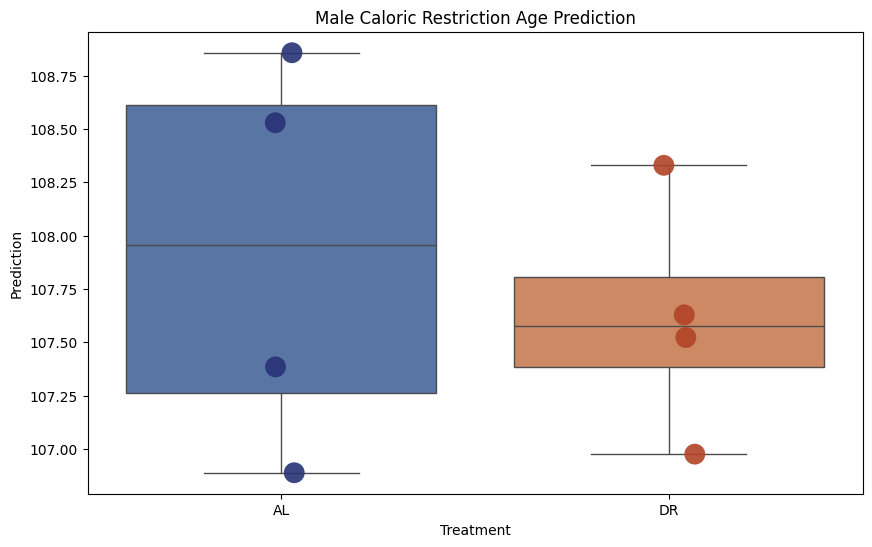

Components: 2
T-test p-value: 0.9448713757409393
Mann-Whitney U test p-value: 0.8857142857142857
              y_pred treatment
m_AL_L_1  111.771018        AL
m_DR_L_1  111.746700        DR
m_AL_L_2  108.549624        AL
m_DR_L_2  109.506009        DR
m_DR_L_3  108.248948        DR
m_AL_L_3  109.867301        AL
m_DR_L_4  110.151426        DR
m_AL_L_4  109.749651        AL


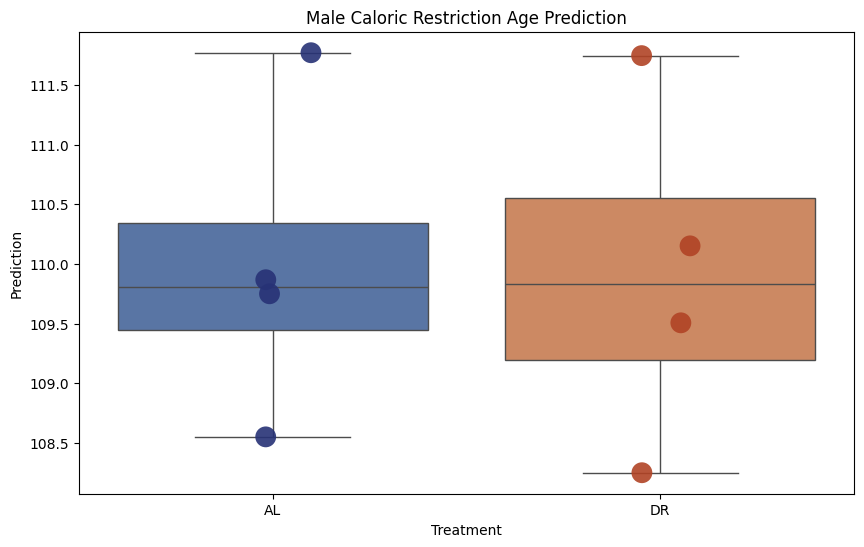

Components: 3
T-test p-value: 0.13110374181197032
Mann-Whitney U test p-value: 0.11428571428571428
              y_pred treatment
m_AL_L_1   97.865986        AL
m_DR_L_1   95.160314        DR
m_AL_L_2   97.845322        AL
m_DR_L_2   80.877673        DR
m_DR_L_3  102.992092        DR
m_AL_L_3  106.816839        AL
m_DR_L_4   93.148326        DR
m_AL_L_4  108.545616        AL


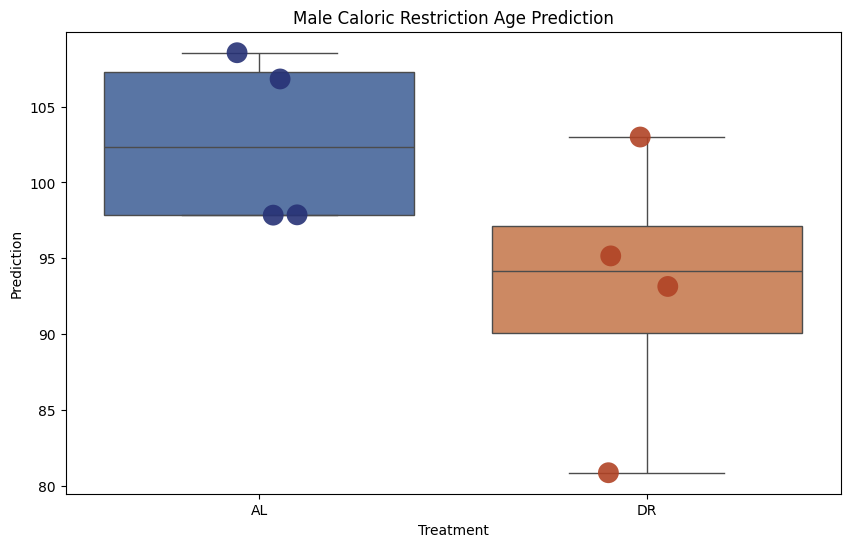

Components: 4
T-test p-value: 0.19311189925628158
Mann-Whitney U test p-value: 0.11428571428571428
             y_pred treatment
m_AL_L_1  84.942201        AL
m_DR_L_1  83.934628        DR
m_AL_L_2  84.073164        AL
m_DR_L_2  73.968101        DR
m_DR_L_3  93.464469        DR
m_AL_L_3  97.534345        AL
m_DR_L_4  81.149750        DR
m_AL_L_4  99.674810        AL


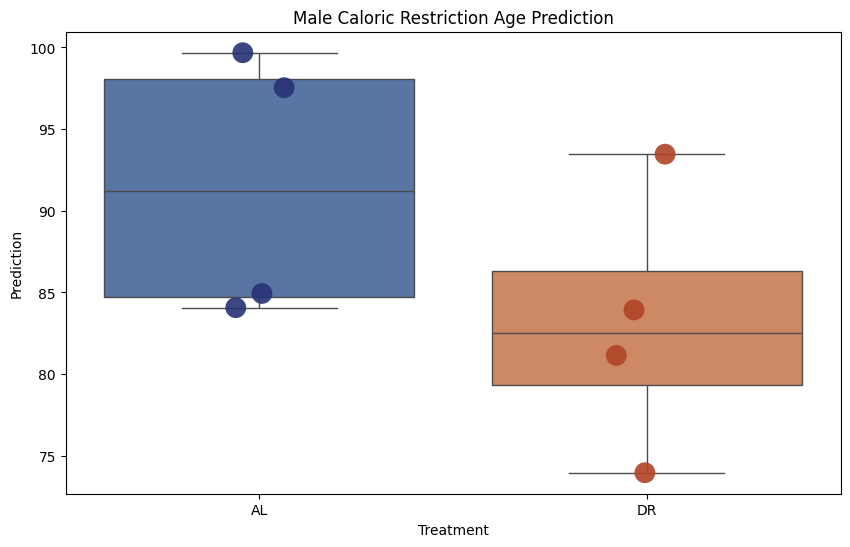

Components: 5
T-test p-value: 0.16604785564410035
Mann-Whitney U test p-value: 0.2
             y_pred treatment
m_AL_L_1  67.233740        AL
m_DR_L_1  62.488843        DR
m_AL_L_2  55.726434        AL
m_DR_L_2  58.126565        DR
m_DR_L_3  56.793305        DR
m_AL_L_3  63.215806        AL
m_DR_L_4  54.901121        DR
m_AL_L_4  65.610639        AL


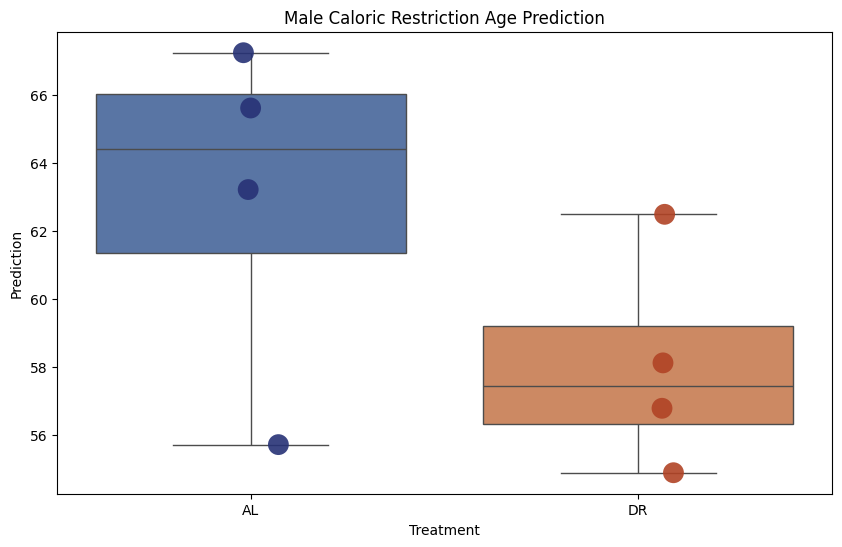

Components: 6
T-test p-value: 0.3623098601844613
Mann-Whitney U test p-value: 0.34285714285714286
             y_pred treatment
m_AL_L_1  61.175870        AL
m_DR_L_1  56.605370        DR
m_AL_L_2  51.683920        AL
m_DR_L_2  55.335536        DR
m_DR_L_3  59.199325        DR
m_AL_L_3  58.866724        AL
m_DR_L_4  47.077145        DR
m_AL_L_4  59.827842        AL


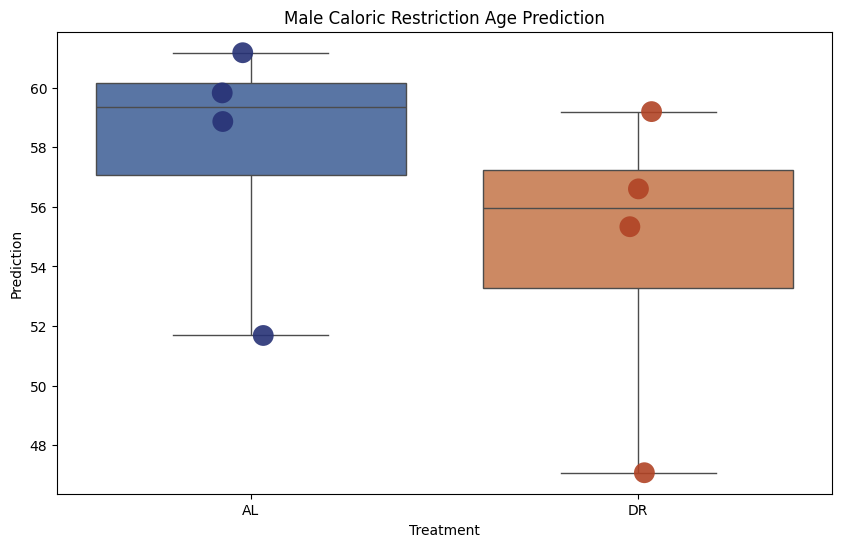

Components: 7
T-test p-value: 0.2014943747634606
Mann-Whitney U test p-value: 0.2
             y_pred treatment
m_AL_L_1  64.818488        AL
m_DR_L_1  59.515948        DR
m_AL_L_2  58.521976        AL
m_DR_L_2  60.153621        DR
m_DR_L_3  61.999072        DR
m_AL_L_3  62.283471        AL
m_DR_L_4  49.509901        DR
m_AL_L_4  64.471443        AL


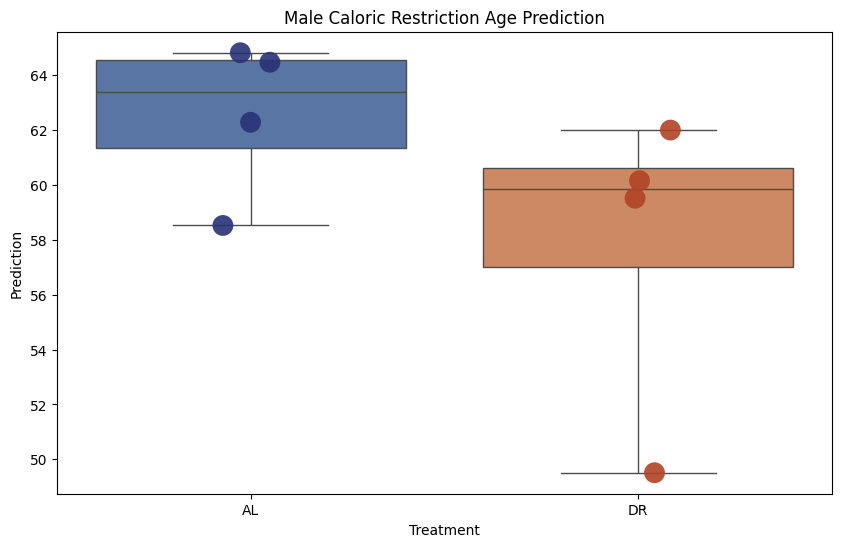

Components: 8
T-test p-value: 0.19459183974524732
Mann-Whitney U test p-value: 0.2
             y_pred treatment
m_AL_L_1  65.854717        AL
m_DR_L_1  60.529543        DR
m_AL_L_2  59.719909        AL
m_DR_L_2  61.312859        DR
m_DR_L_3  62.769814        DR
m_AL_L_3  63.194902        AL
m_DR_L_4  50.795919        DR
m_AL_L_4  65.302828        AL


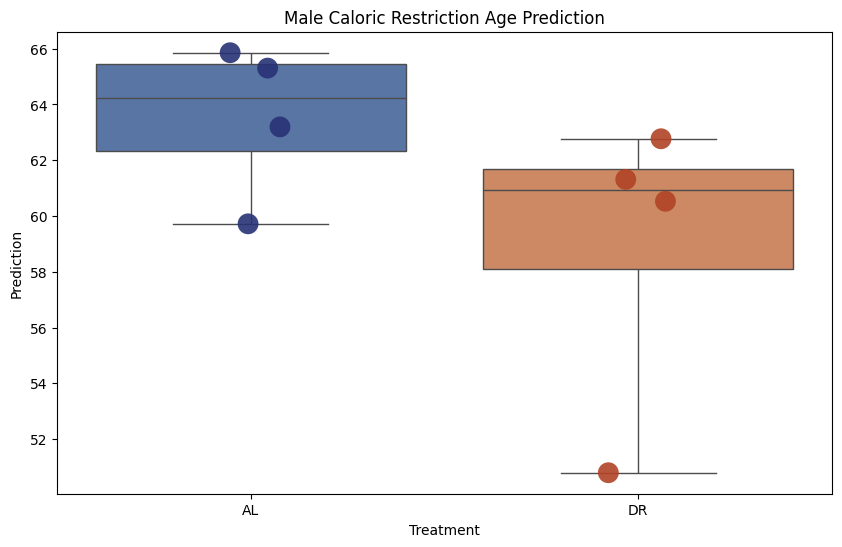

Components: 9
T-test p-value: 0.1497438495344302
Mann-Whitney U test p-value: 0.02857142857142857
             y_pred treatment
m_AL_L_1  58.609722        AL
m_DR_L_1  54.656961        DR
m_AL_L_2  55.870615        AL
m_DR_L_2  54.368424        DR
m_DR_L_3  55.337515        DR
m_AL_L_3  55.738228        AL
m_DR_L_4  46.008194        DR
m_AL_L_4  57.044729        AL


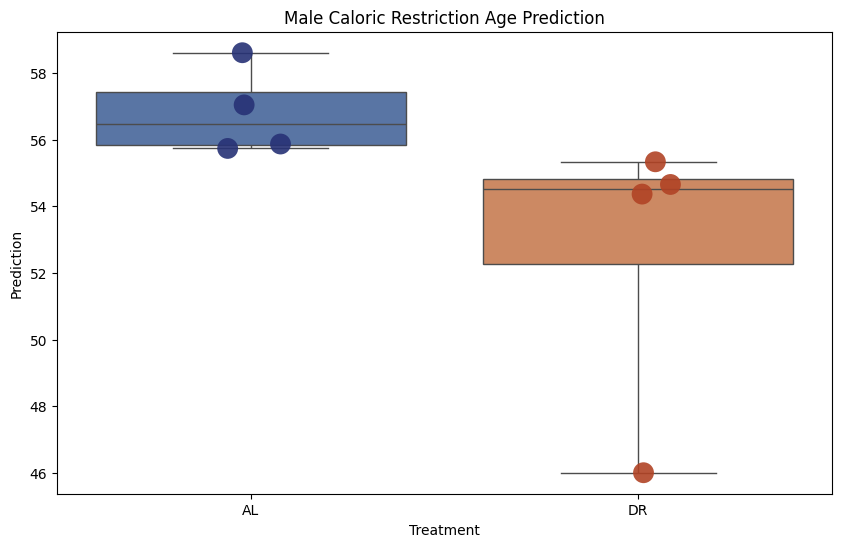

Components: 10
T-test p-value: 0.21919783191246753
Mann-Whitney U test p-value: 0.11428571428571428
             y_pred treatment
m_AL_L_1  61.712984        AL
m_DR_L_1  57.979659        DR
m_AL_L_2  59.070353        AL
m_DR_L_2  59.138034        DR
m_DR_L_3  58.314248        DR
m_AL_L_3  58.551894        AL
m_DR_L_4  48.742282        DR
m_AL_L_4  60.055371        AL


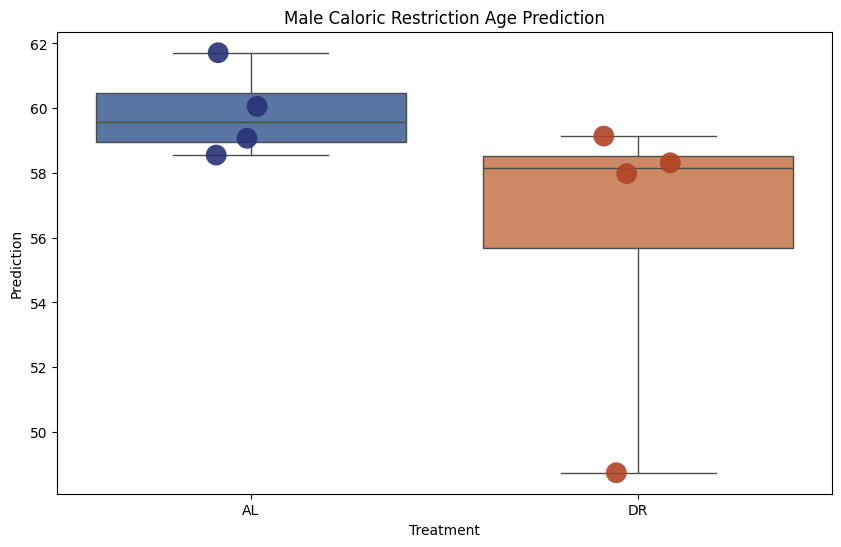

Components: 11
T-test p-value: 0.23284399185655785
Mann-Whitney U test p-value: 0.34285714285714286
             y_pred treatment
m_AL_L_1  65.707124        AL
m_DR_L_1  62.110679        DR
m_AL_L_2  63.253777        AL
m_DR_L_2  60.835878        DR
m_DR_L_3  62.629720        DR
m_AL_L_3  61.111127        AL
m_DR_L_4  54.071422        DR
m_AL_L_4  61.858435        AL


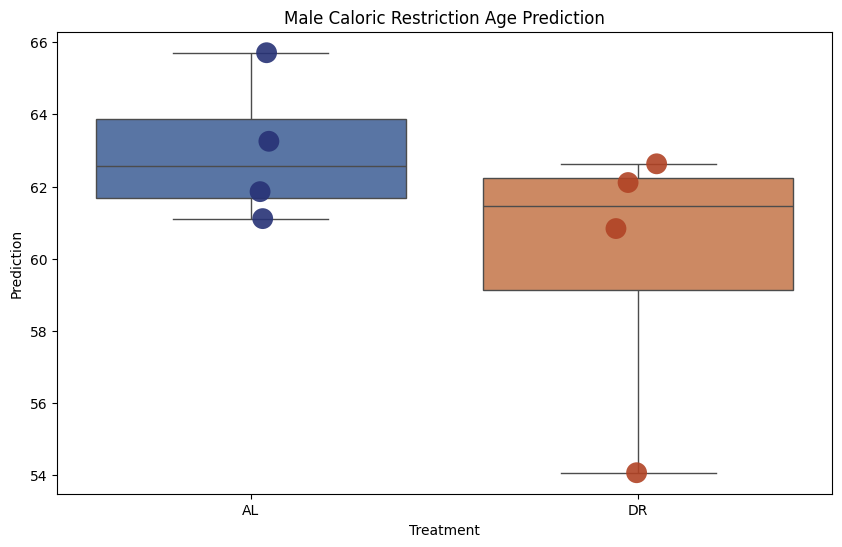

Components: 12
T-test p-value: 0.2322844265793642
Mann-Whitney U test p-value: 0.4857142857142857
             y_pred treatment
m_AL_L_1  66.545444        AL
m_DR_L_1  62.717681        DR
m_AL_L_2  64.334090        AL
m_DR_L_2  61.831021        DR
m_DR_L_3  62.974589        DR
m_AL_L_3  61.424968        AL
m_DR_L_4  54.673387        DR
m_AL_L_4  62.345760        AL


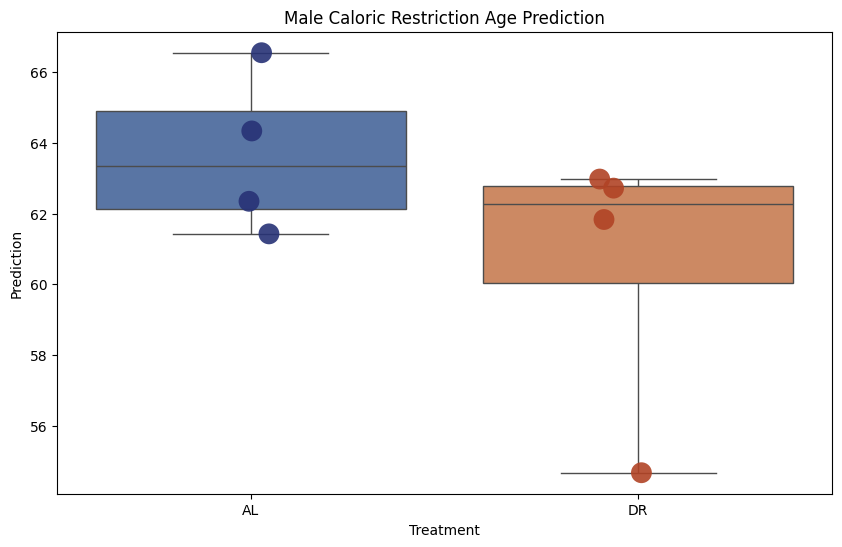

Components: 13
T-test p-value: 0.14641898587596403
Mann-Whitney U test p-value: 0.05714285714285714
             y_pred treatment
m_AL_L_1  73.102182        AL
m_DR_L_1  68.898653        DR
m_AL_L_2  71.307332        AL
m_DR_L_2  69.189993        DR
m_DR_L_3  69.488599        DR
m_AL_L_3  69.478603        AL
m_DR_L_4  61.351085        DR
m_AL_L_4  70.315881        AL


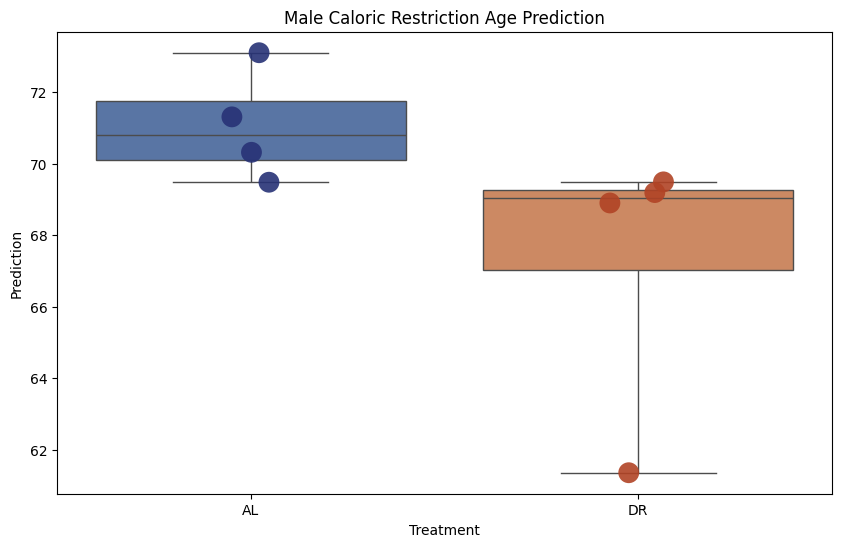

Components: 14
T-test p-value: 0.11748530079366189
Mann-Whitney U test p-value: 0.02857142857142857
             y_pred treatment
m_AL_L_1  79.884932        AL
m_DR_L_1  75.678411        DR
m_AL_L_2  78.403255        AL
m_DR_L_2  77.548687        DR
m_DR_L_3  75.507443        DR
m_AL_L_3  77.969804        AL
m_DR_L_4  68.163745        DR
m_AL_L_4  78.562818        AL


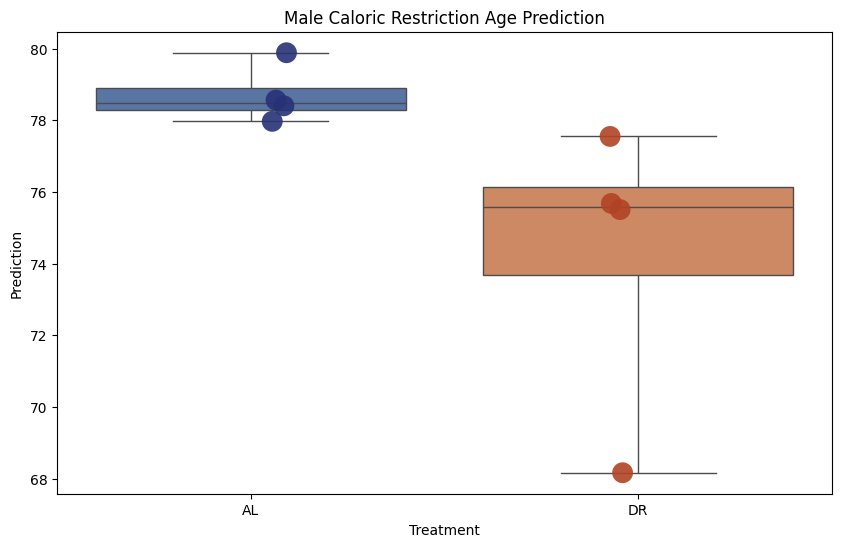

Components: 15
T-test p-value: 0.1137309399302133
Mann-Whitney U test p-value: 0.02857142857142857
             y_pred treatment
m_AL_L_1  74.859106        AL
m_DR_L_1  70.593833        DR
m_AL_L_2  73.163799        AL
m_DR_L_2  71.665680        DR
m_DR_L_3  70.833133        DR
m_AL_L_3  72.402140        AL
m_DR_L_4  63.227128        DR
m_AL_L_4  73.078057        AL


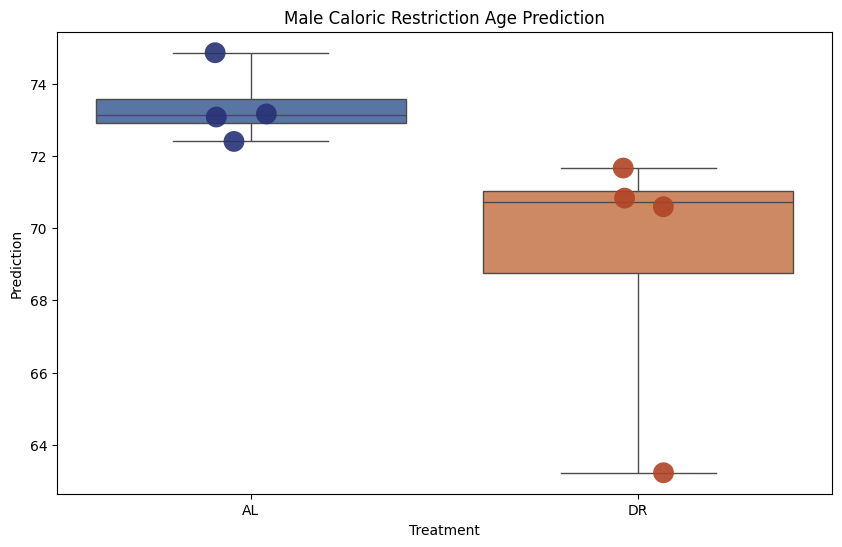

Components: 16
T-test p-value: 0.07834489961471106
Mann-Whitney U test p-value: 0.02857142857142857
             y_pred treatment
m_AL_L_1  84.172673        AL
m_DR_L_1  80.842053        DR
m_AL_L_2  85.949862        AL
m_DR_L_2  83.653810        DR
m_DR_L_3  78.986995        DR
m_AL_L_3  83.852596        AL
m_DR_L_4  73.798900        DR
m_AL_L_4  84.773667        AL


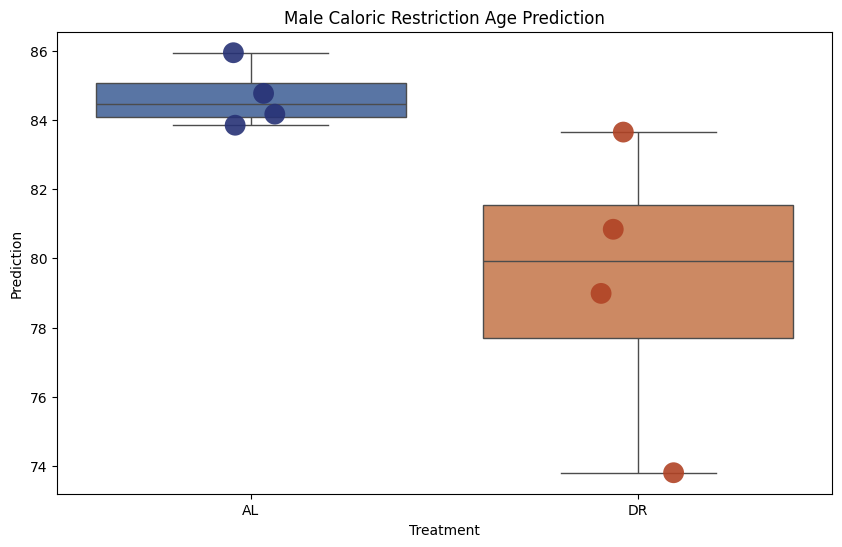

Components: 17
T-test p-value: 0.08037677574602277
Mann-Whitney U test p-value: 0.02857142857142857
             y_pred treatment
m_AL_L_1  83.973367        AL
m_DR_L_1  80.499318        DR
m_AL_L_2  86.026204        AL
m_DR_L_2  83.809316        DR
m_DR_L_3  79.104773        DR
m_AL_L_3  83.910275        AL
m_DR_L_4  73.534269        DR
m_AL_L_4  84.926463        AL


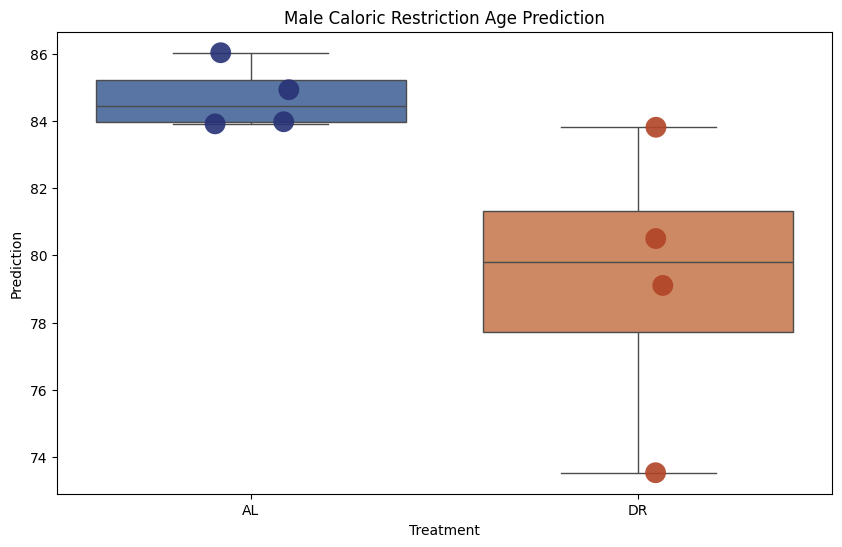

Components: 18
T-test p-value: 0.07515604738479847
Mann-Whitney U test p-value: 0.02857142857142857
             y_pred treatment
m_AL_L_1  83.748427        AL
m_DR_L_1  80.238234        DR
m_AL_L_2  85.401554        AL
m_DR_L_2  82.896977        DR
m_DR_L_3  78.321215        DR
m_AL_L_3  83.612429        AL
m_DR_L_4  72.608122        DR
m_AL_L_4  84.363835        AL


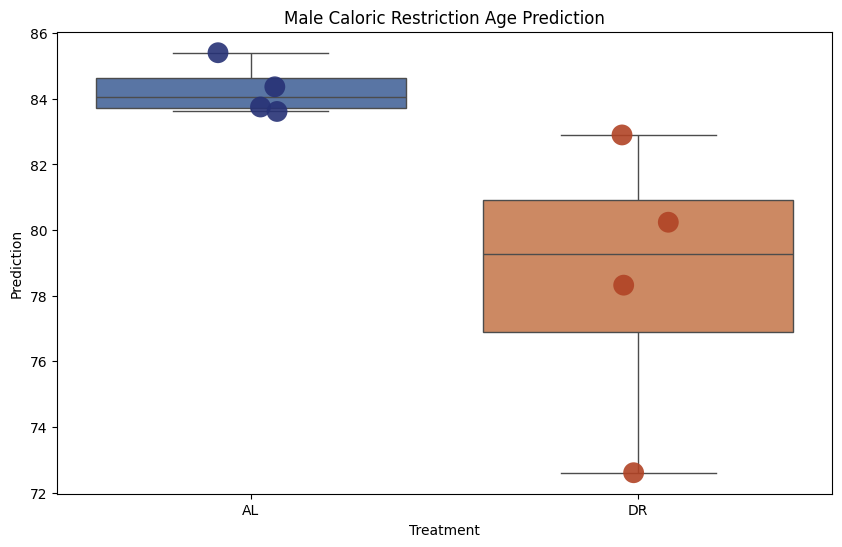

Components: 19
T-test p-value: 0.0695383318089732
Mann-Whitney U test p-value: 0.02857142857142857
             y_pred treatment
m_AL_L_1  83.609295        AL
m_DR_L_1  80.329183        DR
m_AL_L_2  85.724674        AL
m_DR_L_2  83.052433        DR
m_DR_L_3  78.454788        DR
m_AL_L_3  83.693138        AL
m_DR_L_4  73.091134        DR
m_AL_L_4  84.726622        AL


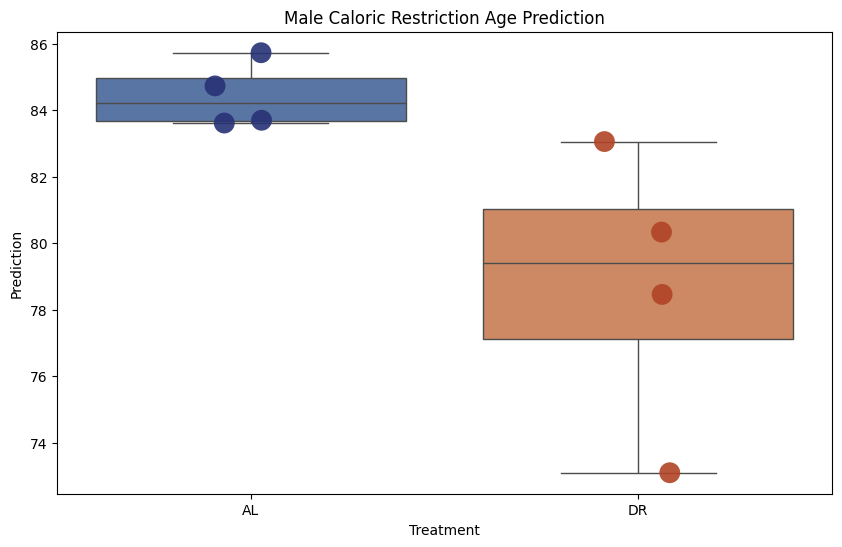

Components: 20
T-test p-value: 0.08904115494683376
Mann-Whitney U test p-value: 0.05714285714285714
             y_pred treatment
m_AL_L_1  86.945813        AL
m_DR_L_1  83.895721        DR
m_AL_L_2  88.410328        AL
m_DR_L_2  86.468709        DR
m_DR_L_3  81.803208        DR
m_AL_L_3  86.359422        AL
m_DR_L_4  76.860588        DR
m_AL_L_4  87.268330        AL


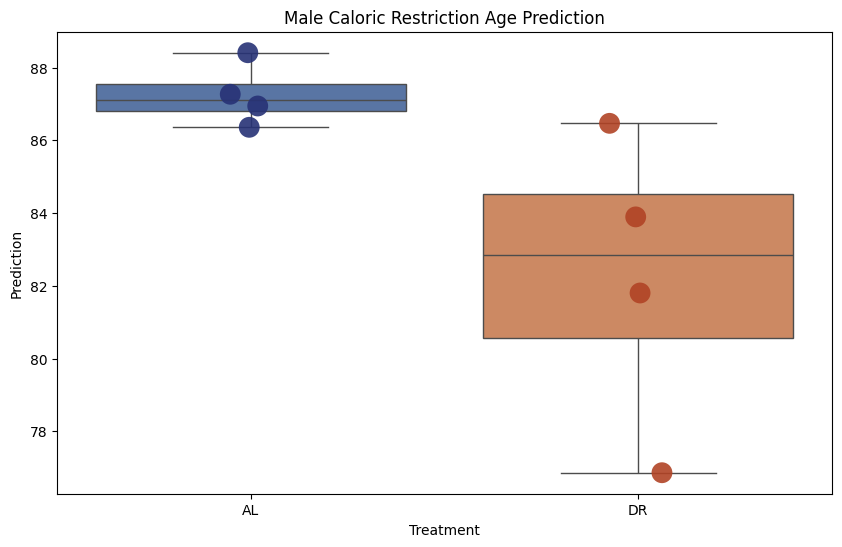

Components: 21
T-test p-value: 0.10378617620617396
Mann-Whitney U test p-value: 0.11428571428571428
             y_pred treatment
m_AL_L_1  85.119038        AL
m_DR_L_1  82.482239        DR
m_AL_L_2  86.828012        AL
m_DR_L_2  85.459382        DR
m_DR_L_3  79.407963        DR
m_AL_L_3  84.735366        AL
m_DR_L_4  75.451922        DR
m_AL_L_4  85.719239        AL


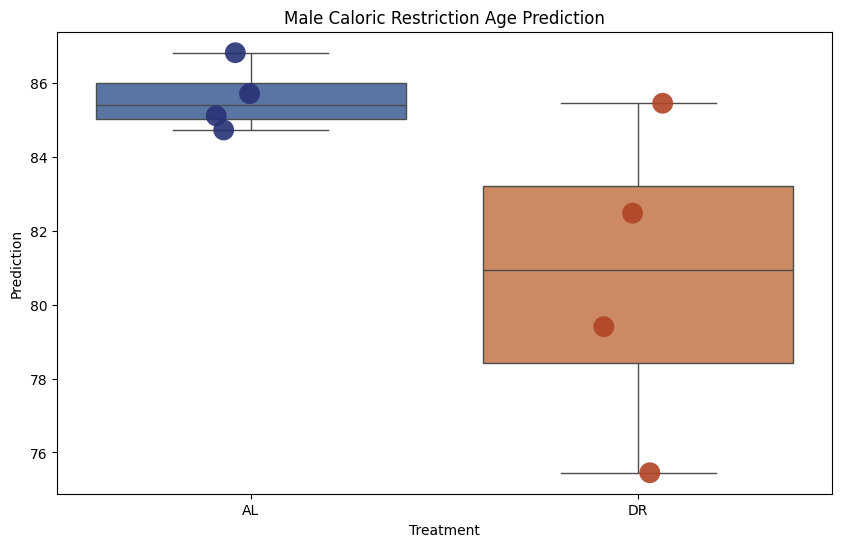

Components: 22
T-test p-value: 0.06633905672144294
Mann-Whitney U test p-value: 0.02857142857142857
             y_pred treatment
m_AL_L_1  83.765642        AL
m_DR_L_1  80.834764        DR
m_AL_L_2  86.015460        AL
m_DR_L_2  83.755933        DR
m_DR_L_3  78.675127        DR
m_AL_L_3  83.945985        AL
m_DR_L_4  74.450816        DR
m_AL_L_4  85.505748        AL


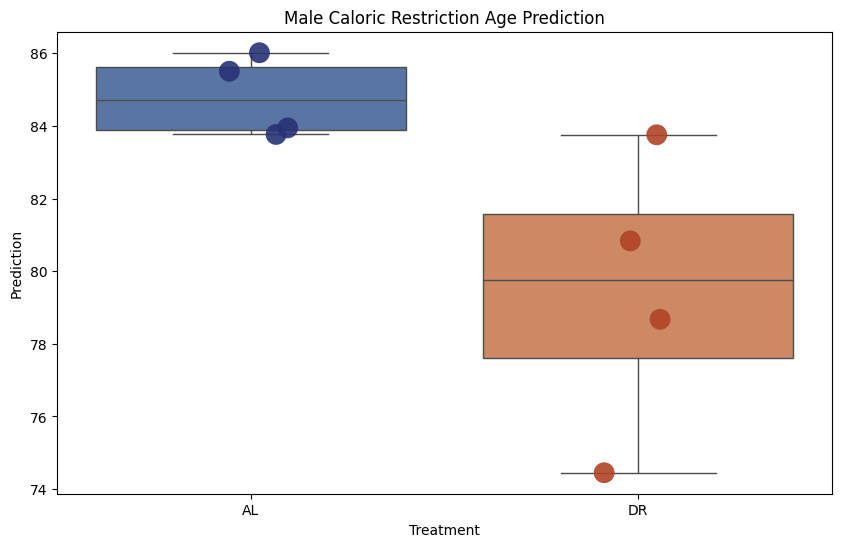

Components: 23
T-test p-value: 0.06237721188397265
Mann-Whitney U test p-value: 0.05714285714285714
             y_pred treatment
m_AL_L_1  84.207380        AL
m_DR_L_1  81.209519        DR
m_AL_L_2  86.616038        AL
m_DR_L_2  84.310112        DR
m_DR_L_3  79.166398        DR
m_AL_L_3  84.708882        AL
m_DR_L_4  74.892662        DR
m_AL_L_4  86.237093        AL


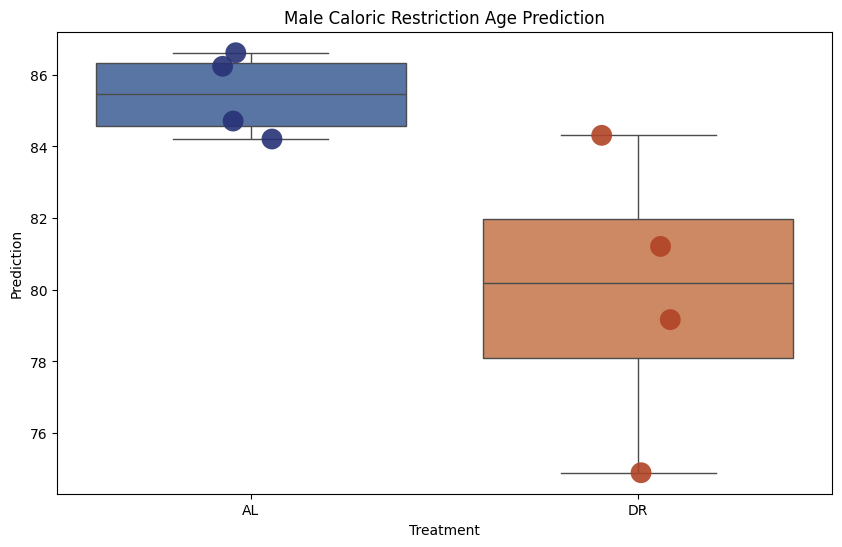

Components: 24
T-test p-value: 0.05334645457182969
Mann-Whitney U test p-value: 0.02857142857142857
             y_pred treatment
m_AL_L_1  83.787116        AL
m_DR_L_1  79.864093        DR
m_AL_L_2  84.958881        AL
m_DR_L_2  82.915538        DR
m_DR_L_3  78.314622        DR
m_AL_L_3  83.875159        AL
m_DR_L_4  73.487457        DR
m_AL_L_4  85.701706        AL


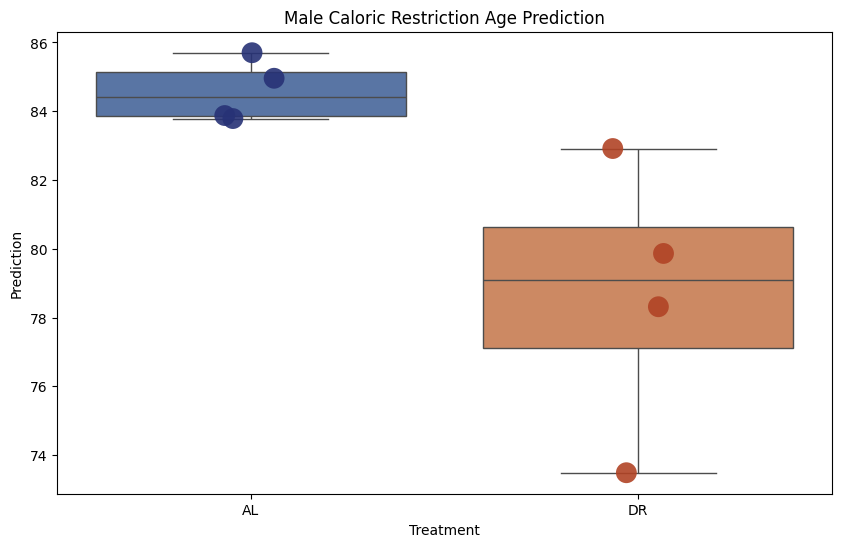

Components: 25
T-test p-value: 0.04870420073407203
Mann-Whitney U test p-value: 0.02857142857142857
             y_pred treatment
m_AL_L_1  84.238939        AL
m_DR_L_1  80.461134        DR
m_AL_L_2  85.221327        AL
m_DR_L_2  83.218731        DR
m_DR_L_3  78.726525        DR
m_AL_L_3  84.089775        AL
m_DR_L_4  74.482388        DR
m_AL_L_4  86.116222        AL


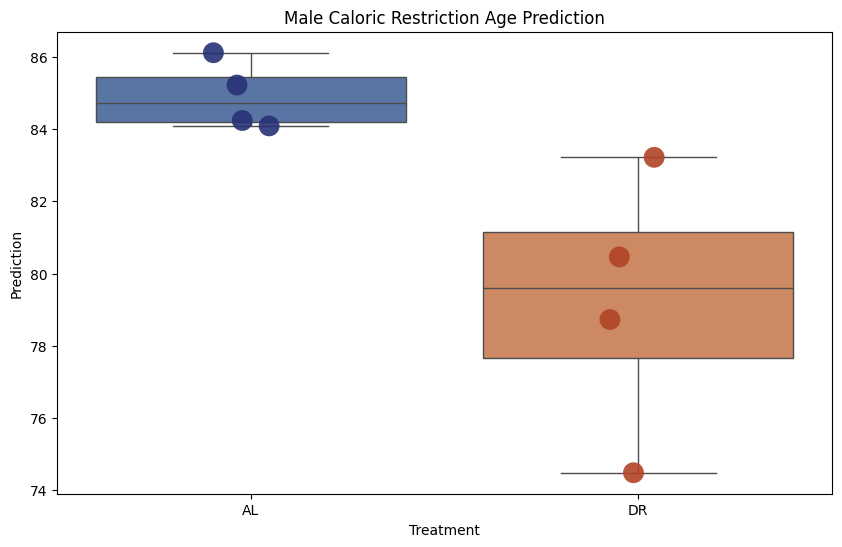

Components: 26
T-test p-value: 0.06626669211351328
Mann-Whitney U test p-value: 0.05714285714285714
             y_pred treatment
m_AL_L_1  85.986494        AL
m_DR_L_1  81.416440        DR
m_AL_L_2  86.134534        AL
m_DR_L_2  85.003830        DR
m_DR_L_3  80.019422        DR
m_AL_L_3  84.888294        AL
m_DR_L_4  75.734939        DR
m_AL_L_4  86.529019        AL


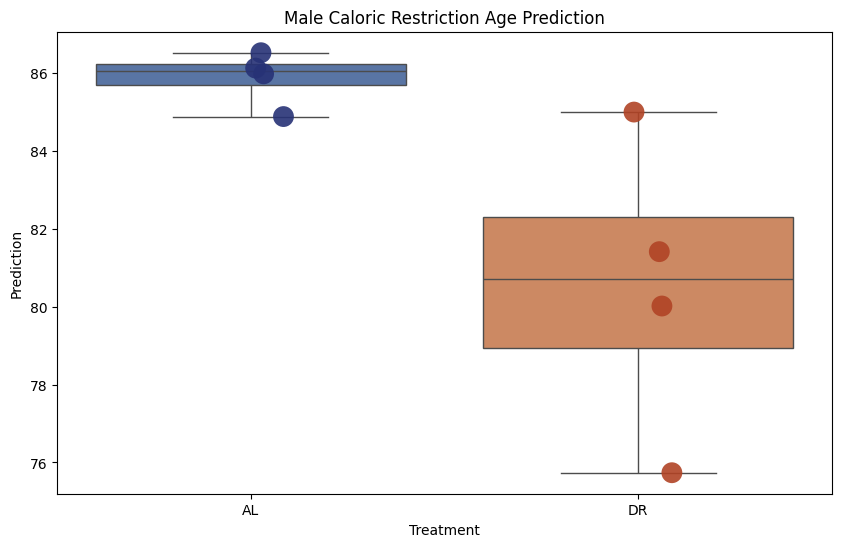

Components: 27
T-test p-value: 0.06555214373757018
Mann-Whitney U test p-value: 0.05714285714285714
             y_pred treatment
m_AL_L_1  84.744361        AL
m_DR_L_1  80.357254        DR
m_AL_L_2  84.976024        AL
m_DR_L_2  83.757990        DR
m_DR_L_3  78.737848        DR
m_AL_L_3  83.644134        AL
m_DR_L_4  74.762759        DR
m_AL_L_4  85.169749        AL


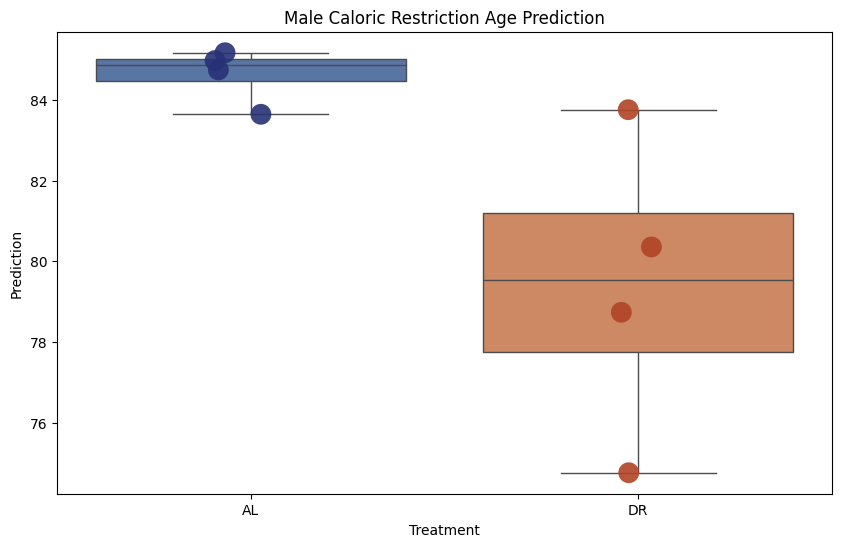

Components: 28
T-test p-value: 0.06356873744830183
Mann-Whitney U test p-value: 0.05714285714285714
             y_pred treatment
m_AL_L_1  85.399709        AL
m_DR_L_1  81.097866        DR
m_AL_L_2  85.682661        AL
m_DR_L_2  84.390921        DR
m_DR_L_3  79.313287        DR
m_AL_L_3  84.294877        AL
m_DR_L_4  75.562466        DR
m_AL_L_4  85.837287        AL


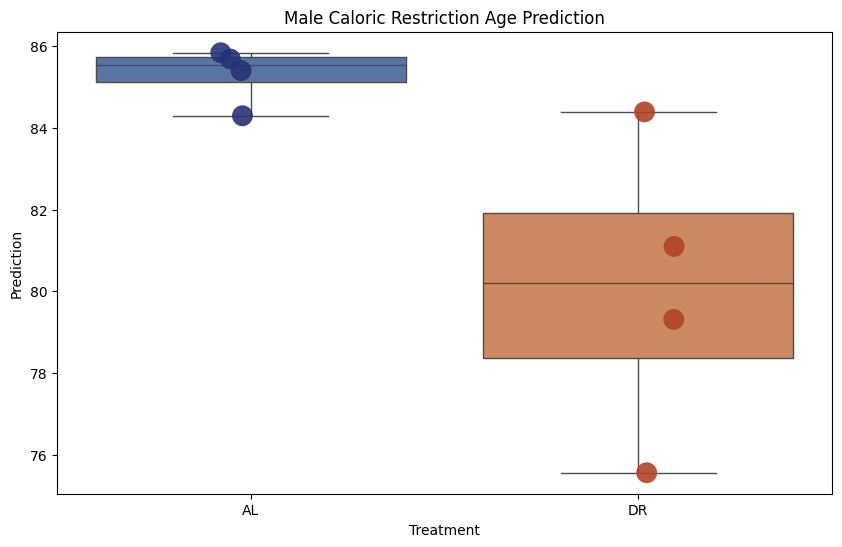

Components: 29
T-test p-value: 0.06200280420989446
Mann-Whitney U test p-value: 0.05714285714285714
             y_pred treatment
m_AL_L_1  85.224014        AL
m_DR_L_1  80.955391        DR
m_AL_L_2  85.611038        AL
m_DR_L_2  84.306074        DR
m_DR_L_3  79.108032        DR
m_AL_L_3  84.282884        AL
m_DR_L_4  75.447003        DR
m_AL_L_4  85.860559        AL


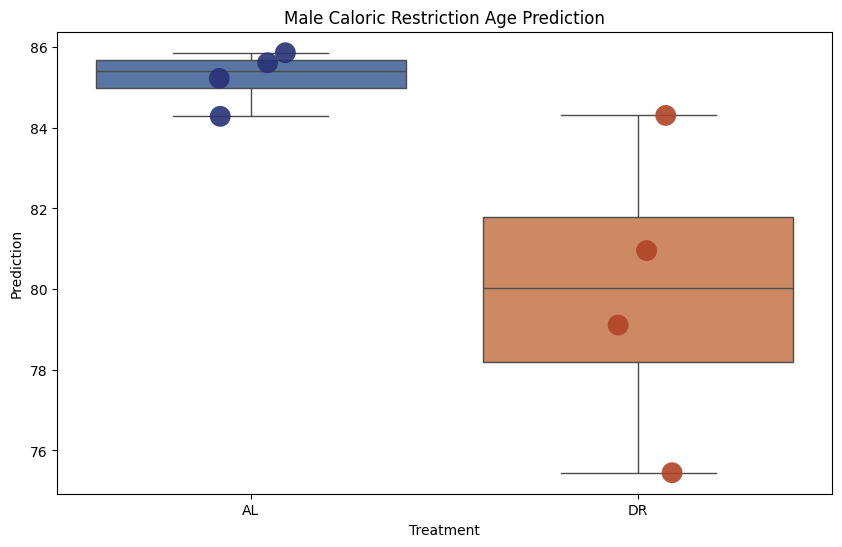

Components: 30
T-test p-value: 0.06716845680130344
Mann-Whitney U test p-value: 0.02857142857142857
             y_pred treatment
m_AL_L_1  85.450142        AL
m_DR_L_1  81.971417        DR
m_AL_L_2  86.060097        AL
m_DR_L_2  85.021719        DR
m_DR_L_3  80.070863        DR
m_AL_L_3  85.130283        AL
m_DR_L_4  76.464581        DR
m_AL_L_4  86.714386        AL


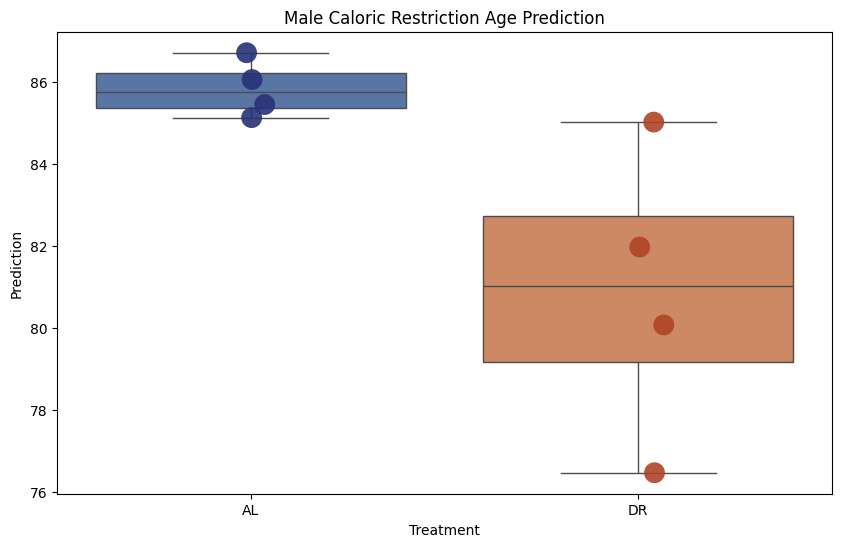

Components: 31
T-test p-value: 0.06716845680130412
Mann-Whitney U test p-value: 0.02857142857142857
             y_pred treatment
m_AL_L_1  85.450142        AL
m_DR_L_1  81.971417        DR
m_AL_L_2  86.060097        AL
m_DR_L_2  85.021719        DR
m_DR_L_3  80.070863        DR
m_AL_L_3  85.130283        AL
m_DR_L_4  76.464581        DR
m_AL_L_4  86.714386        AL


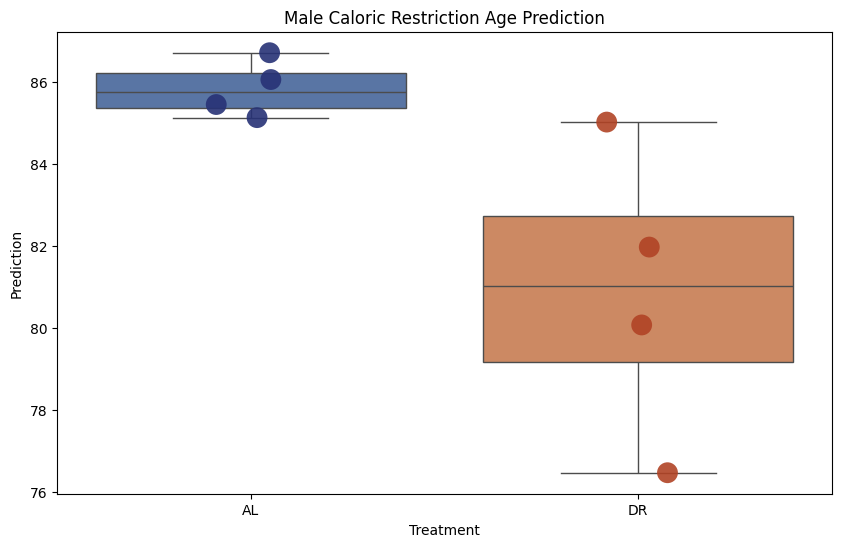

In [ ]:
# Loop through all possible components to predict the test set
max_components = min(X_train_scaled.shape[0], X_train_scaled.shape[1])
all_y_test_preds = []

for n_components in range(1, max_components + 1):
    print(f"Components: {n_components}")

    # Apply PCA
    pca = PCA(n_components=n_components, random_state=1)
    X_train_pca = pca.fit_transform(X_train_scaled)
    X_test_pca = pca.transform(X_test_scaled)

    # Train the model
    regressor = LinearRegression()
    regressor.fit(X_train_pca, age_train)

    # Predict on the test set
    y_test_pred = regressor.predict(X_test_pca)

    # Save the actual and predicted values to a DataFrame
    results_df = pd.DataFrame({
    'y_pred': y_test_pred
    }, index=df_cr_age_liver_male_norm_common_without_age.index.tolist())

    #print(results_df)
    df_cr = results_df.loc[df_cr_age_liver_male.index.tolist(), ]

    df_cr.head(5)

    df_cr["treatment"] = df_cr_age_liver["treatment"]

    df_cr.head(5)

    # Ensure predictions are numeric
    pred_al = pd.to_numeric(df_cr[df_cr['treatment'] == "AL"]['y_pred'], errors='coerce')
    pred_dr = pd.to_numeric(df_cr[df_cr['treatment'] == "DR"]['y_pred'], errors='coerce')

    # Drop any NaN values if necessary
    pred_al = pred_al.dropna()
    pred_dr = pred_dr.dropna()

    # Perform t-test
    t_stat, p_ttest = ttest_ind(pred_al, pred_dr, equal_var=False)  # Welch's t-test for unequal variances

    # Perform Mann-Whitney U test
    u_stat, p_mwu = mannwhitneyu(pred_al, pred_dr, alternative='two-sided')

    # Print results
    print(f"T-test p-value: {p_ttest}")
    print(f"Mann-Whitney U test p-value: {p_mwu}")

    filtered_df_al = df_cr[df_cr['treatment'] == "AL"]
    filtered_df_dr = df_cr[df_cr['treatment'] == "DR"]

    # Display the filtered DataFrame
    #print(filtered_df_al)
    #print(filtered_df_dr)
    print(df_cr)

    # Create the box plot
    plt.figure(figsize=(10, 6))
    box = sns.boxplot(x='treatment', y='y_pred', hue='treatment', data=df_cr, palette='deep', showfliers = False, whis = [0,100])

    #custom_palette = ['#FF6347', '#4682B4', '#32CD32', '#FFD700']  # Use desired hex color codes
    custom_palette = ['#273276', '#B14325']  # Use desired hex color codes

    # Add data points with custom colors
    strip = sns.stripplot(
        x='treatment',
        y='y_pred',
        hue='treatment',
        data=df_cr,
        palette=custom_palette,  # Custom color palette
        dodge=False,
        alpha=0.9,
        jitter=True,
        size=15
    )

    # Remove the legend if not needed
    #strip.legend_.remove()

    # Customize the plot
    plt.title('Male Caloric Restriction Age Prediction')
    plt.xlabel('Treatment')
    plt.ylabel('Prediction')

    # Remove the grid
    plt.grid(False)
    out_file_name = f"liver_male_PCR_cr_n_components_{n_components}.svg"
    out_path = os.path.join("./outputs/pc_regression/", out_file_name)
    plt.savefig(out_path, dpi=300, bbox_inches="tight")

    # Show the plot
    plt.show()

    all_y_test_preds.append({
        'n_components': n_components,
        'y_test_pred': y_test_pred
    })

    # Optionally, print the predictions for each number of components
    #print(f"Components: {n_components}, Predictions: {y_test_pred}")

    # Save the DataFrame to a CSV file
    output_path = './outputs/pc_regression/'
    pc_num = "".join([str(n_components), "pcs"])
    out_file_prefix = 'ALDR_male_PCregression_pred'
    out_file_name = "_".join([out_file_prefix, pc_num])
    df_cr.to_csv(os.path.join(output_path, out_file_name), sep="\t")


In [ ]:
print(max_components)

31


##### Fig 5F (M) PC-R: Median adjusted

Components: 1
T-test p-value: 0.6033266402327491
Mann-Whitney U test p-value: 0.8857142857142857
              y_pred treatment
m_AL_L_1  107.385257        AL
m_DR_L_1  108.329794        DR
m_AL_L_2  106.889187        AL
m_DR_L_2  107.522985        DR
m_DR_L_3  106.976216        DR
m_AL_L_3  108.529398        AL
m_DR_L_4  107.629082        DR
m_AL_L_4  108.857503        AL
107.95732761547376
              y_pred treatment  prediction_adjust
m_AL_L_1  107.385257        AL          -0.572071
m_DR_L_1  108.329794        DR           0.372467
m_AL_L_2  106.889187        AL          -1.068140
m_DR_L_2  107.522985        DR          -0.434343
m_DR_L_3  106.976216        DR          -0.981111
m_AL_L_3  108.529398        AL           0.572071
m_DR_L_4  107.629082        DR          -0.328245
m_AL_L_4  108.857503        AL           0.900175


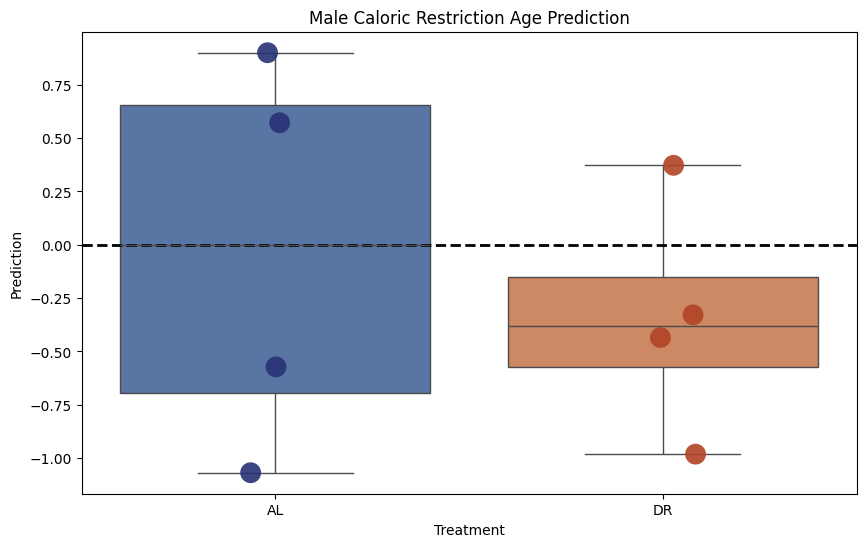

Components: 2
T-test p-value: 0.9448713757409393
Mann-Whitney U test p-value: 0.8857142857142857
              y_pred treatment
m_AL_L_1  111.771018        AL
m_DR_L_1  111.746700        DR
m_AL_L_2  108.549624        AL
m_DR_L_2  109.506009        DR
m_DR_L_3  108.248948        DR
m_AL_L_3  109.867301        AL
m_DR_L_4  110.151426        DR
m_AL_L_4  109.749651        AL
109.80847625037931
              y_pred treatment  prediction_adjust
m_AL_L_1  111.771018        AL           1.962542
m_DR_L_1  111.746700        DR           1.938223
m_AL_L_2  108.549624        AL          -1.258853
m_DR_L_2  109.506009        DR          -0.302467
m_DR_L_3  108.248948        DR          -1.559528
m_AL_L_3  109.867301        AL           0.058825
m_DR_L_4  110.151426        DR           0.342950
m_AL_L_4  109.749651        AL          -0.058825


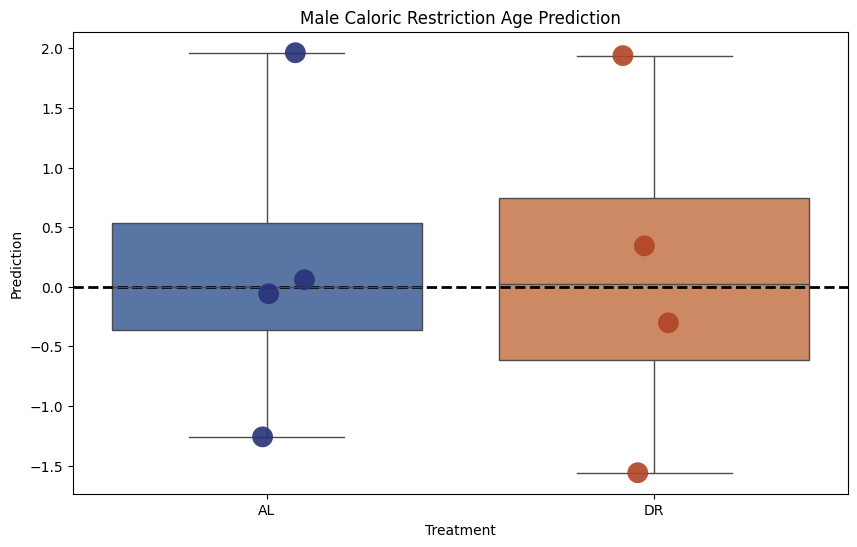

Components: 3
T-test p-value: 0.13110374181197032
Mann-Whitney U test p-value: 0.11428571428571428
              y_pred treatment
m_AL_L_1   97.865986        AL
m_DR_L_1   95.160314        DR
m_AL_L_2   97.845322        AL
m_DR_L_2   80.877673        DR
m_DR_L_3  102.992092        DR
m_AL_L_3  106.816839        AL
m_DR_L_4   93.148326        DR
m_AL_L_4  108.545616        AL
102.34141237055178
              y_pred treatment  prediction_adjust
m_AL_L_1   97.865986        AL          -4.475427
m_DR_L_1   95.160314        DR          -7.181099
m_AL_L_2   97.845322        AL          -4.496090
m_DR_L_2   80.877673        DR         -21.463740
m_DR_L_3  102.992092        DR           0.650679
m_AL_L_3  106.816839        AL           4.475427
m_DR_L_4   93.148326        DR          -9.193087
m_AL_L_4  108.545616        AL           6.204204


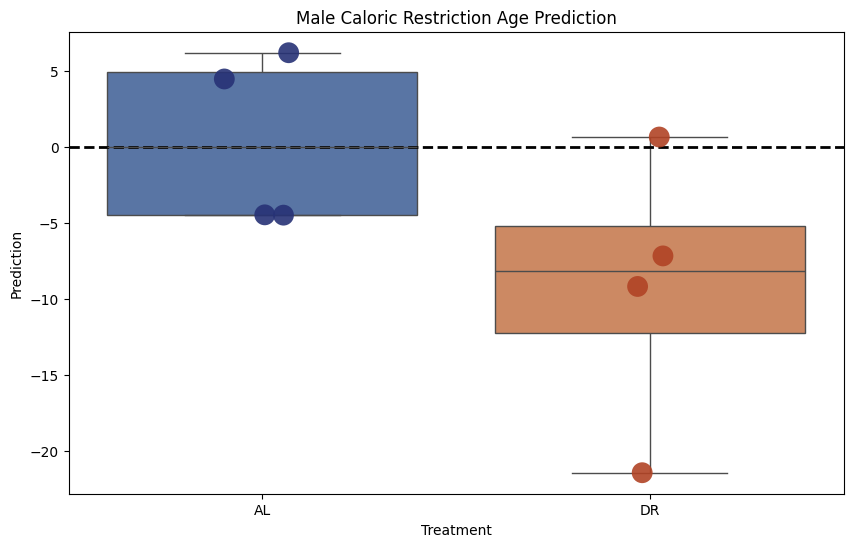

Components: 4
T-test p-value: 0.19311189925628158
Mann-Whitney U test p-value: 0.11428571428571428
             y_pred treatment
m_AL_L_1  84.942201        AL
m_DR_L_1  83.934628        DR
m_AL_L_2  84.073164        AL
m_DR_L_2  73.968101        DR
m_DR_L_3  93.464469        DR
m_AL_L_3  97.534345        AL
m_DR_L_4  81.149750        DR
m_AL_L_4  99.674810        AL
91.2382728579436
             y_pred treatment  prediction_adjust
m_AL_L_1  84.942201        AL          -6.296072
m_DR_L_1  83.934628        DR          -7.303645
m_AL_L_2  84.073164        AL          -7.165109
m_DR_L_2  73.968101        DR         -17.270172
m_DR_L_3  93.464469        DR           2.226196
m_AL_L_3  97.534345        AL           6.296072
m_DR_L_4  81.149750        DR         -10.088523
m_AL_L_4  99.674810        AL           8.436537


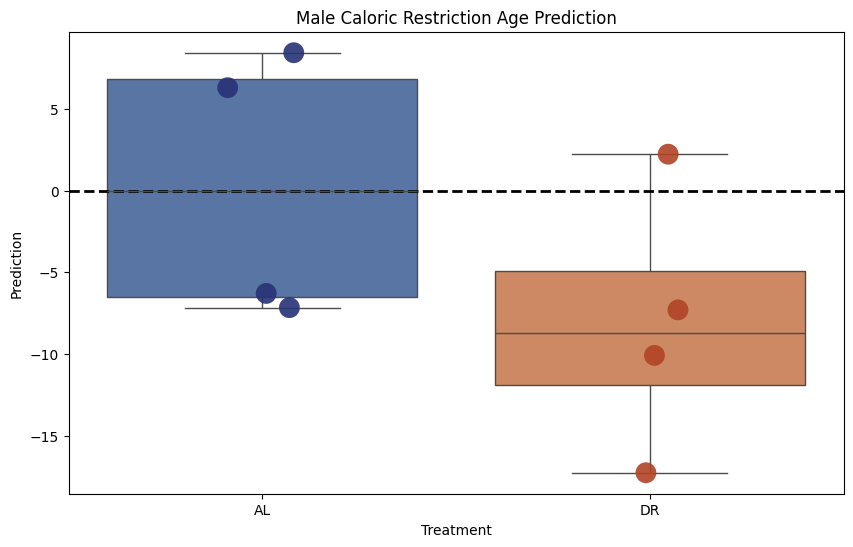

Components: 5
T-test p-value: 0.16604785564410035
Mann-Whitney U test p-value: 0.2
             y_pred treatment
m_AL_L_1  67.233740        AL
m_DR_L_1  62.488843        DR
m_AL_L_2  55.726434        AL
m_DR_L_2  58.126565        DR
m_DR_L_3  56.793305        DR
m_AL_L_3  63.215806        AL
m_DR_L_4  54.901121        DR
m_AL_L_4  65.610639        AL
64.41322242840481
             y_pred treatment  prediction_adjust
m_AL_L_1  67.233740        AL           2.820518
m_DR_L_1  62.488843        DR          -1.924379
m_AL_L_2  55.726434        AL          -8.686788
m_DR_L_2  58.126565        DR          -6.286658
m_DR_L_3  56.793305        DR          -7.619918
m_AL_L_3  63.215806        AL          -1.197417
m_DR_L_4  54.901121        DR          -9.512101
m_AL_L_4  65.610639        AL           1.197417


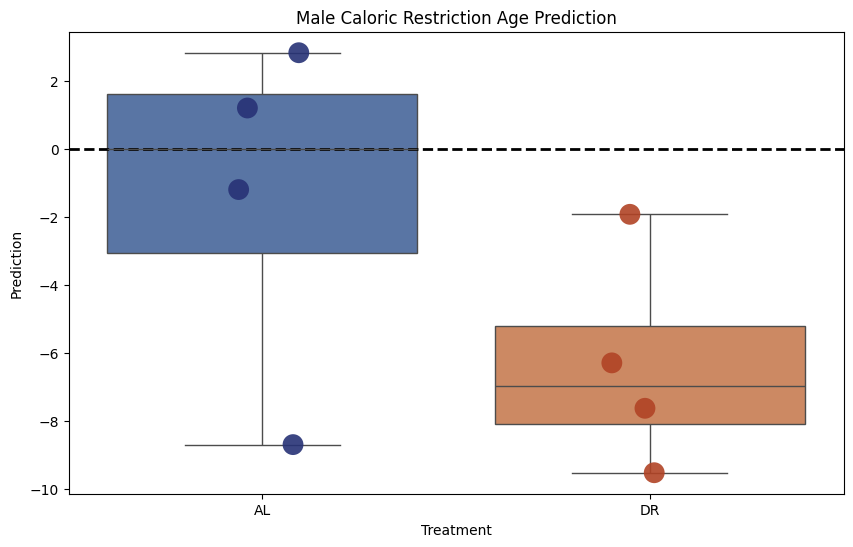

Components: 6
T-test p-value: 0.3623098601844613
Mann-Whitney U test p-value: 0.34285714285714286
             y_pred treatment
m_AL_L_1  61.175870        AL
m_DR_L_1  56.605370        DR
m_AL_L_2  51.683920        AL
m_DR_L_2  55.335536        DR
m_DR_L_3  59.199325        DR
m_AL_L_3  58.866724        AL
m_DR_L_4  47.077145        DR
m_AL_L_4  59.827842        AL
59.34728292054058
             y_pred treatment  prediction_adjust
m_AL_L_1  61.175870        AL           1.828587
m_DR_L_1  56.605370        DR          -2.741913
m_AL_L_2  51.683920        AL          -7.663363
m_DR_L_2  55.335536        DR          -4.011747
m_DR_L_3  59.199325        DR          -0.147958
m_AL_L_3  58.866724        AL          -0.480559
m_DR_L_4  47.077145        DR         -12.270138
m_AL_L_4  59.827842        AL           0.480559


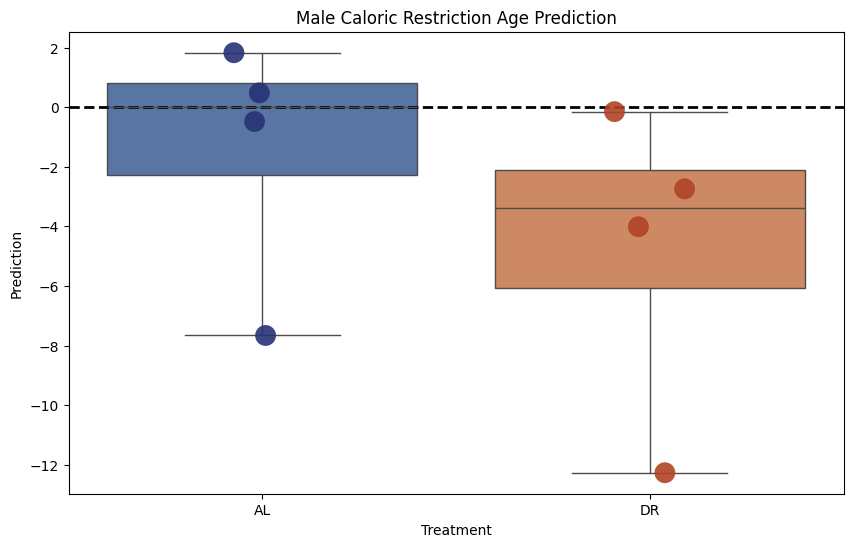

Components: 7
T-test p-value: 0.2014943747634606
Mann-Whitney U test p-value: 0.2
             y_pred treatment
m_AL_L_1  64.818488        AL
m_DR_L_1  59.515948        DR
m_AL_L_2  58.521976        AL
m_DR_L_2  60.153621        DR
m_DR_L_3  61.999072        DR
m_AL_L_3  62.283471        AL
m_DR_L_4  49.509901        DR
m_AL_L_4  64.471443        AL
63.37745740042511
             y_pred treatment  prediction_adjust
m_AL_L_1  64.818488        AL           1.441030
m_DR_L_1  59.515948        DR          -3.861509
m_AL_L_2  58.521976        AL          -4.855481
m_DR_L_2  60.153621        DR          -3.223836
m_DR_L_3  61.999072        DR          -1.378386
m_AL_L_3  62.283471        AL          -1.093986
m_DR_L_4  49.509901        DR         -13.867556
m_AL_L_4  64.471443        AL           1.093986


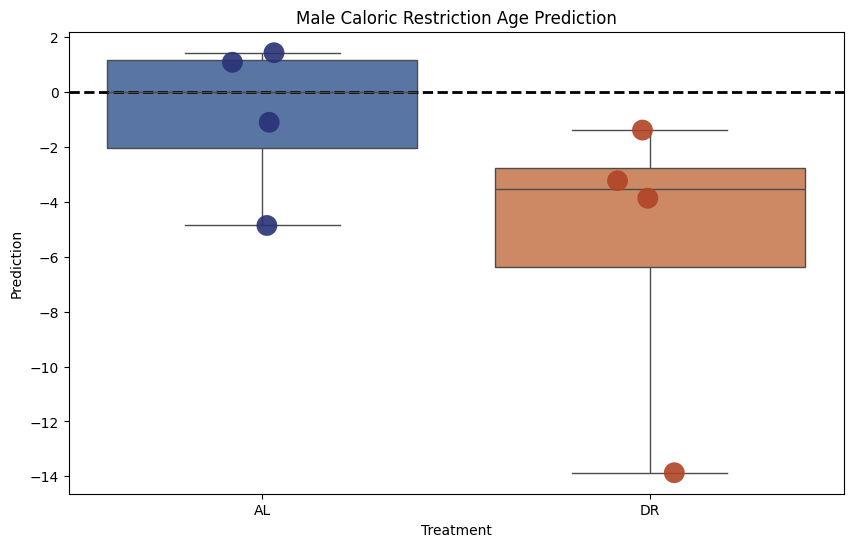

Components: 8
T-test p-value: 0.19459183974524732
Mann-Whitney U test p-value: 0.2
             y_pred treatment
m_AL_L_1  65.854717        AL
m_DR_L_1  60.529543        DR
m_AL_L_2  59.719909        AL
m_DR_L_2  61.312859        DR
m_DR_L_3  62.769814        DR
m_AL_L_3  63.194902        AL
m_DR_L_4  50.795919        DR
m_AL_L_4  65.302828        AL
64.24886539139584
             y_pred treatment  prediction_adjust
m_AL_L_1  65.854717        AL           1.605852
m_DR_L_1  60.529543        DR          -3.719322
m_AL_L_2  59.719909        AL          -4.528956
m_DR_L_2  61.312859        DR          -2.936007
m_DR_L_3  62.769814        DR          -1.479052
m_AL_L_3  63.194902        AL          -1.053963
m_DR_L_4  50.795919        DR         -13.452947
m_AL_L_4  65.302828        AL           1.053963


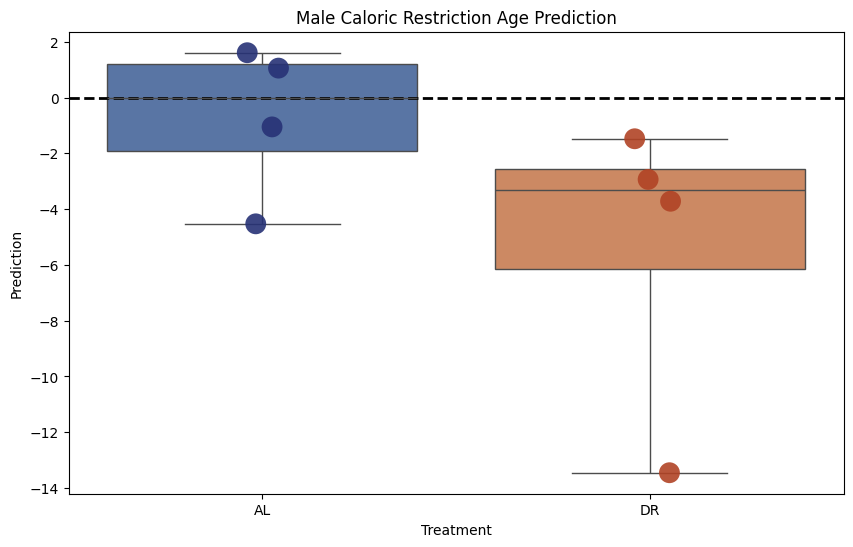

Components: 9
T-test p-value: 0.1497438495344302
Mann-Whitney U test p-value: 0.02857142857142857
             y_pred treatment
m_AL_L_1  58.609722        AL
m_DR_L_1  54.656961        DR
m_AL_L_2  55.870615        AL
m_DR_L_2  54.368424        DR
m_DR_L_3  55.337515        DR
m_AL_L_3  55.738228        AL
m_DR_L_4  46.008194        DR
m_AL_L_4  57.044729        AL
56.45767172971712
             y_pred treatment  prediction_adjust
m_AL_L_1  58.609722        AL           2.152050
m_DR_L_1  54.656961        DR          -1.800711
m_AL_L_2  55.870615        AL          -0.587057
m_DR_L_2  54.368424        DR          -2.089247
m_DR_L_3  55.337515        DR          -1.120157
m_AL_L_3  55.738228        AL          -0.719444
m_DR_L_4  46.008194        DR         -10.449477
m_AL_L_4  57.044729        AL           0.587057


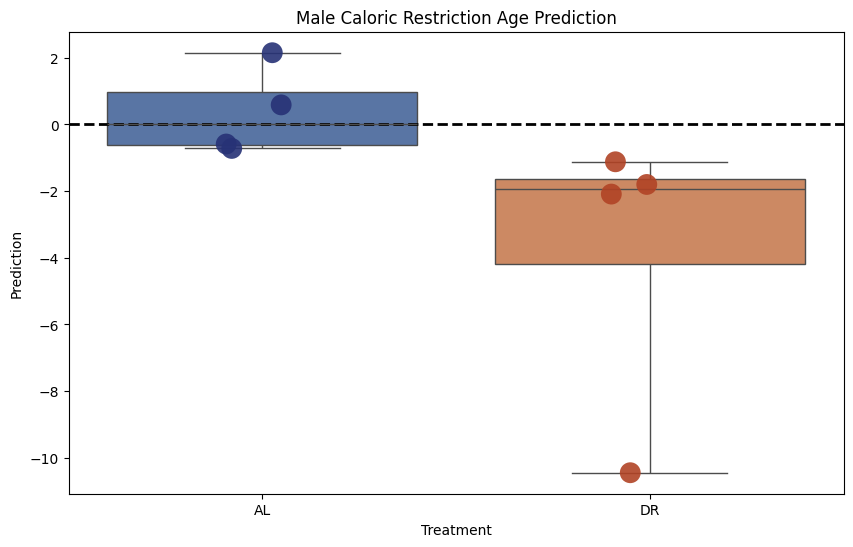

Components: 10
T-test p-value: 0.21919783191246753
Mann-Whitney U test p-value: 0.11428571428571428
             y_pred treatment
m_AL_L_1  61.712984        AL
m_DR_L_1  57.979659        DR
m_AL_L_2  59.070353        AL
m_DR_L_2  59.138034        DR
m_DR_L_3  58.314248        DR
m_AL_L_3  58.551894        AL
m_DR_L_4  48.742282        DR
m_AL_L_4  60.055371        AL
59.562862046822815
             y_pred treatment  prediction_adjust
m_AL_L_1  61.712984        AL           2.150122
m_DR_L_1  57.979659        DR          -1.583203
m_AL_L_2  59.070353        AL          -0.492509
m_DR_L_2  59.138034        DR          -0.424828
m_DR_L_3  58.314248        DR          -1.248615
m_AL_L_3  58.551894        AL          -1.010968
m_DR_L_4  48.742282        DR         -10.820580
m_AL_L_4  60.055371        AL           0.492509


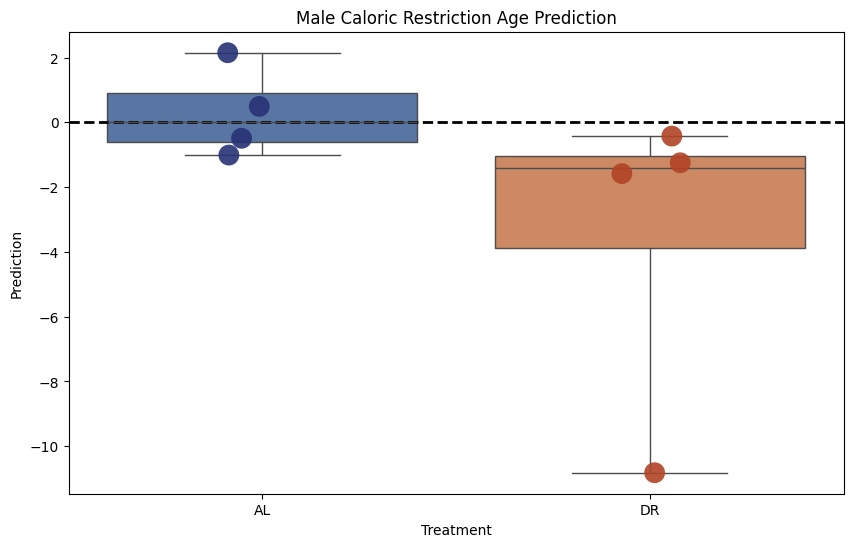

Components: 11
T-test p-value: 0.23284399185655785
Mann-Whitney U test p-value: 0.34285714285714286
             y_pred treatment
m_AL_L_1  65.707124        AL
m_DR_L_1  62.110679        DR
m_AL_L_2  63.253777        AL
m_DR_L_2  60.835878        DR
m_DR_L_3  62.629720        DR
m_AL_L_3  61.111127        AL
m_DR_L_4  54.071422        DR
m_AL_L_4  61.858435        AL
62.55610597856832
             y_pred treatment  prediction_adjust
m_AL_L_1  65.707124        AL           3.151018
m_DR_L_1  62.110679        DR          -0.445427
m_AL_L_2  63.253777        AL           0.697671
m_DR_L_2  60.835878        DR          -1.720228
m_DR_L_3  62.629720        DR           0.073614
m_AL_L_3  61.111127        AL          -1.444979
m_DR_L_4  54.071422        DR          -8.484684
m_AL_L_4  61.858435        AL          -0.697671


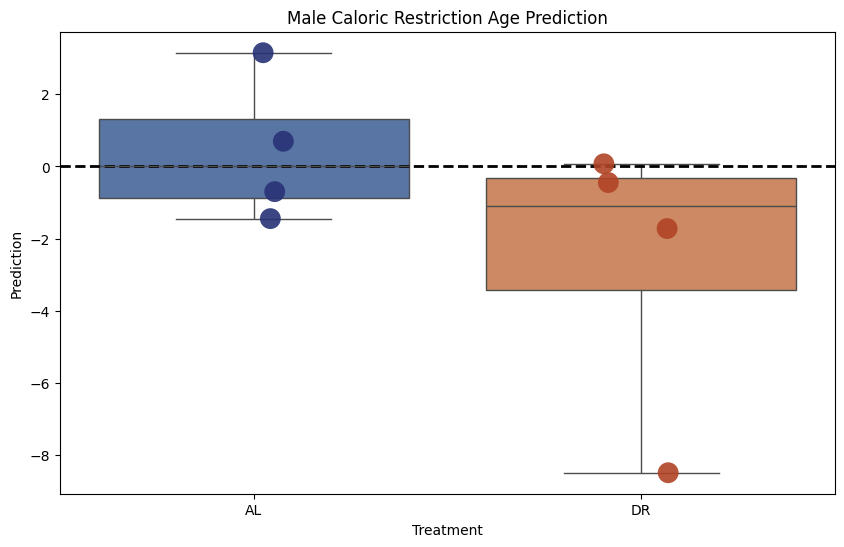

Components: 12
T-test p-value: 0.2322844265793642
Mann-Whitney U test p-value: 0.4857142857142857
             y_pred treatment
m_AL_L_1  66.545444        AL
m_DR_L_1  62.717681        DR
m_AL_L_2  64.334090        AL
m_DR_L_2  61.831021        DR
m_DR_L_3  62.974589        DR
m_AL_L_3  61.424968        AL
m_DR_L_4  54.673387        DR
m_AL_L_4  62.345760        AL
63.339924826452254
             y_pred treatment  prediction_adjust
m_AL_L_1  66.545444        AL           3.205519
m_DR_L_1  62.717681        DR          -0.622244
m_AL_L_2  64.334090        AL           0.994165
m_DR_L_2  61.831021        DR          -1.508904
m_DR_L_3  62.974589        DR          -0.365335
m_AL_L_3  61.424968        AL          -1.914957
m_DR_L_4  54.673387        DR          -8.666538
m_AL_L_4  62.345760        AL          -0.994165


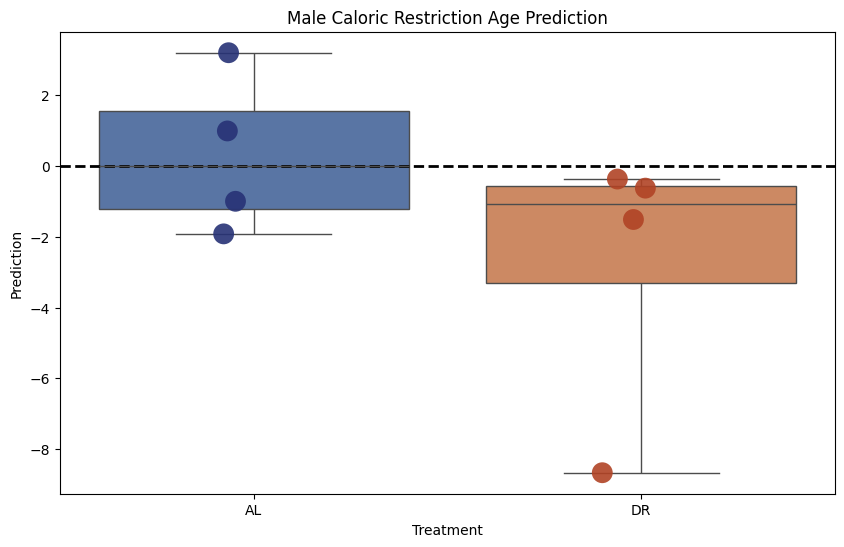

Components: 13
T-test p-value: 0.14641898587596403
Mann-Whitney U test p-value: 0.05714285714285714
             y_pred treatment
m_AL_L_1  73.102182        AL
m_DR_L_1  68.898653        DR
m_AL_L_2  71.307332        AL
m_DR_L_2  69.189993        DR
m_DR_L_3  69.488599        DR
m_AL_L_3  69.478603        AL
m_DR_L_4  61.351085        DR
m_AL_L_4  70.315881        AL
70.81160653584406
             y_pred treatment  prediction_adjust
m_AL_L_1  73.102182        AL           2.290575
m_DR_L_1  68.898653        DR          -1.912954
m_AL_L_2  71.307332        AL           0.495725
m_DR_L_2  69.189993        DR          -1.621613
m_DR_L_3  69.488599        DR          -1.323008
m_AL_L_3  69.478603        AL          -1.333004
m_DR_L_4  61.351085        DR          -9.460522
m_AL_L_4  70.315881        AL          -0.495725


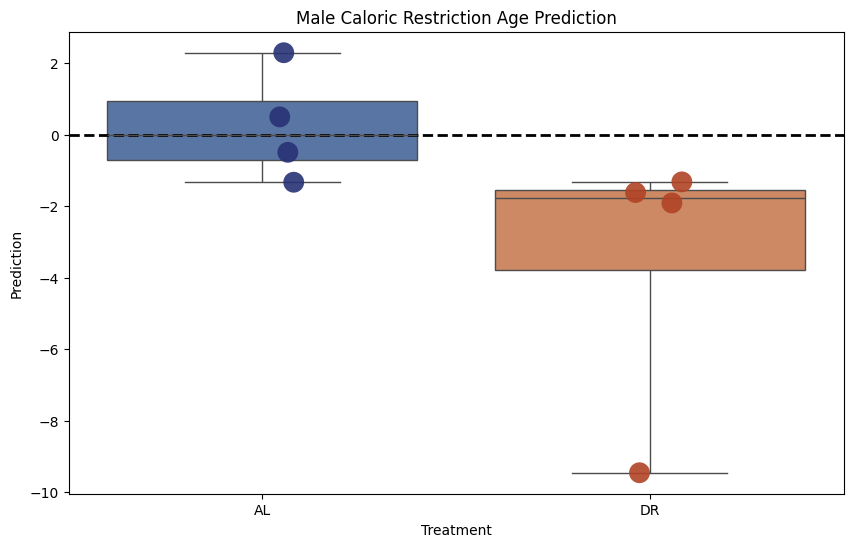

Components: 14
T-test p-value: 0.11748530079366189
Mann-Whitney U test p-value: 0.02857142857142857
             y_pred treatment
m_AL_L_1  79.884932        AL
m_DR_L_1  75.678411        DR
m_AL_L_2  78.403255        AL
m_DR_L_2  77.548687        DR
m_DR_L_3  75.507443        DR
m_AL_L_3  77.969804        AL
m_DR_L_4  68.163745        DR
m_AL_L_4  78.562818        AL
78.48303698758838
             y_pred treatment  prediction_adjust
m_AL_L_1  79.884932        AL           1.401895
m_DR_L_1  75.678411        DR          -2.804626
m_AL_L_2  78.403255        AL          -0.079782
m_DR_L_2  77.548687        DR          -0.934350
m_DR_L_3  75.507443        DR          -2.975594
m_AL_L_3  77.969804        AL          -0.513233
m_DR_L_4  68.163745        DR         -10.319292
m_AL_L_4  78.562818        AL           0.079782


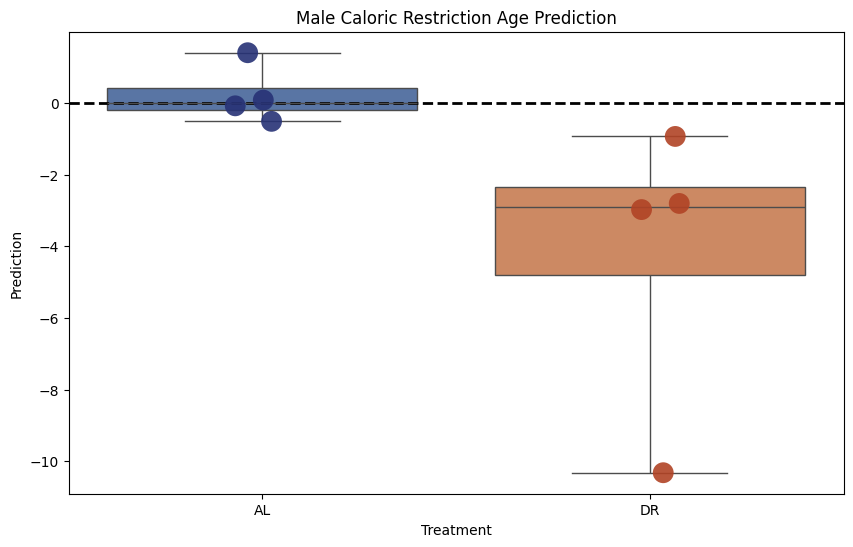

Components: 15
T-test p-value: 0.1137309399302133
Mann-Whitney U test p-value: 0.02857142857142857
             y_pred treatment
m_AL_L_1  74.859106        AL
m_DR_L_1  70.593833        DR
m_AL_L_2  73.163799        AL
m_DR_L_2  71.665680        DR
m_DR_L_3  70.833133        DR
m_AL_L_3  72.402140        AL
m_DR_L_4  63.227128        DR
m_AL_L_4  73.078057        AL
73.1209279906044
             y_pred treatment  prediction_adjust
m_AL_L_1  74.859106        AL           1.738178
m_DR_L_1  70.593833        DR          -2.527095
m_AL_L_2  73.163799        AL           0.042871
m_DR_L_2  71.665680        DR          -1.455248
m_DR_L_3  70.833133        DR          -2.287795
m_AL_L_3  72.402140        AL          -0.718788
m_DR_L_4  63.227128        DR          -9.893800
m_AL_L_4  73.078057        AL          -0.042871


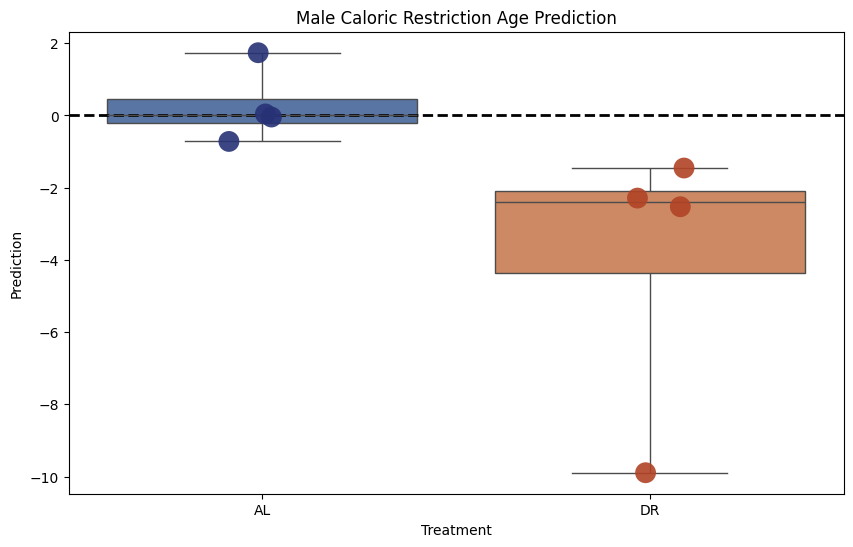

Components: 16
T-test p-value: 0.07834489961471106
Mann-Whitney U test p-value: 0.02857142857142857
             y_pred treatment
m_AL_L_1  84.172673        AL
m_DR_L_1  80.842053        DR
m_AL_L_2  85.949862        AL
m_DR_L_2  83.653810        DR
m_DR_L_3  78.986995        DR
m_AL_L_3  83.852596        AL
m_DR_L_4  73.798900        DR
m_AL_L_4  84.773667        AL
84.47316991209686
             y_pred treatment  prediction_adjust
m_AL_L_1  84.172673        AL          -0.300497
m_DR_L_1  80.842053        DR          -3.631117
m_AL_L_2  85.949862        AL           1.476693
m_DR_L_2  83.653810        DR          -0.819360
m_DR_L_3  78.986995        DR          -5.486175
m_AL_L_3  83.852596        AL          -0.620574
m_DR_L_4  73.798900        DR         -10.674270
m_AL_L_4  84.773667        AL           0.300497


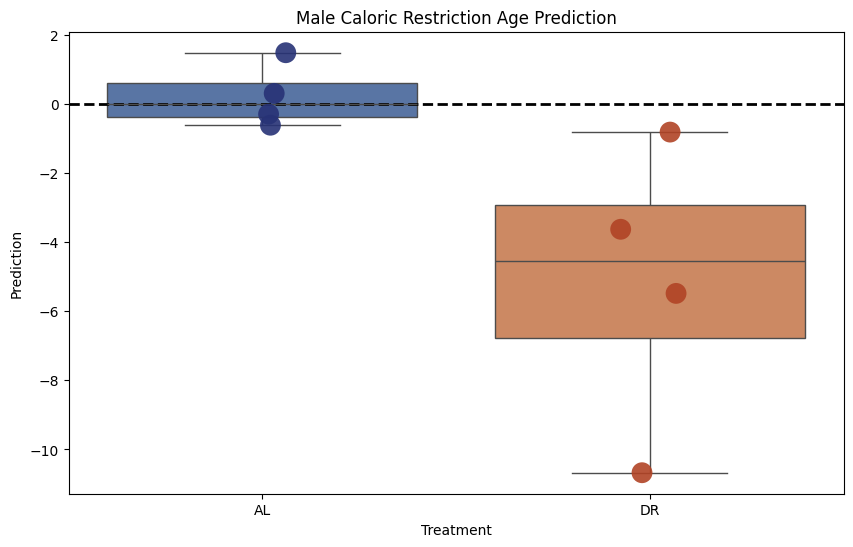

Components: 17
T-test p-value: 0.08037677574602277
Mann-Whitney U test p-value: 0.02857142857142857
             y_pred treatment
m_AL_L_1  83.973367        AL
m_DR_L_1  80.499318        DR
m_AL_L_2  86.026204        AL
m_DR_L_2  83.809316        DR
m_DR_L_3  79.104773        DR
m_AL_L_3  83.910275        AL
m_DR_L_4  73.534269        DR
m_AL_L_4  84.926463        AL
84.44991514947586
             y_pred treatment  prediction_adjust
m_AL_L_1  83.973367        AL          -0.476548
m_DR_L_1  80.499318        DR          -3.950597
m_AL_L_2  86.026204        AL           1.576289
m_DR_L_2  83.809316        DR          -0.640599
m_DR_L_3  79.104773        DR          -5.345142
m_AL_L_3  83.910275        AL          -0.539640
m_DR_L_4  73.534269        DR         -10.915646
m_AL_L_4  84.926463        AL           0.476548


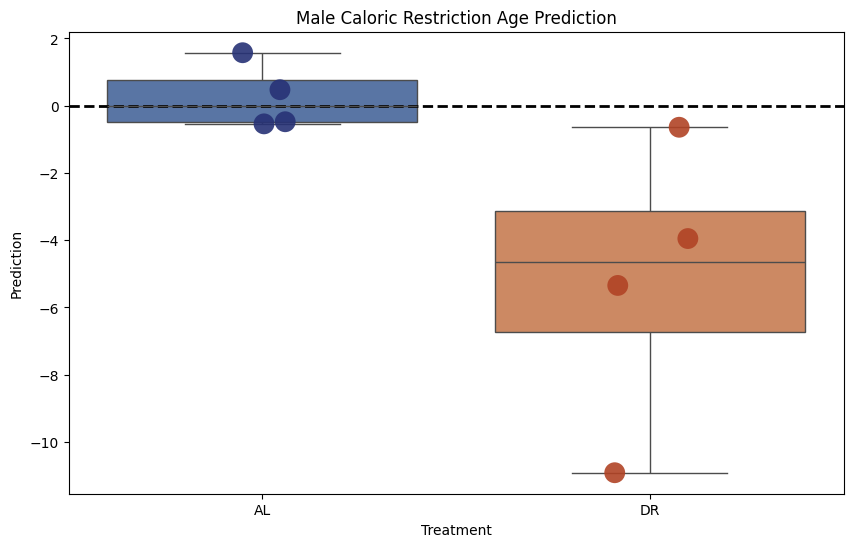

Components: 18
T-test p-value: 0.07515604738479847
Mann-Whitney U test p-value: 0.02857142857142857
             y_pred treatment
m_AL_L_1  83.748427        AL
m_DR_L_1  80.238234        DR
m_AL_L_2  85.401554        AL
m_DR_L_2  82.896977        DR
m_DR_L_3  78.321215        DR
m_AL_L_3  83.612429        AL
m_DR_L_4  72.608122        DR
m_AL_L_4  84.363835        AL
84.05613112774527
             y_pred treatment  prediction_adjust
m_AL_L_1  83.748427        AL          -0.307704
m_DR_L_1  80.238234        DR          -3.817897
m_AL_L_2  85.401554        AL           1.345423
m_DR_L_2  82.896977        DR          -1.159154
m_DR_L_3  78.321215        DR          -5.734916
m_AL_L_3  83.612429        AL          -0.443702
m_DR_L_4  72.608122        DR         -11.448009
m_AL_L_4  84.363835        AL           0.307704


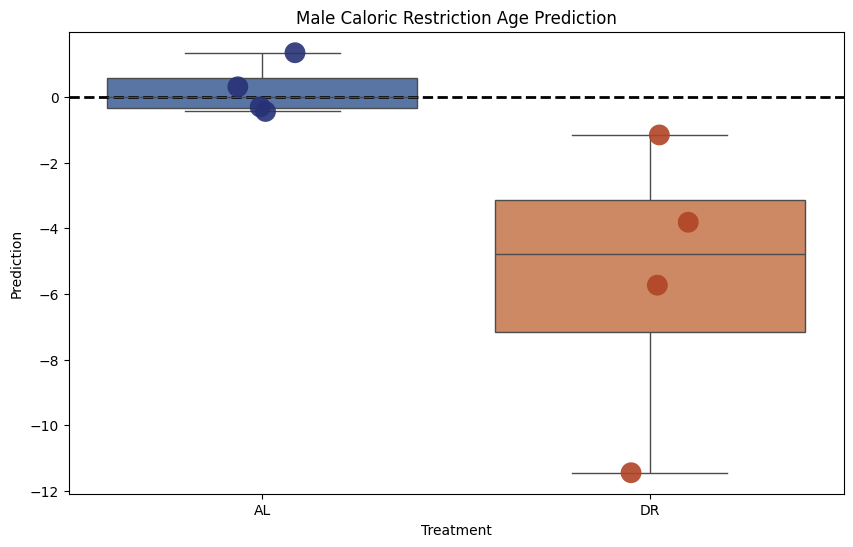

Components: 19
T-test p-value: 0.0695383318089732
Mann-Whitney U test p-value: 0.02857142857142857
             y_pred treatment
m_AL_L_1  83.609295        AL
m_DR_L_1  80.329183        DR
m_AL_L_2  85.724674        AL
m_DR_L_2  83.052433        DR
m_DR_L_3  78.454788        DR
m_AL_L_3  83.693138        AL
m_DR_L_4  73.091134        DR
m_AL_L_4  84.726622        AL
84.20988007665323
             y_pred treatment  prediction_adjust
m_AL_L_1  83.609295        AL          -0.600585
m_DR_L_1  80.329183        DR          -3.880697
m_AL_L_2  85.724674        AL           1.514794
m_DR_L_2  83.052433        DR          -1.157447
m_DR_L_3  78.454788        DR          -5.755092
m_AL_L_3  83.693138        AL          -0.516742
m_DR_L_4  73.091134        DR         -11.118746
m_AL_L_4  84.726622        AL           0.516742


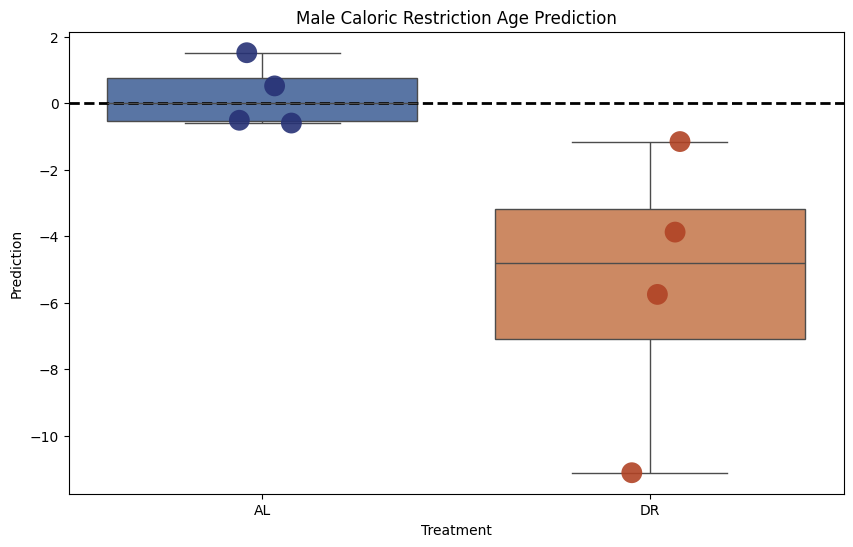

Components: 20
T-test p-value: 0.08904115494683376
Mann-Whitney U test p-value: 0.05714285714285714
             y_pred treatment
m_AL_L_1  86.945813        AL
m_DR_L_1  83.895721        DR
m_AL_L_2  88.410328        AL
m_DR_L_2  86.468709        DR
m_DR_L_3  81.803208        DR
m_AL_L_3  86.359422        AL
m_DR_L_4  76.860588        DR
m_AL_L_4  87.268330        AL
87.1070713359794
             y_pred treatment  prediction_adjust
m_AL_L_1  86.945813        AL          -0.161259
m_DR_L_1  83.895721        DR          -3.211351
m_AL_L_2  88.410328        AL           1.303257
m_DR_L_2  86.468709        DR          -0.638362
m_DR_L_3  81.803208        DR          -5.303863
m_AL_L_3  86.359422        AL          -0.747649
m_DR_L_4  76.860588        DR         -10.246484
m_AL_L_4  87.268330        AL           0.161259


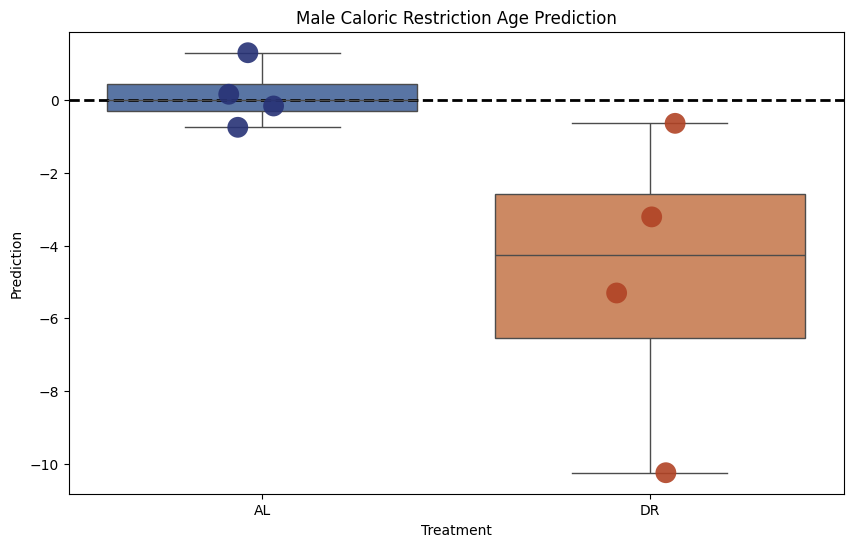

Components: 21
T-test p-value: 0.10378617620617396
Mann-Whitney U test p-value: 0.11428571428571428
             y_pred treatment
m_AL_L_1  85.119038        AL
m_DR_L_1  82.482239        DR
m_AL_L_2  86.828012        AL
m_DR_L_2  85.459382        DR
m_DR_L_3  79.407963        DR
m_AL_L_3  84.735366        AL
m_DR_L_4  75.451922        DR
m_AL_L_4  85.719239        AL
85.41913829468889
             y_pred treatment  prediction_adjust
m_AL_L_1  85.119038        AL          -0.300101
m_DR_L_1  82.482239        DR          -2.936900
m_AL_L_2  86.828012        AL           1.408874
m_DR_L_2  85.459382        DR           0.040243
m_DR_L_3  79.407963        DR          -6.011176
m_AL_L_3  84.735366        AL          -0.683772
m_DR_L_4  75.451922        DR          -9.967216
m_AL_L_4  85.719239        AL           0.300101


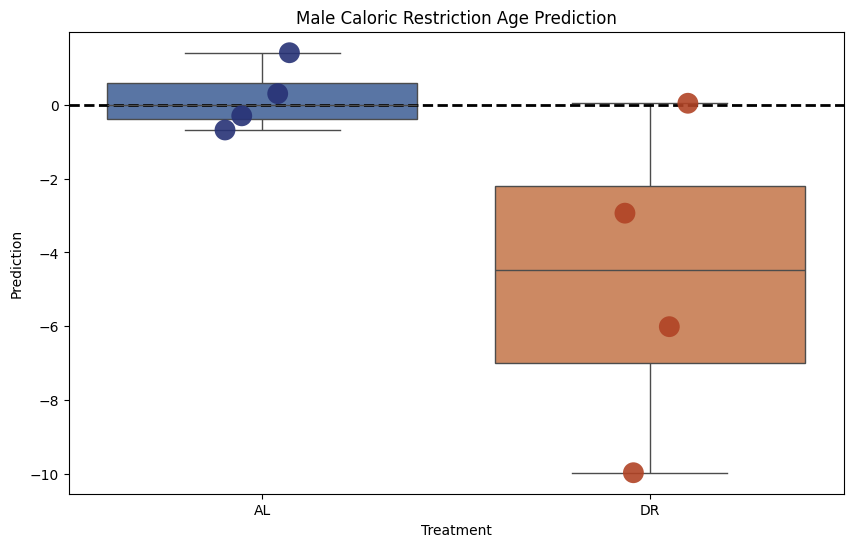

Components: 22
T-test p-value: 0.06633905672144294
Mann-Whitney U test p-value: 0.02857142857142857
             y_pred treatment
m_AL_L_1  83.765642        AL
m_DR_L_1  80.834764        DR
m_AL_L_2  86.015460        AL
m_DR_L_2  83.755933        DR
m_DR_L_3  78.675127        DR
m_AL_L_3  83.945985        AL
m_DR_L_4  74.450816        DR
m_AL_L_4  85.505748        AL
84.7258663781677
             y_pred treatment  prediction_adjust
m_AL_L_1  83.765642        AL          -0.960225
m_DR_L_1  80.834764        DR          -3.891102
m_AL_L_2  86.015460        AL           1.289593
m_DR_L_2  83.755933        DR          -0.969934
m_DR_L_3  78.675127        DR          -6.050740
m_AL_L_3  83.945985        AL          -0.779882
m_DR_L_4  74.450816        DR         -10.275051
m_AL_L_4  85.505748        AL           0.779882


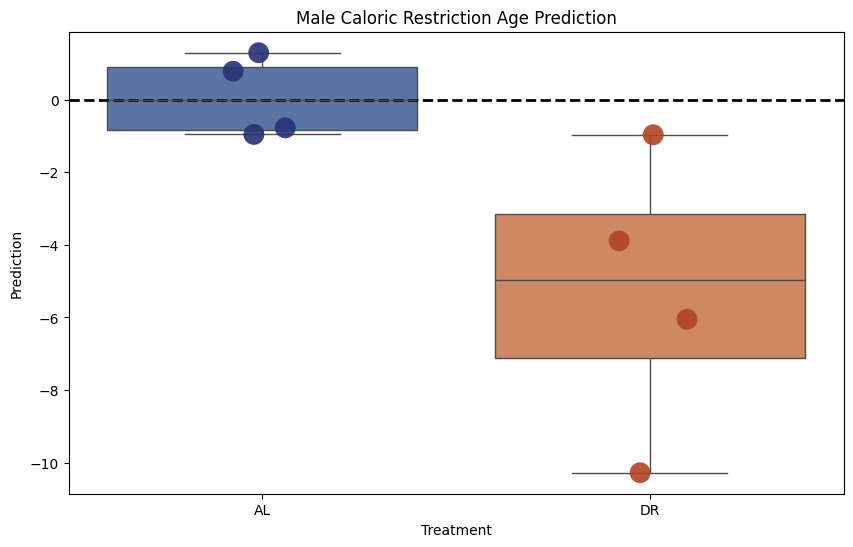

Components: 23
T-test p-value: 0.06237721188397265
Mann-Whitney U test p-value: 0.05714285714285714
             y_pred treatment
m_AL_L_1  84.207380        AL
m_DR_L_1  81.209519        DR
m_AL_L_2  86.616038        AL
m_DR_L_2  84.310112        DR
m_DR_L_3  79.166398        DR
m_AL_L_3  84.708882        AL
m_DR_L_4  74.892662        DR
m_AL_L_4  86.237093        AL
85.47298776524099
             y_pred treatment  prediction_adjust
m_AL_L_1  84.207380        AL          -1.265608
m_DR_L_1  81.209519        DR          -4.263469
m_AL_L_2  86.616038        AL           1.143050
m_DR_L_2  84.310112        DR          -1.162876
m_DR_L_3  79.166398        DR          -6.306590
m_AL_L_3  84.708882        AL          -0.764106
m_DR_L_4  74.892662        DR         -10.580326
m_AL_L_4  86.237093        AL           0.764106


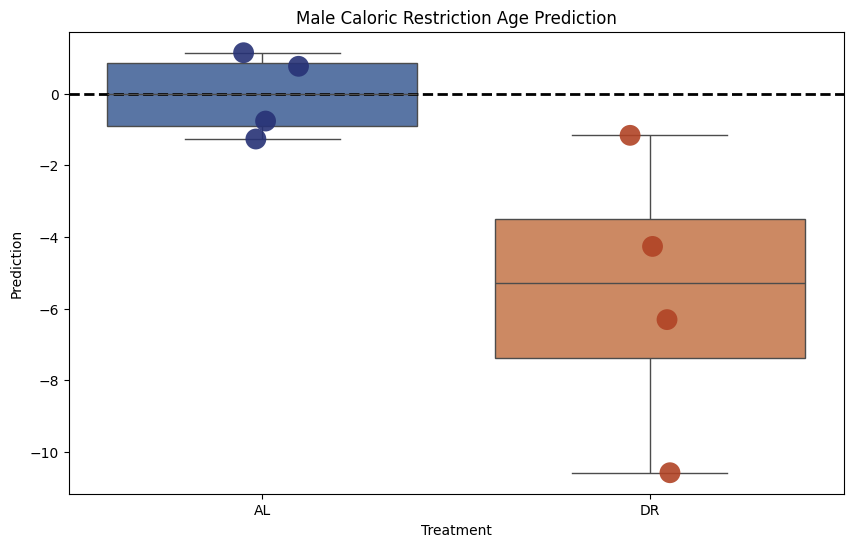

Components: 24
T-test p-value: 0.05334645457182969
Mann-Whitney U test p-value: 0.02857142857142857
             y_pred treatment
m_AL_L_1  83.787116        AL
m_DR_L_1  79.864093        DR
m_AL_L_2  84.958881        AL
m_DR_L_2  82.915538        DR
m_DR_L_3  78.314622        DR
m_AL_L_3  83.875159        AL
m_DR_L_4  73.487457        DR
m_AL_L_4  85.701706        AL
84.41702017248323
             y_pred treatment  prediction_adjust
m_AL_L_1  83.787116        AL          -0.629904
m_DR_L_1  79.864093        DR          -4.552928
m_AL_L_2  84.958881        AL           0.541861
m_DR_L_2  82.915538        DR          -1.501482
m_DR_L_3  78.314622        DR          -6.102398
m_AL_L_3  83.875159        AL          -0.541861
m_DR_L_4  73.487457        DR         -10.929564
m_AL_L_4  85.701706        AL           1.284686


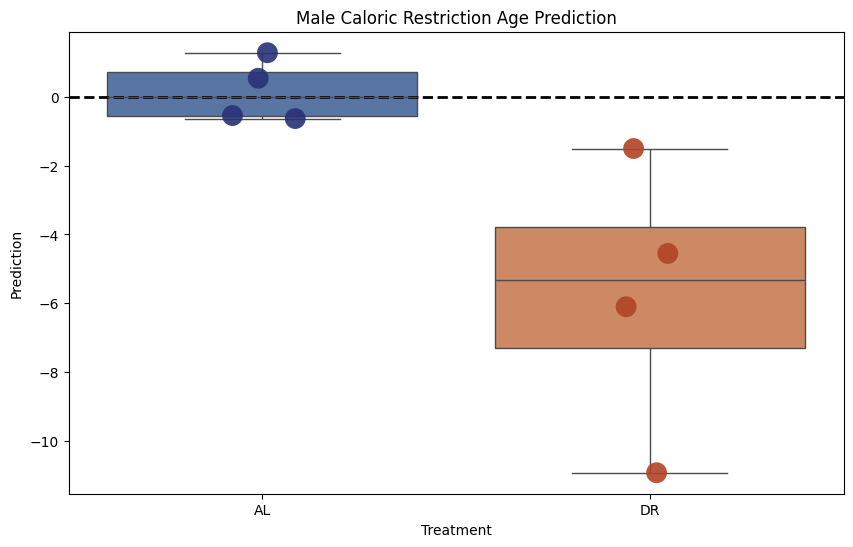

Components: 25
T-test p-value: 0.04870420073407203
Mann-Whitney U test p-value: 0.02857142857142857
             y_pred treatment
m_AL_L_1  84.238939        AL
m_DR_L_1  80.461134        DR
m_AL_L_2  85.221327        AL
m_DR_L_2  83.218731        DR
m_DR_L_3  78.726525        DR
m_AL_L_3  84.089775        AL
m_DR_L_4  74.482388        DR
m_AL_L_4  86.116222        AL
84.73013278409586
             y_pred treatment  prediction_adjust
m_AL_L_1  84.238939        AL          -0.491194
m_DR_L_1  80.461134        DR          -4.268999
m_AL_L_2  85.221327        AL           0.491194
m_DR_L_2  83.218731        DR          -1.511401
m_DR_L_3  78.726525        DR          -6.003608
m_AL_L_3  84.089775        AL          -0.640357
m_DR_L_4  74.482388        DR         -10.247744
m_AL_L_4  86.116222        AL           1.386089


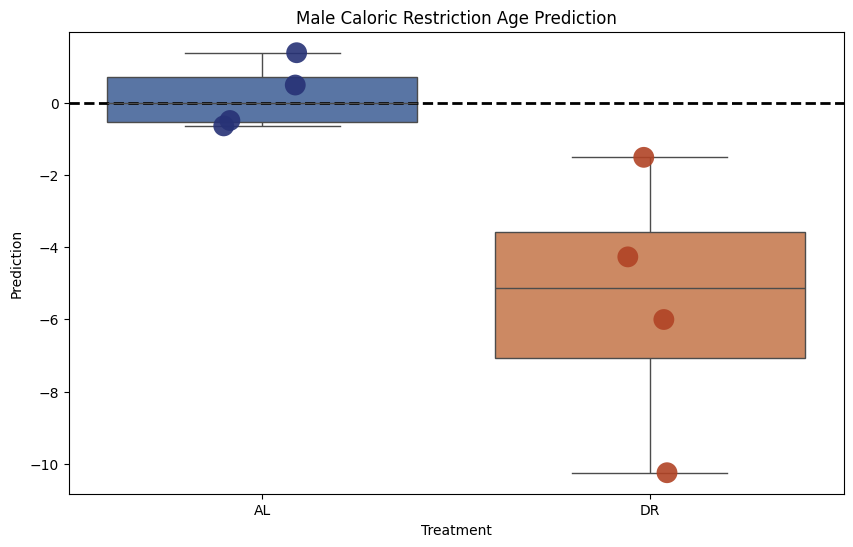

Components: 26
T-test p-value: 0.06626669211351328
Mann-Whitney U test p-value: 0.05714285714285714
             y_pred treatment
m_AL_L_1  85.986494        AL
m_DR_L_1  81.416440        DR
m_AL_L_2  86.134534        AL
m_DR_L_2  85.003830        DR
m_DR_L_3  80.019422        DR
m_AL_L_3  84.888294        AL
m_DR_L_4  75.734939        DR
m_AL_L_4  86.529019        AL
86.06051387012074
             y_pred treatment  prediction_adjust
m_AL_L_1  85.986494        AL          -0.074020
m_DR_L_1  81.416440        DR          -4.644074
m_AL_L_2  86.134534        AL           0.074020
m_DR_L_2  85.003830        DR          -1.056684
m_DR_L_3  80.019422        DR          -6.041091
m_AL_L_3  84.888294        AL          -1.172220
m_DR_L_4  75.734939        DR         -10.325575
m_AL_L_4  86.529019        AL           0.468505


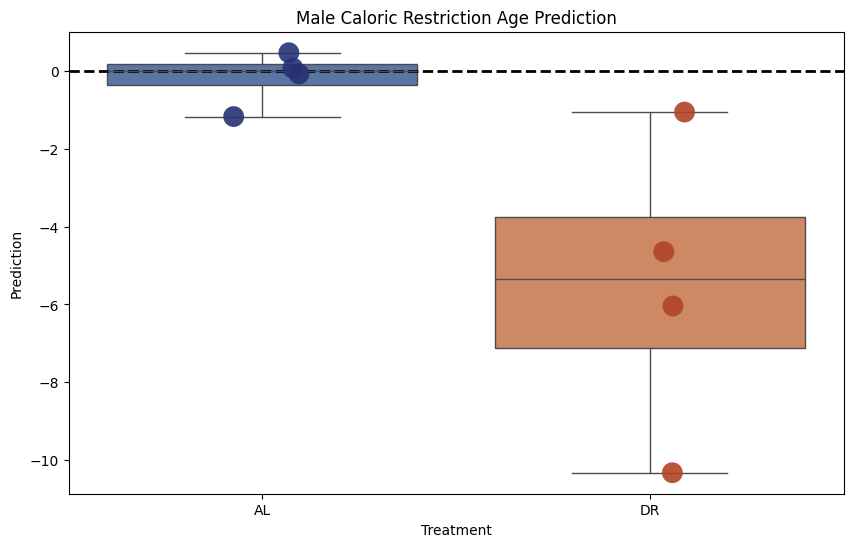

Components: 27
T-test p-value: 0.06555214373757018
Mann-Whitney U test p-value: 0.05714285714285714
             y_pred treatment
m_AL_L_1  84.744361        AL
m_DR_L_1  80.357254        DR
m_AL_L_2  84.976024        AL
m_DR_L_2  83.757990        DR
m_DR_L_3  78.737848        DR
m_AL_L_3  83.644134        AL
m_DR_L_4  74.762759        DR
m_AL_L_4  85.169749        AL
84.86019241366667
             y_pred treatment  prediction_adjust
m_AL_L_1  84.744361        AL          -0.115832
m_DR_L_1  80.357254        DR          -4.502938
m_AL_L_2  84.976024        AL           0.115832
m_DR_L_2  83.757990        DR          -1.102202
m_DR_L_3  78.737848        DR          -6.122345
m_AL_L_3  83.644134        AL          -1.216058
m_DR_L_4  74.762759        DR         -10.097434
m_AL_L_4  85.169749        AL           0.309557


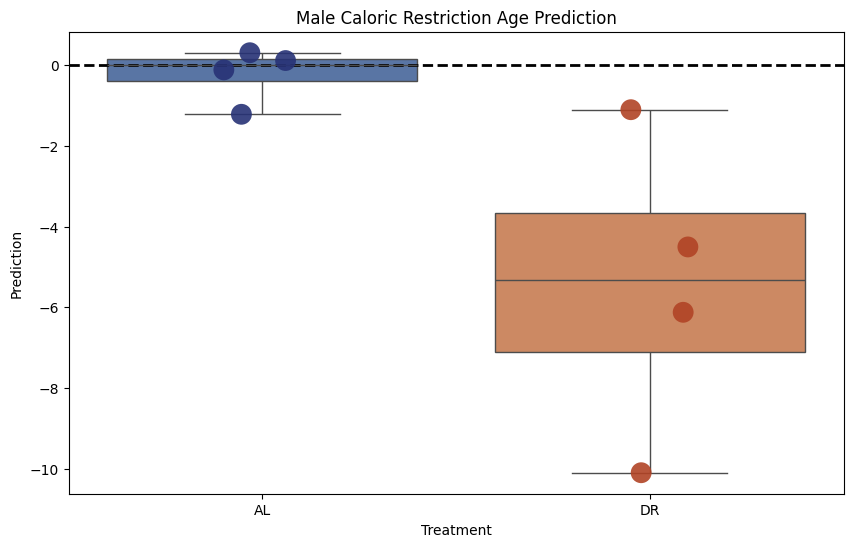

Components: 28
T-test p-value: 0.06356873744830183
Mann-Whitney U test p-value: 0.05714285714285714
             y_pred treatment
m_AL_L_1  85.399709        AL
m_DR_L_1  81.097866        DR
m_AL_L_2  85.682661        AL
m_DR_L_2  84.390921        DR
m_DR_L_3  79.313287        DR
m_AL_L_3  84.294877        AL
m_DR_L_4  75.562466        DR
m_AL_L_4  85.837287        AL
85.54118493544459
             y_pred treatment  prediction_adjust
m_AL_L_1  85.399709        AL          -0.141476
m_DR_L_1  81.097866        DR          -4.443319
m_AL_L_2  85.682661        AL           0.141476
m_DR_L_2  84.390921        DR          -1.150264
m_DR_L_3  79.313287        DR          -6.227898
m_AL_L_3  84.294877        AL          -1.246308
m_DR_L_4  75.562466        DR          -9.978718
m_AL_L_4  85.837287        AL           0.296102


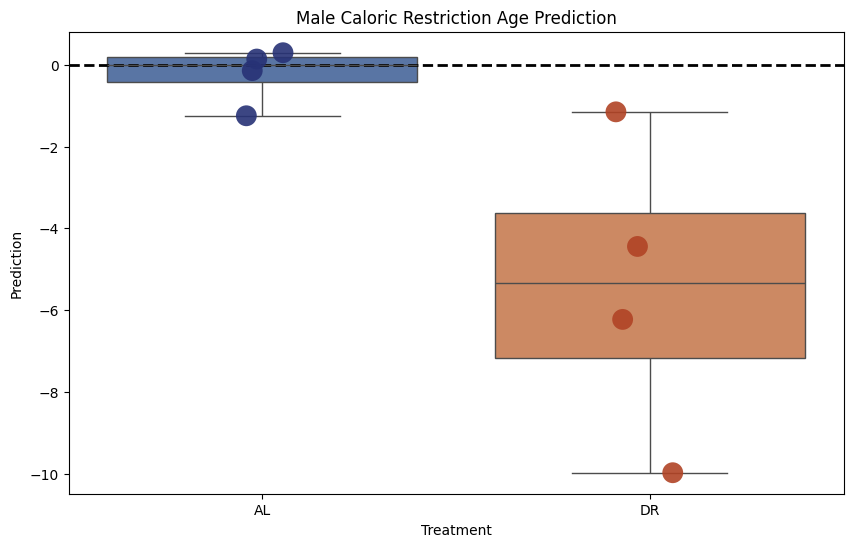

Components: 29
T-test p-value: 0.06200280420989446
Mann-Whitney U test p-value: 0.05714285714285714
             y_pred treatment
m_AL_L_1  85.224014        AL
m_DR_L_1  80.955391        DR
m_AL_L_2  85.611038        AL
m_DR_L_2  84.306074        DR
m_DR_L_3  79.108032        DR
m_AL_L_3  84.282884        AL
m_DR_L_4  75.447003        DR
m_AL_L_4  85.860559        AL
85.41752597737892
             y_pred treatment  prediction_adjust
m_AL_L_1  85.224014        AL          -0.193512
m_DR_L_1  80.955391        DR          -4.462135
m_AL_L_2  85.611038        AL           0.193512
m_DR_L_2  84.306074        DR          -1.111452
m_DR_L_3  79.108032        DR          -6.309494
m_AL_L_3  84.282884        AL          -1.134642
m_DR_L_4  75.447003        DR          -9.970523
m_AL_L_4  85.860559        AL           0.443033


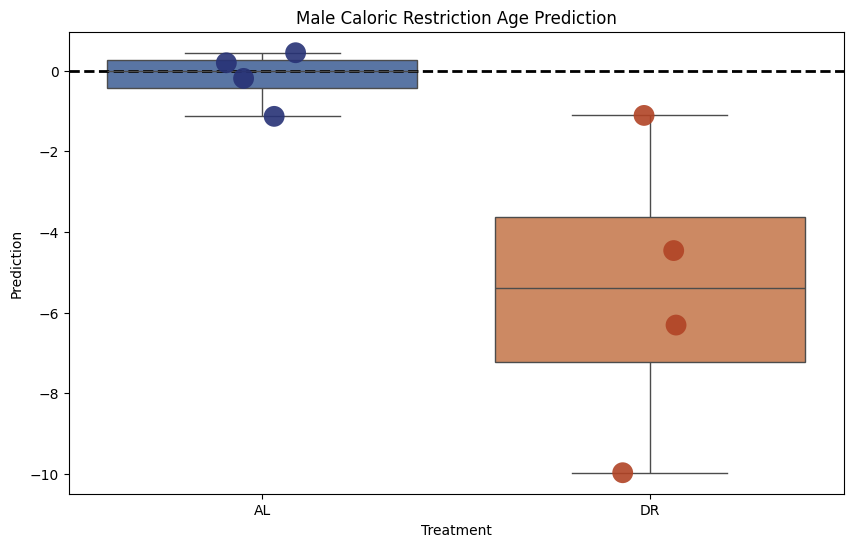

Components: 30
T-test p-value: 0.06716845680130344
Mann-Whitney U test p-value: 0.02857142857142857
             y_pred treatment
m_AL_L_1  85.450142        AL
m_DR_L_1  81.971417        DR
m_AL_L_2  86.060097        AL
m_DR_L_2  85.021719        DR
m_DR_L_3  80.070863        DR
m_AL_L_3  85.130283        AL
m_DR_L_4  76.464581        DR
m_AL_L_4  86.714386        AL
85.75511986508889
             y_pred treatment  prediction_adjust
m_AL_L_1  85.450142        AL          -0.304977
m_DR_L_1  81.971417        DR          -3.783702
m_AL_L_2  86.060097        AL           0.304977
m_DR_L_2  85.021719        DR          -0.733401
m_DR_L_3  80.070863        DR          -5.684257
m_AL_L_3  85.130283        AL          -0.624837
m_DR_L_4  76.464581        DR          -9.290539
m_AL_L_4  86.714386        AL           0.959266


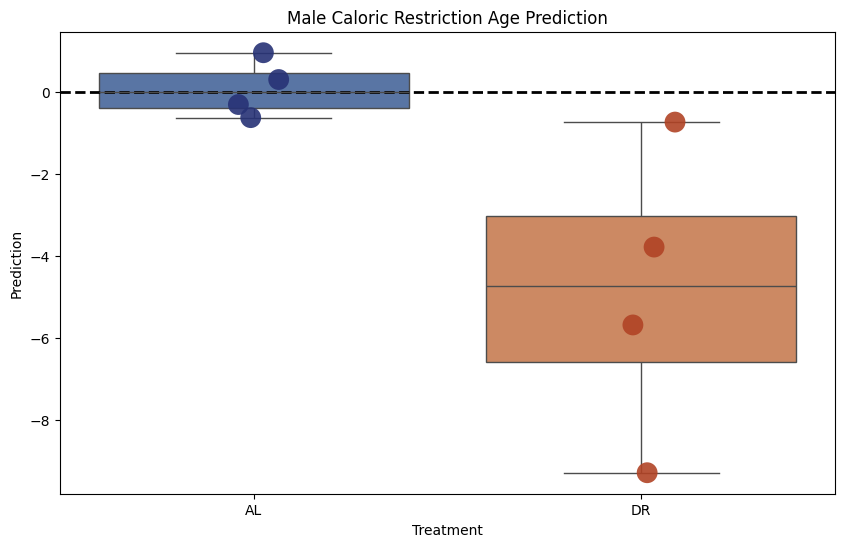

Components: 31
T-test p-value: 0.06716845680130412
Mann-Whitney U test p-value: 0.02857142857142857
             y_pred treatment
m_AL_L_1  85.450142        AL
m_DR_L_1  81.971417        DR
m_AL_L_2  86.060097        AL
m_DR_L_2  85.021719        DR
m_DR_L_3  80.070863        DR
m_AL_L_3  85.130283        AL
m_DR_L_4  76.464581        DR
m_AL_L_4  86.714386        AL
85.75511986508894
             y_pred treatment  prediction_adjust
m_AL_L_1  85.450142        AL          -0.304977
m_DR_L_1  81.971417        DR          -3.783702
m_AL_L_2  86.060097        AL           0.304977
m_DR_L_2  85.021719        DR          -0.733401
m_DR_L_3  80.070863        DR          -5.684257
m_AL_L_3  85.130283        AL          -0.624837
m_DR_L_4  76.464581        DR          -9.290539
m_AL_L_4  86.714386        AL           0.959266


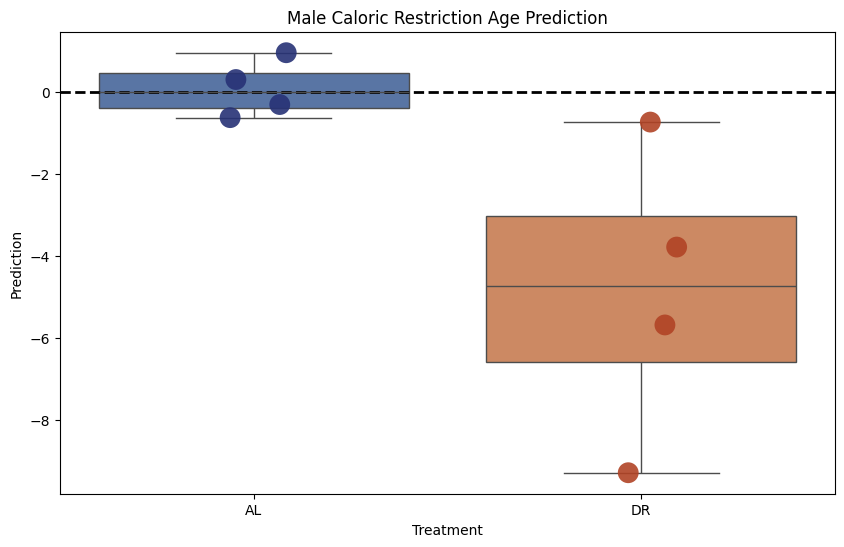

In [ ]:
# Loop through all possible components to predict the test set
max_components = min(X_train_scaled.shape[0], X_train_scaled.shape[1])
all_y_test_preds = []

for n_components in range(1, max_components + 1):
    print(f"Components: {n_components}")

    # Apply PCA
    pca = PCA(n_components=n_components, random_state=1)
    X_train_pca = pca.fit_transform(X_train_scaled)
    X_test_pca = pca.transform(X_test_scaled)

    # Train the model
    regressor = LinearRegression()
    regressor.fit(X_train_pca, age_train)

    # Predict on the test set
    y_test_pred = regressor.predict(X_test_pca)

    # Save the actual and predicted values to a DataFrame
    results_df = pd.DataFrame({
    'y_pred': y_test_pred
    }, index=df_cr_age_liver_male_norm_common_without_age.index.tolist())

    #print(results_df)
    df_cr = results_df.loc[df_cr_age_liver_male.index.tolist(), ]

    df_cr.head(5)

    df_cr["treatment"] = df_cr_age_liver["treatment"]

    df_cr.head(5)

    # Ensure predictions are numeric
    pred_al = pd.to_numeric(df_cr[df_cr['treatment'] == "AL"]['y_pred'], errors='coerce')
    pred_dr = pd.to_numeric(df_cr[df_cr['treatment'] == "DR"]['y_pred'], errors='coerce')

    # Drop any NaN values if necessary
    pred_al = pred_al.dropna()
    pred_dr = pred_dr.dropna()

    # Perform t-test
    t_stat, p_ttest = ttest_ind(pred_al, pred_dr, equal_var=False)  # Welch's t-test for unequal variances

    # Perform Mann-Whitney U test
    u_stat, p_mwu = mannwhitneyu(pred_al, pred_dr, alternative='two-sided')

    # Print results
    print(f"T-test p-value: {p_ttest}")
    print(f"Mann-Whitney U test p-value: {p_mwu}")

    filtered_df_al = df_cr[df_cr['treatment'] == "AL"]
    filtered_df_dr = df_cr[df_cr['treatment'] == "DR"]

    # Display the filtered DataFrame
    #print(filtered_df_al)
    #print(filtered_df_dr)
    print(df_cr)

    # Adjust to the median of the AL samples
    median_AL = df_cr[df_cr['treatment'] == 'AL']['y_pred'].median()
    print(median_AL)

    df_cr["prediction_adjust"] = df_cr["y_pred"] - median_AL
    print(df_cr)

    # Create the box plot
    plt.figure(figsize=(10, 6))
    box = sns.boxplot(x='treatment', y='prediction_adjust', hue='treatment', data=df_cr, palette='deep', showfliers = False, whis = [0,100])

    #custom_palette = ['#FF6347', '#4682B4', '#32CD32', '#FFD700']  # Use desired hex color codes
    custom_palette = ['#273276', '#B14325']  # Use desired hex color codes

    # Add data points with custom colors
    strip = sns.stripplot(
        x='treatment',
        y='prediction_adjust',
        hue='treatment',
        data=df_cr,
        palette=custom_palette,  # Custom color palette
        dodge=False,
        alpha=0.9,
        jitter=True,
        size=15
    )

    # Remove the legend if not needed
    #strip.legend_.remove()

    plt.axhline(y=0, color='black', linestyle='--', linewidth=2)

    # Customize the plot
    plt.title('Male Caloric Restriction Age Prediction')
    plt.xlabel('Treatment')
    plt.ylabel('Prediction')

    # Remove the grid
    plt.grid(False)
    out_file_name = f"liver_male_PCR_cr_medianadjust_n_components_{n_components}.svg"
    out_path = os.path.join("./outputs/pc_regression/", out_file_name)
    plt.savefig(out_path, dpi=300, bbox_inches="tight")

    # Show the plot
    plt.show()

    all_y_test_preds.append({
        'n_components': n_components,
        'y_test_pred': y_test_pred
    })

    # Optionally, print the predictions for each number of components
    #print(f"Components: {n_components}, Predictions: {y_test_pred}")

    # Save the DataFrame to a CSV file
    output_path = './outputs/pc_regression/'
    pc_num = "".join([str(n_components), "pcs"])
    out_file_prefix = 'ALDR_male_PCregression_medianadjust_pred'
    out_file_name = "_".join([out_file_prefix, pc_num])
    df_cr.to_csv(os.path.join(output_path, out_file_name), sep="\t")


##### Save PC loadings

In [ ]:
# Loop through all possible components to predict the test set
max_components = min(X_train_scaled.shape[0], X_train_scaled.shape[1])
all_y_test_preds = []

# Prepare directory to save PCA loadings
loadings_output_dir = './outputs/pc_regression/pca_loadings/male/'
os.makedirs(loadings_output_dir, exist_ok=True)

for n_components in range(1, max_components + 1):
    print(f"Components: {n_components}")

    # Apply PCA
    pca = PCA(n_components=n_components, random_state=1)
    X_train_pca = pca.fit_transform(X_train_scaled)
    X_test_pca = pca.transform(X_test_scaled)

    # Save PCA loadings
    loadings_df = pd.DataFrame(
    pca.components_,
    columns=X_train.columns if isinstance(X_train, pd.DataFrame) else [f"Feature_{i+1}" for i in range(X_train_scaled.shape[1])],
    index=[f"PC{i+1}" for i in range(n_components)])

    loadings_file_name = f"pca_loadings_{n_components}components.csv"
    loadings_df.to_csv(os.path.join(loadings_output_dir, loadings_file_name), sep="\t")

    for pc in loadings_df.index:
      top_genes = loadings_df.loc[pc].abs().nlargest(30)
      print(f"Top genes for {pc}:")
      print(top_genes)
      top_genes.to_csv(os.path.join(loadings_output_dir, f"top_genes_{pc}.csv"), sep="\t")

    # plt.figure(figsize=(12, 8))
    # sns.heatmap(loadings_df, cmap='coolwarm', annot=False)
    # plt.title('PCA Loadings')
    # plt.xlabel('Genes')
    # plt.ylabel('Principal Components')
    # plt.show()



Streaming output truncated to the last 5000 lines.
LOC107389407    0.023245
pdgfc           0.023198
Name: PC15, dtype: float64
Top genes for PC16:
LOC107373358    0.030039
LOC107376808    0.029258
LOC107390991    0.029258
LOC107391784    0.029258
LOC107393160    0.029258
LOC107393879    0.029258
prr7            0.029258
spon2           0.029258
slc16a3         0.028633
fam181a         0.028316
LOC107381833    0.027699
LOC107376297    0.027586
LOC107386513    0.027586
LOC107387133    0.027442
LOC107393242    0.027442
LOC107379632    0.027193
lmo3            0.027159
LOC107389551    0.027078
LOC107378009    0.026122
LOC107373370    0.025543
LOC107384515    0.025338
LOC107377363    0.025310
LOC107384468    0.025281
LOC107375047    0.025225
atp10b          0.025060
LOC107376518    0.024961
LOC107382300    0.024742
aspn            0.024720
camta1          0.024676
LOC107382057    0.024661
Name: PC16, dtype: float64
Top genes for PC17:
LOC107387682    0.029586
LOC107376940    0.029577
cpne2

### Female

In [ ]:
liver_df_norm_female = liver_df_norm.loc[liver_df_norm.iloc[:,-3] == "F"]

liver_df_norm_female.head(10)

a1cf        aaas          aacs        aadat       aaed1  \
A6_1  43882.858900  853.088237  19132.800486  1147.075568   81.371493   
A7_1  46308.620187  503.876178   3746.507910   867.215463  126.825977   
B5_1  50060.335020  509.903707   3616.007271   556.585032   32.317841   
B6_1  52010.405793  439.314180   3444.223173   593.074143   74.683411   
B8_1  57870.342592  385.596632   4719.702781   704.356515   66.836750   
C6_1  47984.562591  858.602909  19799.707089   605.882053   55.080187   
D7_1  67424.185356  556.809238  15745.327910   796.546549   73.467886   
E6_1  63081.109900  597.464257   6752.735553   719.736012  141.724080   
E8_1  54598.001812  466.518856   3303.871240   783.904635   57.358876   
G5_1  49741.618891  708.784412   8291.589712   633.550312   75.234100   

            aagab         aak1        aamdc         aamp        aar2  ...  \
A6_1  1433.188238  1212.697740  1622.180093  1532.933939  713.969232  ...   
A7_1  1144.861521  1357.380725  1669.304073   970.047336  647.840801  ...   
B5_1  1037.761769  1052.125254  1658.982482  1138.306162  621.220713  ...   
B6_1  1107.071734   926.952920  1555.172198   760.013532  733.654681  ...   
B8_1   776.334553  1033.398975  1269.898243  1043.681552  622.095900  ...   
C6_1  1046.523546  1072.443634  1389.964710  1590.845390  686.882327  ...   
D7_1   931.882128  1179.352901  1871.497718   804.280011  479.474622  ...   
E6_1   947.606100   928.153776  1297.747944  1217.159742  603.022064  ...   
E8_1  1166.297139  1284.838816  1636.639920   944.509486  676.834733  ...   
G5_1  1243.342488  1211.664972  1381.931619  1136.430873  601.872797  ...   

           zufsp         zw10      zwilch      zyg11b          zyx  \
A6_1  118.119910  2543.515389  307.111765  425.231675  2302.025796   
A7_1   41.132749  3033.540256    3.427729  414.755222  3191.215795   
B5_1   25.136098  2007.296986    3.590871  373.450602  2330.475391   
B6_1   39.538276  3088.378687    4.393142  487.638740  1871.478408   
B8_1   87.401903  2035.950219   35.989019  493.563689  1300.745973   
C6_1  106.920362  2361.968003  178.200604  320.761087  2089.807081   
D7_1   92.801540  1600.826561   27.067116  634.143855  2002.966566   
E6_1   97.261623  1267.180005   25.010132  408.498817  2576.043563   
E8_1  110.893826  1781.949072   19.119625  416.807830  2588.797256   
G5_1   83.153478  2213.466403   91.072857  542.477455  1987.764105   

           zzef1        zzz3  sex  tissue  age_days  
A6_1  782.216291  577.475114    F   Liver        52  
A7_1  586.141677  661.551717    F   Liver       133  
B5_1  570.948516  416.541056    F   Liver       102  
B6_1  505.211307  544.749583    F   Liver       134  
B8_1  426.726940  483.281113    F   Liver       133  
C6_1  631.802141  476.281614    F   Liver        52  
D7_1  421.473660  545.209046    F   Liver       147  
E6_1  464.076888  408.498817    F   Liver       134  
E8_1  558.293057  439.751380    F   Liver       147  
G5_1  673.147207  344.492982    F   Liver        78  

[10 rows x 25125 columns]

In [ ]:
liver_df_norm_expression_female = liver_df_norm_female.iloc[:,:-3]

liver_df_norm_expression_female.head(5)

a1cf        aaas          aacs        aadat       aaed1  \
A6_1  43882.858900  853.088237  19132.800486  1147.075568   81.371493   
A7_1  46308.620187  503.876178   3746.507910   867.215463  126.825977   
B5_1  50060.335020  509.903707   3616.007271   556.585032   32.317841   
B6_1  52010.405793  439.314180   3444.223173   593.074143   74.683411   
B8_1  57870.342592  385.596632   4719.702781   704.356515   66.836750   

            aagab         aak1        aamdc         aamp        aar2  ...  \
A6_1  1433.188238  1212.697740  1622.180093  1532.933939  713.969232  ...   
A7_1  1144.861521  1357.380725  1669.304073   970.047336  647.840801  ...   
B5_1  1037.761769  1052.125254  1658.982482  1138.306162  621.220713  ...   
B6_1  1107.071734   926.952920  1555.172198   760.013532  733.654681  ...   
B8_1   776.334553  1033.398975  1269.898243  1043.681552  622.095900  ...   

          zswim6      zswim7       zswim8       zufsp         zw10  \
A6_1  181.117195  191.616742  1007.956563  118.119910  2543.515389   
A7_1  140.536893  202.236017  1336.814350   41.132749  3033.540256   
B5_1  118.498749  157.998332  1116.760935   25.136098  2007.296986   
B6_1  144.973679  101.042261   856.662651   39.538276  3088.378687   
B8_1  107.967057  303.336017   925.431918   87.401903  2035.950219   

          zwilch      zyg11b          zyx       zzef1        zzz3  
A6_1  307.111765  425.231675  2302.025796  782.216291  577.475114  
A7_1    3.427729  414.755222  3191.215795  586.141677  661.551717  
B5_1    3.590871  373.450602  2330.475391  570.948516  416.541056  
B6_1    4.393142  487.638740  1871.478408  505.211307  544.749583  
B8_1   35.989019  493.563689  1300.745973  426.726940  483.281113  

[5 rows x 25122 columns]

In [ ]:
liver_pca_df_female = liver_df_norm_expression_female.copy()

liver_pca_df_female.head(5)

a1cf        aaas          aacs        aadat       aaed1  \
A6_1  43882.858900  853.088237  19132.800486  1147.075568   81.371493   
A7_1  46308.620187  503.876178   3746.507910   867.215463  126.825977   
B5_1  50060.335020  509.903707   3616.007271   556.585032   32.317841   
B6_1  52010.405793  439.314180   3444.223173   593.074143   74.683411   
B8_1  57870.342592  385.596632   4719.702781   704.356515   66.836750   

            aagab         aak1        aamdc         aamp        aar2  ...  \
A6_1  1433.188238  1212.697740  1622.180093  1532.933939  713.969232  ...   
A7_1  1144.861521  1357.380725  1669.304073   970.047336  647.840801  ...   
B5_1  1037.761769  1052.125254  1658.982482  1138.306162  621.220713  ...   
B6_1  1107.071734   926.952920  1555.172198   760.013532  733.654681  ...   
B8_1   776.334553  1033.398975  1269.898243  1043.681552  622.095900  ...   

          zswim6      zswim7       zswim8       zufsp         zw10  \
A6_1  181.117195  191.616742  1007.956563  118.119910  2543.515389   
A7_1  140.536893  202.236017  1336.814350   41.132749  3033.540256   
B5_1  118.498749  157.998332  1116.760935   25.136098  2007.296986   
B6_1  144.973679  101.042261   856.662651   39.538276  3088.378687   
B8_1  107.967057  303.336017   925.431918   87.401903  2035.950219   

          zwilch      zyg11b          zyx       zzef1        zzz3  
A6_1  307.111765  425.231675  2302.025796  782.216291  577.475114  
A7_1    3.427729  414.755222  3191.215795  586.141677  661.551717  
B5_1    3.590871  373.450602  2330.475391  570.948516  416.541056  
B6_1    4.393142  487.638740  1871.478408  505.211307  544.749583  
B8_1   35.989019  493.563689  1300.745973  426.726940  483.281113  

[5 rows x 25122 columns]

In [ ]:
liver_df_female_age = liver_df_norm_expression_female.copy()

liver_df_female_age.head(3)

a1cf        aaas          aacs        aadat       aaed1  \
A6_1  43882.858900  853.088237  19132.800486  1147.075568   81.371493   
A7_1  46308.620187  503.876178   3746.507910   867.215463  126.825977   
B5_1  50060.335020  509.903707   3616.007271   556.585032   32.317841   

            aagab         aak1        aamdc         aamp        aar2  ...  \
A6_1  1433.188238  1212.697740  1622.180093  1532.933939  713.969232  ...   
A7_1  1144.861521  1357.380725  1669.304073   970.047336  647.840801  ...   
B5_1  1037.761769  1052.125254  1658.982482  1138.306162  621.220713  ...   

          zswim6      zswim7       zswim8       zufsp         zw10  \
A6_1  181.117195  191.616742  1007.956563  118.119910  2543.515389   
A7_1  140.536893  202.236017  1336.814350   41.132749  3033.540256   
B5_1  118.498749  157.998332  1116.760935   25.136098  2007.296986   

          zwilch      zyg11b          zyx       zzef1        zzz3  
A6_1  307.111765  425.231675  2302.025796  782.216291  577.475114  
A7_1    3.427729  414.755222  3191.215795  586.141677  661.551717  
B5_1    3.590871  373.450602  2330.475391  570.948516  416.541056  

[3 rows x 25122 columns]

In [ ]:
liver_df_female_age["age"] = liver_df_norm_female["age_days"].tolist()

liver_df_female_age.head(3)

a1cf        aaas          aacs        aadat       aaed1  \
A6_1  43882.858900  853.088237  19132.800486  1147.075568   81.371493   
A7_1  46308.620187  503.876178   3746.507910   867.215463  126.825977   
B5_1  50060.335020  509.903707   3616.007271   556.585032   32.317841   

            aagab         aak1        aamdc         aamp        aar2  ...  \
A6_1  1433.188238  1212.697740  1622.180093  1532.933939  713.969232  ...   
A7_1  1144.861521  1357.380725  1669.304073   970.047336  647.840801  ...   
B5_1  1037.761769  1052.125254  1658.982482  1138.306162  621.220713  ...   

          zswim7       zswim8       zufsp         zw10      zwilch  \
A6_1  191.616742  1007.956563  118.119910  2543.515389  307.111765   
A7_1  202.236017  1336.814350   41.132749  3033.540256    3.427729   
B5_1  157.998332  1116.760935   25.136098  2007.296986    3.590871   

          zyg11b          zyx       zzef1        zzz3  age  
A6_1  425.231675  2302.025796  782.216291  577.475114   52  
A7_1  414.755222  3191.215795  586.141677  661.551717  133  
B5_1  373.450602  2330.475391  570.948516  416.541056  102  

[3 rows x 25123 columns]

In [ ]:
df_cr_age_liver_female = df_cr_age_liver[df_cr_age_liver["sex"] == "f"]

df_cr_age_liver_female.head(5)

LOC107375582  LOC107388276  LOC107382448  LOC107377727        pex1  \
f_AL_L_1      1.065663      1.065663      2.131327    188.622436  152.389878   
f_AL_L_2      1.682535      1.682535      1.682535     11.777742  215.364425   
f_DR_L_1      0.826384      0.826384      0.826384     15.701294  376.831063   
f_DR_L_2      1.071467      1.071467      1.071467     39.644275  259.294991   
f_AL_L_3      1.053069      1.053069      1.053069     35.804344  354.884231   

          LOC107393665  LOC107377394      zbtb41  LOC107377691       tuba4a  \
f_AL_L_1      9.590971      1.065663  101.238031    411.346104   902.616968   
f_AL_L_2      5.047604      5.047604   31.968157    464.379542   792.473784   
f_DR_L_1     32.228973      0.826384  123.131203    187.589148  2644.428513   
f_DR_L_2     26.786673      1.071467  155.362701    296.796332  1856.852144   
f_AL_L_3      9.477620      5.265345  118.996790    223.250614  1613.301608   

          ...  LOC107372821  LOC107386901  LOC107386251  LOC107378151  \
f_AL_L_1  ...    822.692207      3.196990    596.771549      1.065663   
f_AL_L_2  ...   1068.409454      5.047604    329.776776      1.682535   
f_DR_L_1  ...   2487.415570      0.826384    379.310215     14.048526   
f_DR_L_2  ...   2045.430319      7.500268    326.797406      9.643202   
f_AL_L_3  ...   1268.948067      5.265345    390.688575     11.583758   

               dag1  LOC107396310  LOC107378249  treatment  tissue  sex  
f_AL_L_1  22.378933     41.560876     83.121752         AL   Liver    f  
f_AL_L_2  45.428433      8.412673     42.063364         AL   Liver    f  
f_DR_L_1  14.048526     12.395759     13.222143         DR   Liver    f  
f_DR_L_2  22.500805      5.357335     78.217084         DR   Liver    f  
f_AL_L_3  26.326723      7.371483     63.184136         AL   Liver    f  

[5 rows x 22622 columns]

In [ ]:
df_cr_age_liver_female = df_cr_age_liver_female.iloc[:,:-3]

df_cr_age_liver_female.head(5)

LOC107375582  LOC107388276  LOC107382448  LOC107377727        pex1  \
f_AL_L_1      1.065663      1.065663      2.131327    188.622436  152.389878   
f_AL_L_2      1.682535      1.682535      1.682535     11.777742  215.364425   
f_DR_L_1      0.826384      0.826384      0.826384     15.701294  376.831063   
f_DR_L_2      1.071467      1.071467      1.071467     39.644275  259.294991   
f_AL_L_3      1.053069      1.053069      1.053069     35.804344  354.884231   

          LOC107393665  LOC107377394      zbtb41  LOC107377691       tuba4a  \
f_AL_L_1      9.590971      1.065663  101.238031    411.346104   902.616968   
f_AL_L_2      5.047604      5.047604   31.968157    464.379542   792.473784   
f_DR_L_1     32.228973      0.826384  123.131203    187.589148  2644.428513   
f_DR_L_2     26.786673      1.071467  155.362701    296.796332  1856.852144   
f_AL_L_3      9.477620      5.265345  118.996790    223.250614  1613.301608   

          ...  LOC107393324         chp1  LOC107392884  LOC107372821  \
f_AL_L_1  ...      3.196990  1459.958969      1.065663    822.692207   
f_AL_L_2  ...      1.682535  5838.394970      1.682535   1068.409454   
f_DR_L_1  ...      0.826384  1765.982416      0.826384   2487.415570   
f_DR_L_2  ...      1.071467  1749.705454      1.071467   2045.430319   
f_AL_L_3  ...      1.053069  5136.870264      1.053069   1268.948067   

          LOC107386901  LOC107386251  LOC107378151       dag1  LOC107396310  \
f_AL_L_1      3.196990    596.771549      1.065663  22.378933     41.560876   
f_AL_L_2      5.047604    329.776776      1.682535  45.428433      8.412673   
f_DR_L_1      0.826384    379.310215     14.048526  14.048526     12.395759   
f_DR_L_2      7.500268    326.797406      9.643202  22.500805      5.357335   
f_AL_L_3      5.265345    390.688575     11.583758  26.326723      7.371483   

          LOC107378249  
f_AL_L_1     83.121752  
f_AL_L_2     42.063364  
f_DR_L_1     13.222143  
f_DR_L_2     78.217084  
f_AL_L_3     63.184136  

[5 rows x 22619 columns]

In [ ]:
df_cr_age_liver_female_norm = df_cr_age_liver_female.copy()

In [ ]:
df_metadata = pd.read_csv("./Data_from_Others/ALDR/ExperimentDesign_ALDR.csv")
df_metadata = df_metadata.set_index('item')
df_metadata['animal_feeding'] = df_metadata['animal'] + '_' + df_metadata['feeding']
print(df_metadata)
df_metadata_female_liver = df_metadata[(df_metadata['sex'] == 'f') & (df_metadata['tissue'] == 'L')]
print(df_metadata_female_liver)

                 lib Condition Sample_name_short Sample_name_long animal sex  \
item                                                                           
f_AL_L_1    f_AL_L_1    f_AL_L               EC1      DR20_AL_L_f   DR20   f   
m_AL_L_1    m_AL_L_1    m_AL_L              EC10      DR28_AL_L_m   DR28   m   
f_AL_BR_1  f_AL_BR_1   f_AL_BR              EC13      DR9_AL_BR_f    DR9   f   
m_DR_L_1    m_DR_L_1    m_DR_L              EC14       DR7_DR_L_m    DR7   m   
f_DR_BR_1  f_DR_BR_1   f_DR_BR              EC17     DR17_DR_BR_f   DR17   f   
f_AL_L_2    f_AL_L_2    f_AL_L              EC18       DR5_AL_L_f    DR5   f   
f_DR_L_1    f_DR_L_1    f_DR_L              EC20      DR15_DR_L_f   DR15   f   
f_AL_BR_2  f_AL_BR_2   f_AL_BR              EC21     DR20_AL_BR_f   DR20   f   
m_AL_BR_1  m_AL_BR_1   m_AL_BR              EC22     DR28_AL_BR_m   DR28   m   
m_DR_BR_1  m_DR_BR_1   m_DR_BR              EC24     DR31_DR_BR_m   DR31   m   
m_AL_L_2    m_AL_L_2    m_AL_L          

In [ ]:
df_metadata_3 = pd.read_csv("./Data_from_Others/ALDR/elife-69008-fig5-data1-v2.csv")
df_metadata_3['animal_feeding'] = df_metadata_3['AnimalID']
df_metadata_3['age'] = df_metadata_3['Age at Harvest (days)']
df_metadata_3 = df_metadata_3[df_metadata_3['Sex'] == 'f']
print(df_metadata_3)

  AnimalID Sex CollectionDate CocoDate HatchDate PlacedIn2.8L  \
0   DR5_AL   f       10/21/21  11/4/21  11/18/21     12/18/21   
1   DR9_AL   f       10/21/21  11/4/21  11/18/21     12/18/21   
2  DR20_AL   f       10/21/21  11/4/21  11/18/21     12/18/21   
3  DR34_AL   f       10/21/21  11/4/21  11/18/21     12/18/21   
4  DR17_DR   f       10/21/21  11/4/21  11/18/21     12/18/21   
5  DR19_DR   f       10/21/21  11/4/21  11/18/21     12/18/21   
6  DR15_DR   f       10/21/21  11/4/21  11/18/21     12/18/21   
7   DR2_DR   f       10/21/21  11/4/21  11/18/21     12/18/21   

   Age at Upgrade (days) Condition  Age at Harvest (days) HarvestDate  \
0                     30        AL                     66     1/23/22   
1                     30        AL                     66     1/23/22   
2                     30        AL                     65     1/22/22   
3                     30        AL                     65     1/22/22   
4                     30        DR               

In [ ]:
# look up the age of the samples...
df_metadata_female_liver = df_metadata_female_liver.merge(
    df_metadata_3[['animal_feeding', 'age']],  # Select only the columns you need from df_metadata_2
    on='animal_feeding',                      # Column to match
    how='left'                                # Keep all rows from df_metadata_male_liver
)

print(df_metadata_female_liver)

        lib Condition Sample_name_short Sample_name_long animal sex feeding  \
0  f_AL_L_1    f_AL_L               EC1      DR20_AL_L_f   DR20   f      AL   
1  f_AL_L_2    f_AL_L              EC18       DR5_AL_L_f    DR5   f      AL   
2  f_DR_L_1    f_DR_L              EC20      DR15_DR_L_f   DR15   f      DR   
3  f_DR_L_2    f_DR_L               EC8      DR17_DR_L_f   DR17   f      DR   
4  f_AL_L_3    f_AL_L               JC1      DR34_AL_L_f   DR34   f      AL   
5  f_AL_L_4    f_AL_L              JC18       DR9_AL_L_f    DR9   f      AL   
6  f_DR_L_3    f_DR_L              JC20      DR19_DR_L_f   DR19   f      DR   
7  f_DR_L_4    f_DR_L               JC6       DR2_DR_L_f    DR2   f      DR   

  tissue animal_tissue RNA_ID harvest_batch  \
0      L     DR20_AL_L    EC1       1/22/22   
1      L      DR5_AL_L   EC18       1/23/22   
2      L     DR15_DR_L   EC20       1/22/22   
3      L     DR17_DR_L    EC8       1/23/22   
4      L     DR34_AL_L    JC1       1/22/22   
5     

In [ ]:
# Assuming `count_matrix` is your count matrix DataFrame
# Set the row names of count_matrix as a column temporarily for merging
df_cr_age_liver_female_norm['sample_id'] = df_cr_age_liver_female_norm.index

# Merge count_matrix with df_metadata_male_liver on the sample ID and 'lib' column
df_cr_age_liver_female_norm = df_cr_age_liver_female_norm.merge(
    df_metadata_female_liver[['lib', 'age']],  # Select only the columns needed from df_metadata_male_liver
    left_on='sample_id',                     # Match sample_id in count_matrix
    right_on='lib',                          # Match lib in df_metadata_male_liver
    how='left'                               # Keep all rows in count_matrix
)

# Drop the temporary 'lib' column (optional)
df_cr_age_liver_female_norm.drop(columns=['lib'], inplace=True)

# Restore the sample_id column as the index
df_cr_age_liver_female_norm.set_index('sample_id', inplace=True)

# Verify the result
print(df_cr_age_liver_female_norm.head())

           LOC107375582  LOC107388276  LOC107382448  LOC107377727        pex1  \
sample_id                                                                       
f_AL_L_1       1.065663      1.065663      2.131327    188.622436  152.389878   
f_AL_L_2       1.682535      1.682535      1.682535     11.777742  215.364425   
f_DR_L_1       0.826384      0.826384      0.826384     15.701294  376.831063   
f_DR_L_2       1.071467      1.071467      1.071467     39.644275  259.294991   
f_AL_L_3       1.053069      1.053069      1.053069     35.804344  354.884231   

           LOC107393665  LOC107377394      zbtb41  LOC107377691       tuba4a  \
sample_id                                                                      
f_AL_L_1       9.590971      1.065663  101.238031    411.346104   902.616968   
f_AL_L_2       5.047604      5.047604   31.968157    464.379542   792.473784   
f_DR_L_1      32.228973      0.826384  123.131203    187.589148  2644.428513   
f_DR_L_2      26.786673      1.0

In [ ]:
df_cr_age_liver_female_norm.head(5)

LOC107375582  LOC107388276  LOC107382448  LOC107377727        pex1  \
sample_id                                                                       
f_AL_L_1       1.065663      1.065663      2.131327    188.622436  152.389878   
f_AL_L_2       1.682535      1.682535      1.682535     11.777742  215.364425   
f_DR_L_1       0.826384      0.826384      0.826384     15.701294  376.831063   
f_DR_L_2       1.071467      1.071467      1.071467     39.644275  259.294991   
f_AL_L_3       1.053069      1.053069      1.053069     35.804344  354.884231   

           LOC107393665  LOC107377394      zbtb41  LOC107377691       tuba4a  \
sample_id                                                                      
f_AL_L_1       9.590971      1.065663  101.238031    411.346104   902.616968   
f_AL_L_2       5.047604      5.047604   31.968157    464.379542   792.473784   
f_DR_L_1      32.228973      0.826384  123.131203    187.589148  2644.428513   
f_DR_L_2      26.786673      1.071467  155.362701    296.796332  1856.852144   
f_AL_L_3       9.477620      5.265345  118.996790    223.250614  1613.301608   

           ...         chp1  LOC107392884  LOC107372821  LOC107386901  \
sample_id  ...                                                          
f_AL_L_1   ...  1459.958969      1.065663    822.692207      3.196990   
f_AL_L_2   ...  5838.394970      1.682535   1068.409454      5.047604   
f_DR_L_1   ...  1765.982416      0.826384   2487.415570      0.826384   
f_DR_L_2   ...  1749.705454      1.071467   2045.430319      7.500268   
f_AL_L_3   ...  5136.870264      1.053069   1268.948067      5.265345   

           LOC107386251  LOC107378151       dag1  LOC107396310  LOC107378249  \
sample_id                                                                      
f_AL_L_1     596.771549      1.065663  22.378933     41.560876     83.121752   
f_AL_L_2     329.776776      1.682535  45.428433      8.412673     42.063364   
f_DR_L_1     379.310215     14.048526  14.048526     12.395759     13.222143   
f_DR_L_2     326.797406      9.643202  22.500805      5.357335     78.217084   
f_AL_L_3     390.688575     11.583758  26.326723      7.371483     63.184136   

           age  
sample_id       
f_AL_L_1    65  
f_AL_L_2    66  
f_DR_L_1    65  
f_DR_L_2    66  
f_AL_L_3    65  

[5 rows x 22620 columns]

In [ ]:
# Find common columns between the two DataFrames
common_columns = liver_df_female_age.columns.intersection(df_cr_age_liver_female_norm.columns)

# Select only the common columns from both DataFrames
liver_df_female_age_common = liver_df_female_age[common_columns]
df_cr_age_liver_female_norm_common = df_cr_age_liver_female_norm[common_columns]


In [ ]:
liver_df_female_age_common.head(5)

a1cf        aaas          aacs        aadat       aaed1  \
A6_1  43882.858900  853.088237  19132.800486  1147.075568   81.371493   
A7_1  46308.620187  503.876178   3746.507910   867.215463  126.825977   
B5_1  50060.335020  509.903707   3616.007271   556.585032   32.317841   
B6_1  52010.405793  439.314180   3444.223173   593.074143   74.683411   
B8_1  57870.342592  385.596632   4719.702781   704.356515   66.836750   

            aagab         aak1        aamdc         aamp        aar2  ...  \
A6_1  1433.188238  1212.697740  1622.180093  1532.933939  713.969232  ...   
A7_1  1144.861521  1357.380725  1669.304073   970.047336  647.840801  ...   
B5_1  1037.761769  1052.125254  1658.982482  1138.306162  621.220713  ...   
B6_1  1107.071734   926.952920  1555.172198   760.013532  733.654681  ...   
B8_1   776.334553  1033.398975  1269.898243  1043.681552  622.095900  ...   

          zswim7       zswim8       zufsp         zw10      zwilch  \
A6_1  191.616742  1007.956563  118.119910  2543.515389  307.111765   
A7_1  202.236017  1336.814350   41.132749  3033.540256    3.427729   
B5_1  157.998332  1116.760935   25.136098  2007.296986    3.590871   
B6_1  101.042261   856.662651   39.538276  3088.378687    4.393142   
B8_1  303.336017   925.431918   87.401903  2035.950219   35.989019   

          zyg11b          zyx       zzef1        zzz3  age  
A6_1  425.231675  2302.025796  782.216291  577.475114   52  
A7_1  414.755222  3191.215795  586.141677  661.551717  133  
B5_1  373.450602  2330.475391  570.948516  416.541056  102  
B6_1  487.638740  1871.478408  505.211307  544.749583  134  
B8_1  493.563689  1300.745973  426.726940  483.281113  133  

[5 rows x 22620 columns]

In [ ]:
# Assuming kdiney_df_norm contains your normalized data with 'age_days' as the target variable
age = liver_df_female_age_common['age']
X = liver_df_female_age_common.drop(columns=['age'])

In [ ]:
df_cr_age_liver_female_norm_common_without_age = df_cr_age_liver_female_norm_common.iloc[:,:-1]

df_cr_age_liver_female_norm_common_without_age.head(5)

a1cf        aaas         aacs       aadat       aaed1  \
sample_id                                                                  
f_AL_L_1   25011.121898  167.309167  4861.556800  655.383041  122.551300   
f_AL_L_2   17003.694399  237.237375  2271.421674  583.839497   85.809263   
f_DR_L_1   11718.123848  259.484548  1737.885363  461.122222   35.534508   
f_DR_L_2   12065.788803  336.440608   971.820482  384.656618   33.215474   
f_AL_L_3   14199.581518  215.879132  1926.063082  507.579227   91.616997   

                aagab        aak1       aamdc         aamp        aar2  ...  \
sample_id                                                               ...   
f_AL_L_1   461.432287  208.870042  993.198364   307.976746  508.321480  ...   
f_AL_L_2   790.791250  161.523319  943.901896   572.061755  489.617561  ...   
f_DR_L_1   861.918418  282.623297  707.384627  1661.858044  687.551413  ...   
f_DR_L_2   828.243917  277.509928  607.521734   909.675401  551.805455  ...   
f_AL_L_3   859.304251  280.116337  937.231352   720.299151  605.514638  ...   

               zswim6      zswim7      zswim8       zufsp         zw10  \
sample_id                                                                
f_AL_L_1   111.894665   75.662107   93.778386   79.924761   644.726406   
f_AL_L_2     8.412673  119.459955   68.983918  107.682213  1849.105496   
f_DR_L_1    61.152409  208.248745  197.505755   71.069016  1742.843667   
f_DR_L_2    82.502952  171.434705   93.217621   90.003220  1175.399193   
f_AL_L_3    78.980170  106.359962  128.474410  146.376582  1731.245329   

              zwilch      zyg11b         zyx       zzef1        zzz3  
sample_id                                                             
f_AL_L_1   44.757866  170.506157  800.313274   30.904241   75.662107  
f_AL_L_2    5.047604  129.555162  376.887744   38.698295   75.714056  
f_DR_L_1    2.479152  123.957587  908.195917  142.964416  101.645221  
f_DR_L_2   55.716279  132.861896  687.881752   93.217621   78.217084  
f_AL_L_3   97.935411  190.605477  566.551087   58.971860  137.952030  

[5 rows x 22619 columns]

In [ ]:
liver_df_female_age_common.shape

(23, 22620)

In [ ]:
df_cr_age_liver_female_norm_common_without_age.shape

(8, 22619)

In [ ]:
# Separate training and test data
X_train = X
age_train = age
X_test = df_cr_age_liver_female_norm_common_without_age
#age_test = age.loc[X_test.index]

# Scale the training and test data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print(X_train_scaled.shape)

# Initialize lists to store results
train_results = []

(23, 22619)


Components: 1
T-test p-value: 0.29534049179607974
Mann-Whitney U test p-value: 0.34285714285714286
              y_pred treatment
f_AL_L_1  140.581781        AL
f_AL_L_2  121.881527        AL
f_DR_L_1   99.787566        DR
f_DR_L_2  120.627702        DR
f_AL_L_3  107.750792        AL
f_AL_L_4  136.218766        AL
f_DR_L_3  120.760205        DR
f_DR_L_4  122.665102        DR


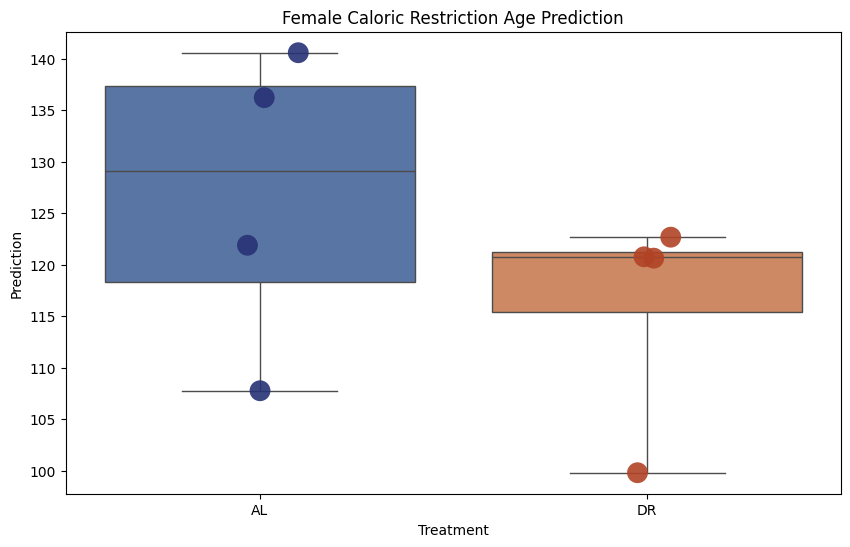

<Figure size 640x480 with 0 Axes>

Components: 2
T-test p-value: 0.29457781568173275
Mann-Whitney U test p-value: 0.34285714285714286
              y_pred treatment
f_AL_L_1  142.591661        AL
f_AL_L_2  122.082485        AL
f_DR_L_1  100.349741        DR
f_DR_L_2  121.864433        DR
f_AL_L_3  108.622187        AL
f_AL_L_4  137.880769        AL
f_DR_L_3  121.520361        DR
f_DR_L_4  123.359614        DR


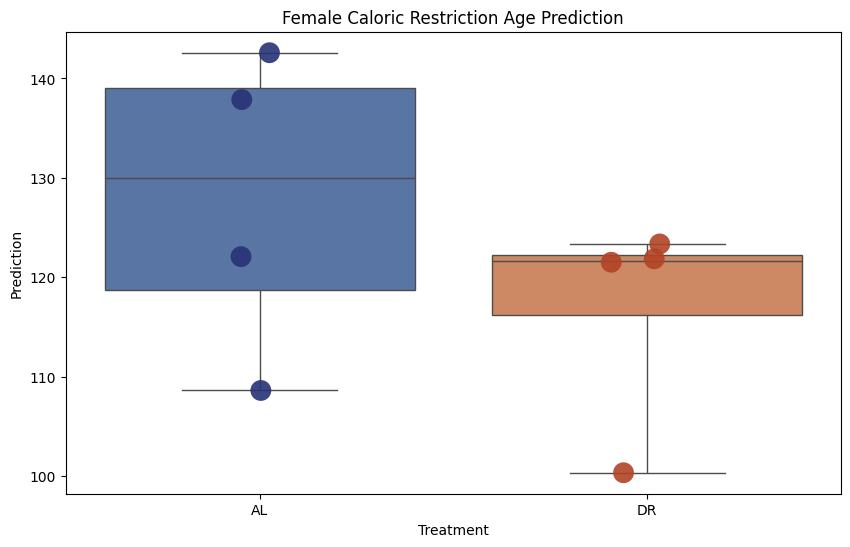

<Figure size 640x480 with 0 Axes>

Components: 3
T-test p-value: 0.33439070013425887
Mann-Whitney U test p-value: 0.6857142857142857
              y_pred treatment
f_AL_L_1  145.180465        AL
f_AL_L_2  123.237382        AL
f_DR_L_1  102.030453        DR
f_DR_L_2  126.558953        DR
f_AL_L_3  110.487959        AL
f_AL_L_4  138.742627        AL
f_DR_L_3  124.225792        DR
f_DR_L_4  123.826496        DR


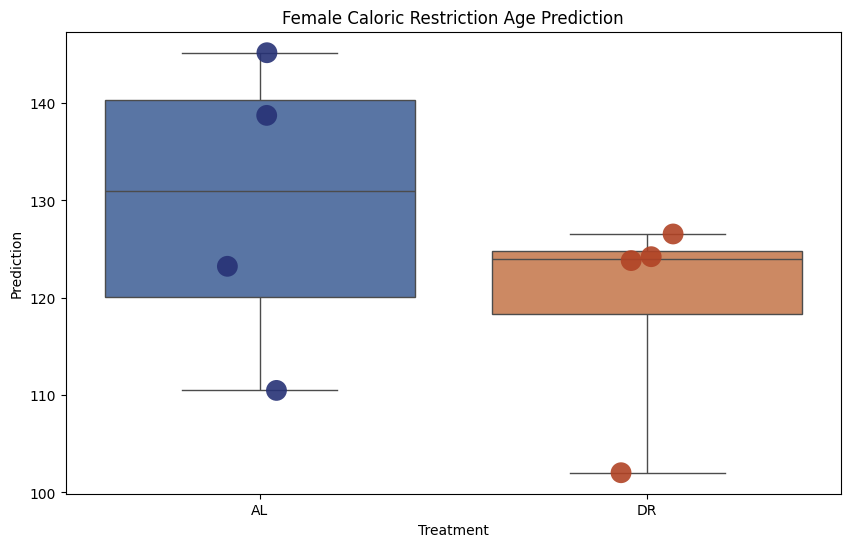

<Figure size 640x480 with 0 Axes>

Components: 4
T-test p-value: 0.3535376260597396
Mann-Whitney U test p-value: 0.4857142857142857
              y_pred treatment
f_AL_L_1  144.916642        AL
f_AL_L_2  123.942850        AL
f_DR_L_1  106.252276        DR
f_DR_L_2  129.752907        DR
f_AL_L_3  112.776163        AL
f_AL_L_4  138.101524        AL
f_DR_L_3  124.441588        DR
f_DR_L_4  123.493505        DR


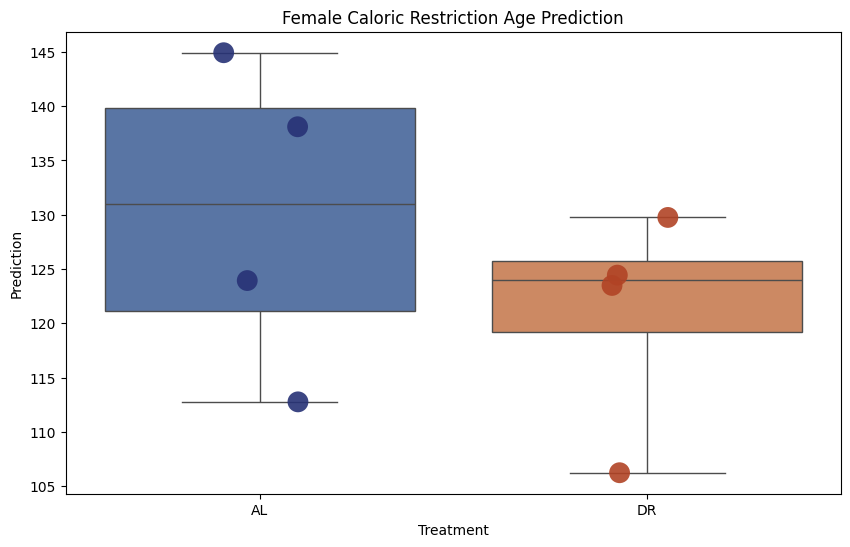

<Figure size 640x480 with 0 Axes>

Components: 5
T-test p-value: 0.765921387936244
Mann-Whitney U test p-value: 0.8857142857142857
              y_pred treatment
f_AL_L_1  143.887757        AL
f_AL_L_2  111.194612        AL
f_DR_L_1  104.423273        DR
f_DR_L_2  131.888200        DR
f_AL_L_3   98.948495        AL
f_AL_L_4  134.729513        AL
f_DR_L_3  119.761234        DR
f_DR_L_4  117.793496        DR


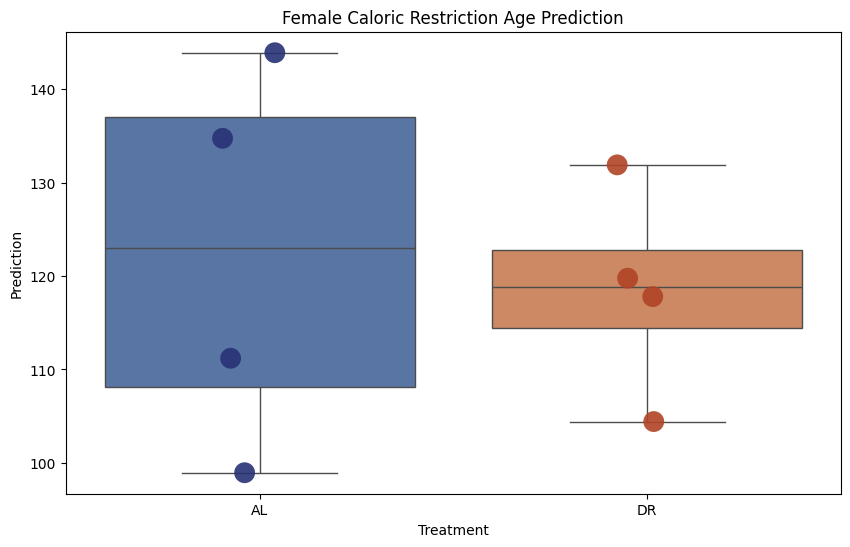

<Figure size 640x480 with 0 Axes>

Components: 6
T-test p-value: 0.6961729036965593
Mann-Whitney U test p-value: 0.8857142857142857
              y_pred treatment
f_AL_L_1  135.077952        AL
f_AL_L_2   99.440880        AL
f_DR_L_1   92.345180        DR
f_DR_L_2  120.136208        DR
f_AL_L_3   88.117829        AL
f_AL_L_4  126.619670        AL
f_DR_L_3  107.128775        DR
f_DR_L_4  108.874999        DR


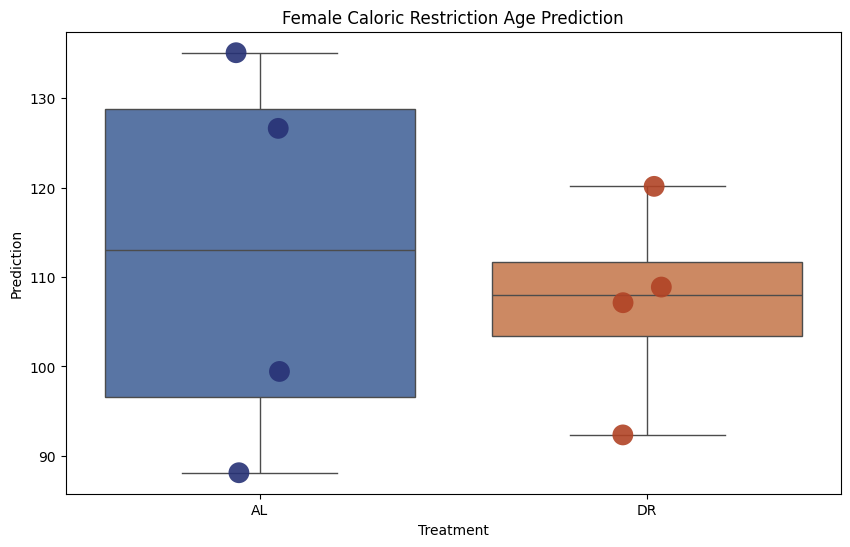

<Figure size 640x480 with 0 Axes>

Components: 7
T-test p-value: 0.6749903310444895
Mann-Whitney U test p-value: 0.8857142857142857
              y_pred treatment
f_AL_L_1  132.755391        AL
f_AL_L_2   95.453561        AL
f_DR_L_1   88.312667        DR
f_DR_L_2  114.430658        DR
f_AL_L_3   86.275184        AL
f_AL_L_4  126.034993        AL
f_DR_L_3  104.721397        DR
f_DR_L_4  110.236981        DR


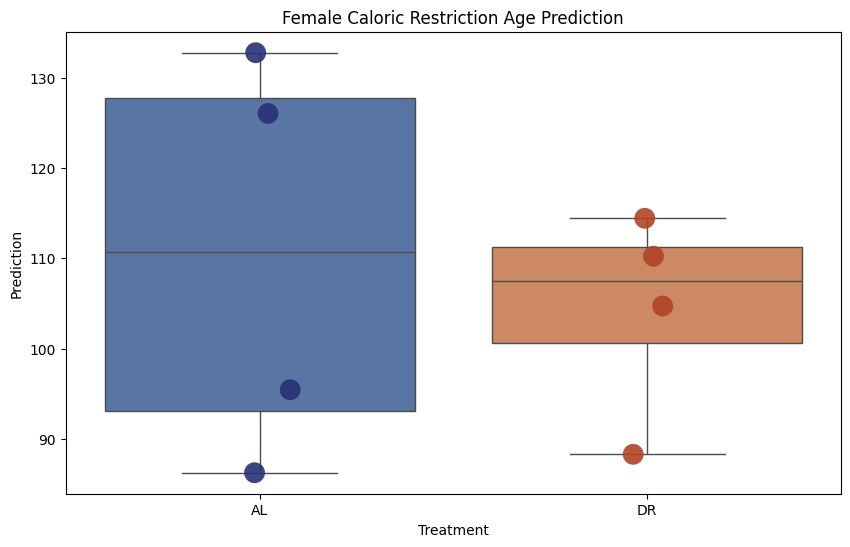

<Figure size 640x480 with 0 Axes>

Components: 8
T-test p-value: 0.6808026430045822
Mann-Whitney U test p-value: 0.8857142857142857
              y_pred treatment
f_AL_L_1  133.716673        AL
f_AL_L_2   96.261395        AL
f_DR_L_1   89.111130        DR
f_DR_L_2  115.427279        DR
f_AL_L_3   87.067386        AL
f_AL_L_4  126.944558        AL
f_DR_L_3  105.645858        DR
f_DR_L_4  111.328711        DR


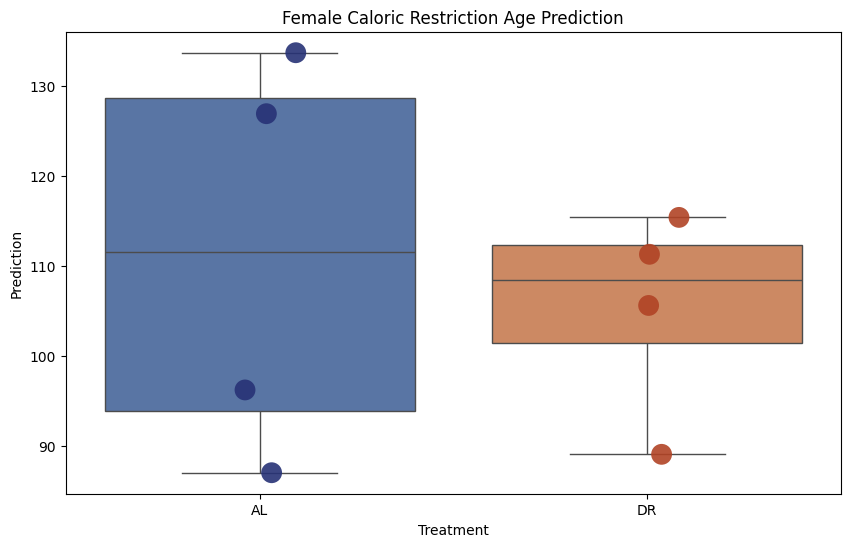

<Figure size 640x480 with 0 Axes>

Components: 9
T-test p-value: 0.6127007596200023
Mann-Whitney U test p-value: 0.8857142857142857
              y_pred treatment
f_AL_L_1  130.956511        AL
f_AL_L_2   92.882769        AL
f_DR_L_1   85.788394        DR
f_DR_L_2  111.490764        DR
f_AL_L_3   84.973797        AL
f_AL_L_4  121.686094        AL
f_DR_L_3  101.340429        DR
f_DR_L_4  104.986329        DR


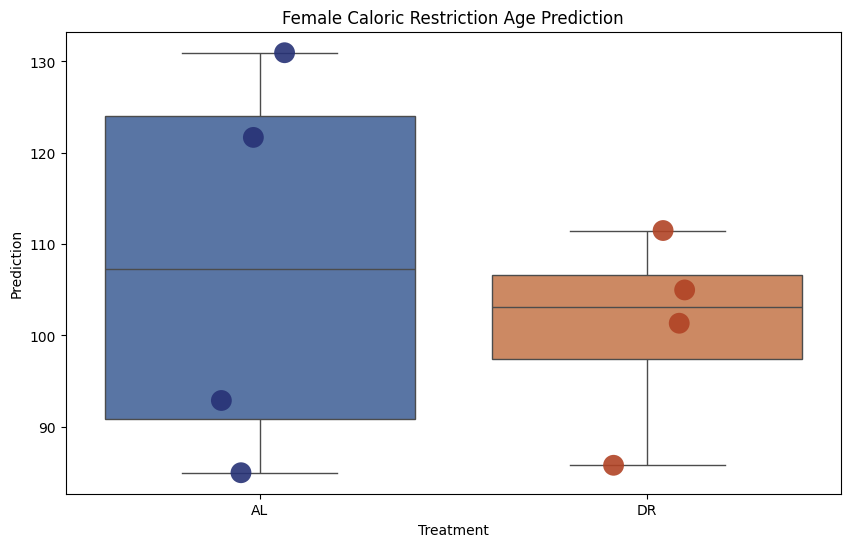

<Figure size 640x480 with 0 Axes>

Components: 10
T-test p-value: 0.5476421816476709
Mann-Whitney U test p-value: 0.6857142857142857
              y_pred treatment
f_AL_L_1  128.979225        AL
f_AL_L_2   92.584139        AL
f_DR_L_1   83.130582        DR
f_DR_L_2  107.644908        DR
f_AL_L_3   84.710859        AL
f_AL_L_4  119.708799        AL
f_DR_L_3  100.554338        DR
f_DR_L_4  103.713925        DR


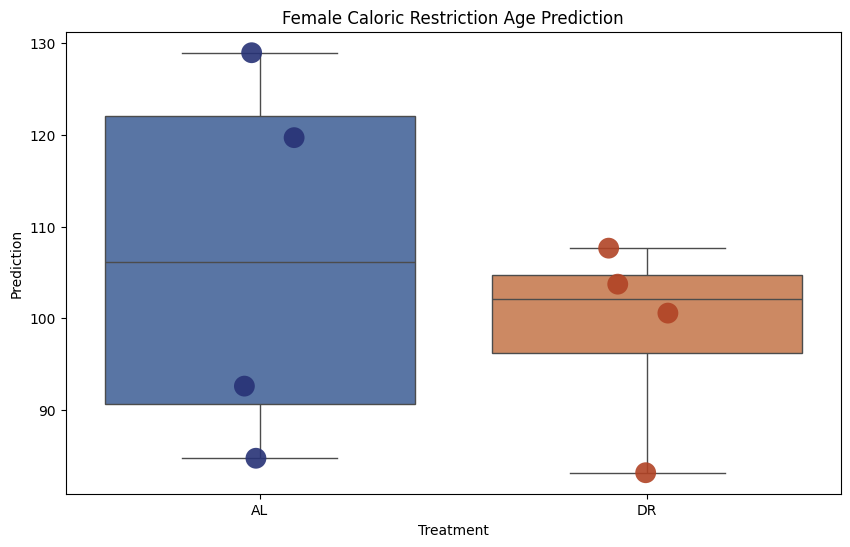

<Figure size 640x480 with 0 Axes>

Components: 11
T-test p-value: 0.5759125178321303
Mann-Whitney U test p-value: 0.6857142857142857
              y_pred treatment
f_AL_L_1  132.848181        AL
f_AL_L_2   96.041027        AL
f_DR_L_1   88.055203        DR
f_DR_L_2  111.351109        DR
f_AL_L_3   88.464302        AL
f_AL_L_4  122.739100        AL
f_DR_L_3  104.735441        DR
f_DR_L_4  107.531581        DR


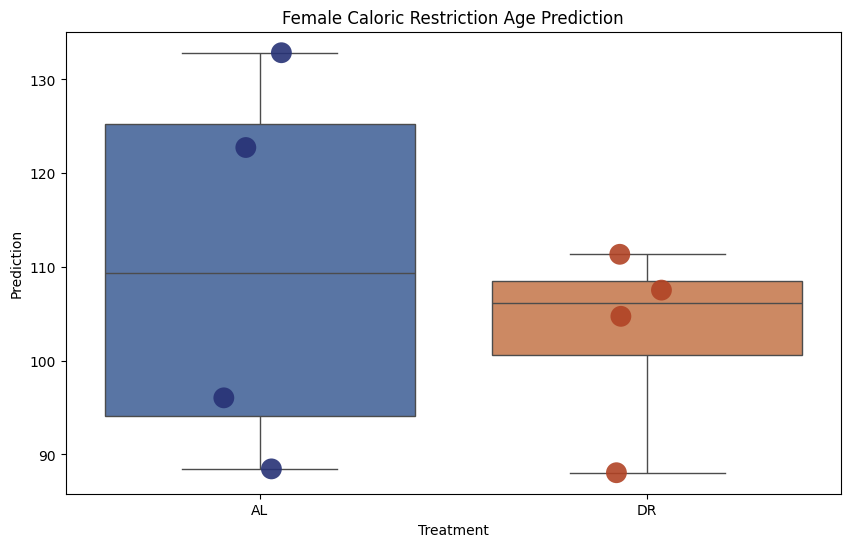

<Figure size 640x480 with 0 Axes>

Components: 12
T-test p-value: 0.5936200617523686
Mann-Whitney U test p-value: 0.8857142857142857
              y_pred treatment
f_AL_L_1  128.549761        AL
f_AL_L_2   92.530075        AL
f_DR_L_1   84.945042        DR
f_DR_L_2  108.502362        DR
f_AL_L_3   84.817044        AL
f_AL_L_4  119.520843        AL
f_DR_L_3  101.140164        DR
f_DR_L_4  103.965613        DR


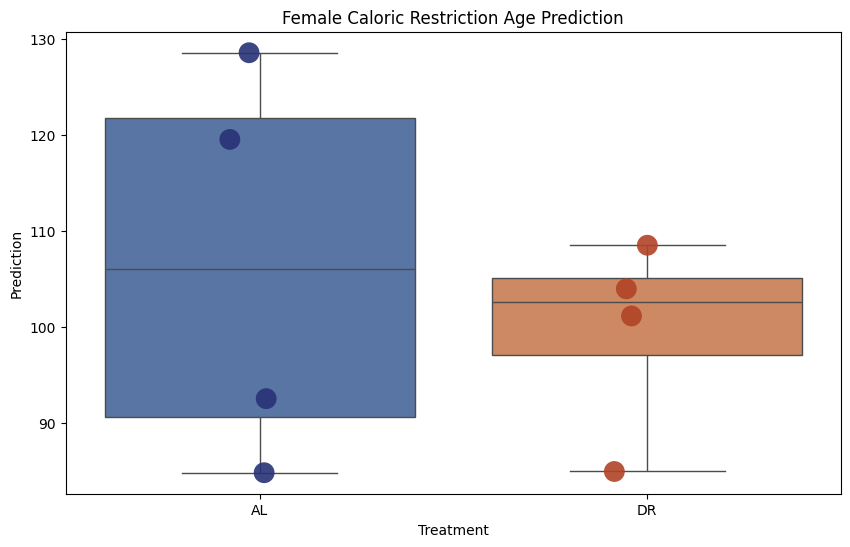

<Figure size 640x480 with 0 Axes>

Components: 13
T-test p-value: 0.5818283937404045
Mann-Whitney U test p-value: 0.6857142857142857
              y_pred treatment
f_AL_L_1  129.561561        AL
f_AL_L_2   96.474240        AL
f_DR_L_1   87.668089        DR
f_DR_L_2  111.010311        DR
f_AL_L_3   89.023537        AL
f_AL_L_4  120.732284        AL
f_DR_L_3  103.960670        DR
f_DR_L_4  107.267051        DR


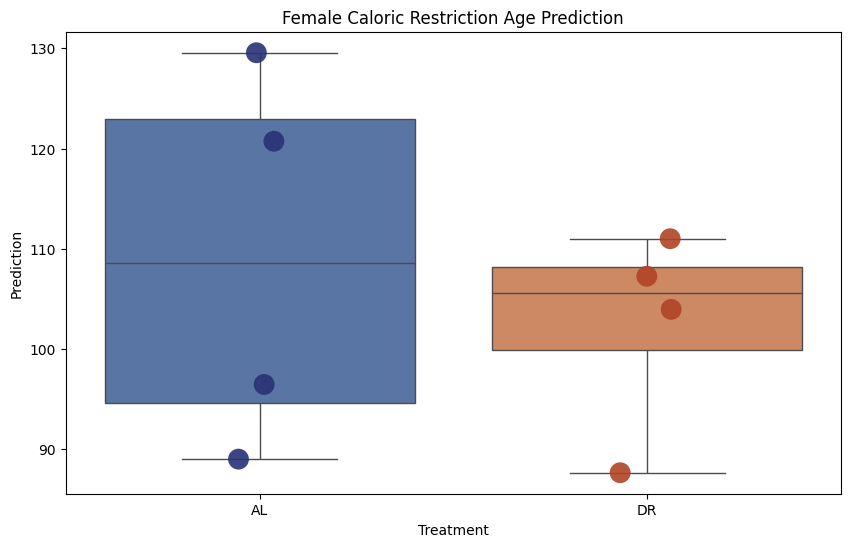

<Figure size 640x480 with 0 Axes>

Components: 14
T-test p-value: 0.5582804666040961
Mann-Whitney U test p-value: 0.6857142857142857
              y_pred treatment
f_AL_L_1  129.748247        AL
f_AL_L_2   96.139495        AL
f_DR_L_1   87.113941        DR
f_DR_L_2  110.666157        DR
f_AL_L_3   89.074994        AL
f_AL_L_4  121.727509        AL
f_DR_L_3  103.741577        DR
f_DR_L_4  107.133768        DR


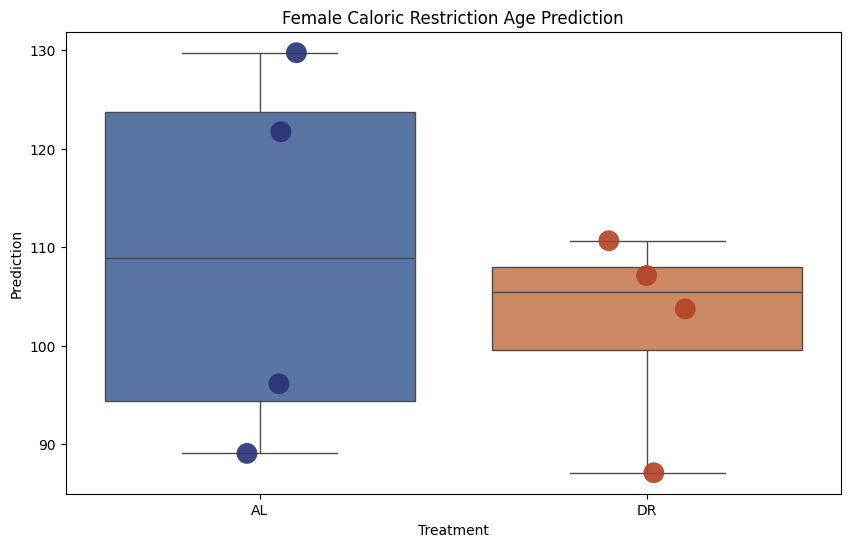

<Figure size 640x480 with 0 Axes>

Components: 15
T-test p-value: 0.5768866342495311
Mann-Whitney U test p-value: 0.6857142857142857
              y_pred treatment
f_AL_L_1  129.149062        AL
f_AL_L_2   95.199988        AL
f_DR_L_1   86.863996        DR
f_DR_L_2  110.411429        DR
f_AL_L_3   88.817353        AL
f_AL_L_4  121.514470        AL
f_DR_L_3  103.575063        DR
f_DR_L_4  107.095393        DR


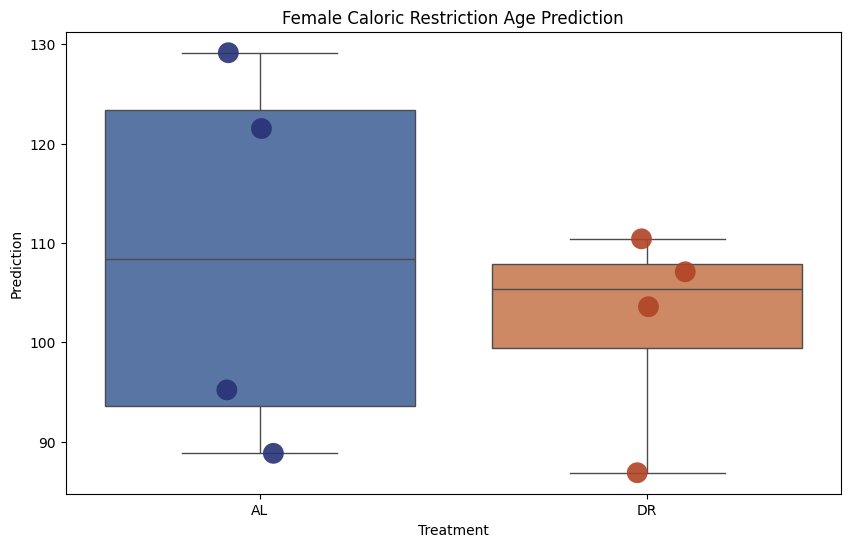

<Figure size 640x480 with 0 Axes>

Components: 16
T-test p-value: 0.5757472964752233
Mann-Whitney U test p-value: 0.6857142857142857
              y_pred treatment
f_AL_L_1  129.143275        AL
f_AL_L_2   95.196358        AL
f_DR_L_1   86.780601        DR
f_DR_L_2  110.495133        DR
f_AL_L_3   88.809726        AL
f_AL_L_4  121.592884        AL
f_DR_L_3  103.539598        DR
f_DR_L_4  107.062816        DR


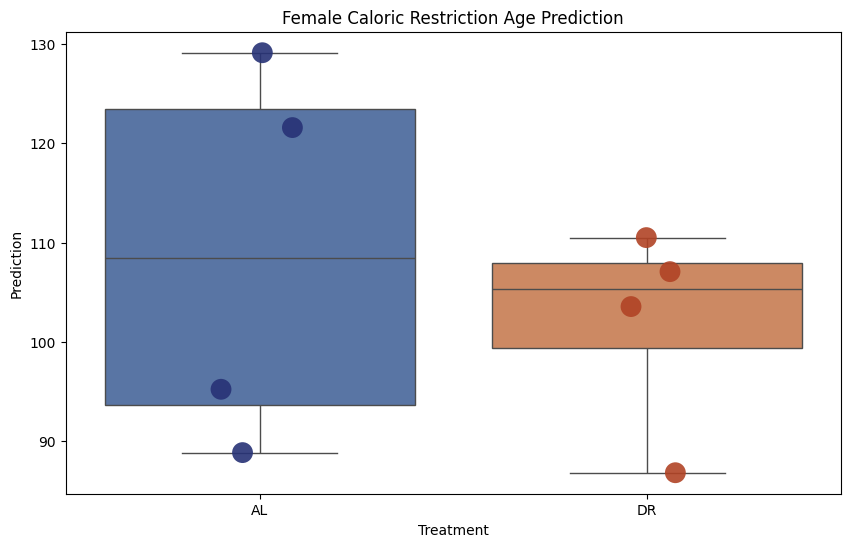

<Figure size 640x480 with 0 Axes>

Components: 17
T-test p-value: 0.577574768323323
Mann-Whitney U test p-value: 0.6857142857142857
              y_pred treatment
f_AL_L_1  128.627653        AL
f_AL_L_2   94.943823        AL
f_DR_L_1   87.001481        DR
f_DR_L_2  109.900646        DR
f_AL_L_3   88.678630        AL
f_AL_L_4  121.125800        AL
f_DR_L_3  103.335792        DR
f_DR_L_4  106.753905        DR


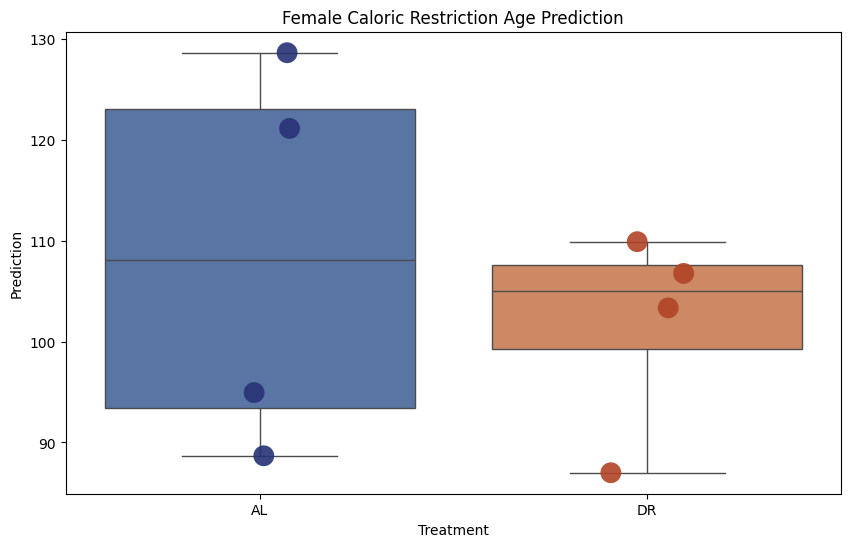

<Figure size 640x480 with 0 Axes>

Components: 18
T-test p-value: 0.5705025411323759
Mann-Whitney U test p-value: 0.6857142857142857
              y_pred treatment
f_AL_L_1  128.380431        AL
f_AL_L_2   94.729988        AL
f_DR_L_1   86.833911        DR
f_DR_L_2  109.482185        DR
f_AL_L_3   88.614479        AL
f_AL_L_4  120.809184        AL
f_DR_L_3  103.077049        DR
f_DR_L_4  106.388931        DR


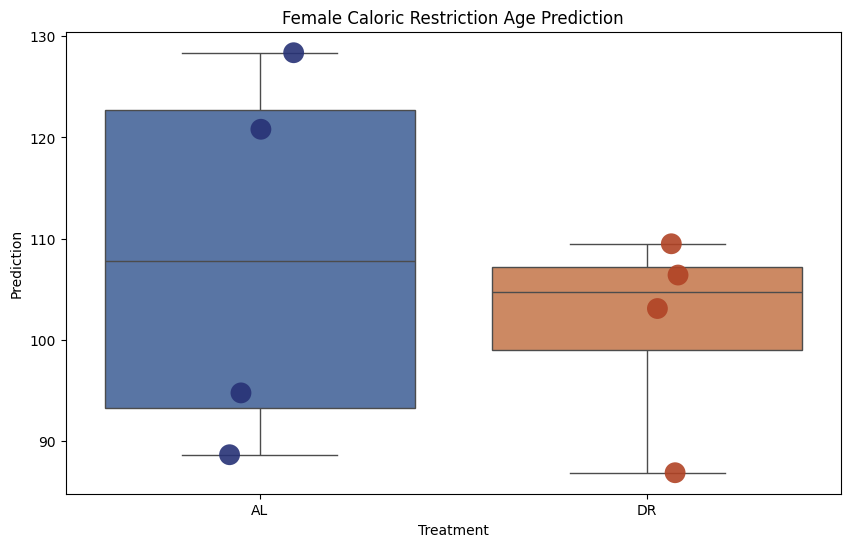

<Figure size 640x480 with 0 Axes>

Components: 19
T-test p-value: 0.537637189183501
Mann-Whitney U test p-value: 0.6857142857142857
              y_pred treatment
f_AL_L_1  126.580158        AL
f_AL_L_2   94.657522        AL
f_DR_L_1   87.925344        DR
f_DR_L_2  107.731611        DR
f_AL_L_3   88.605034        AL
f_AL_L_4  120.017774        AL
f_DR_L_3  101.537174        DR
f_DR_L_4  105.063478        DR


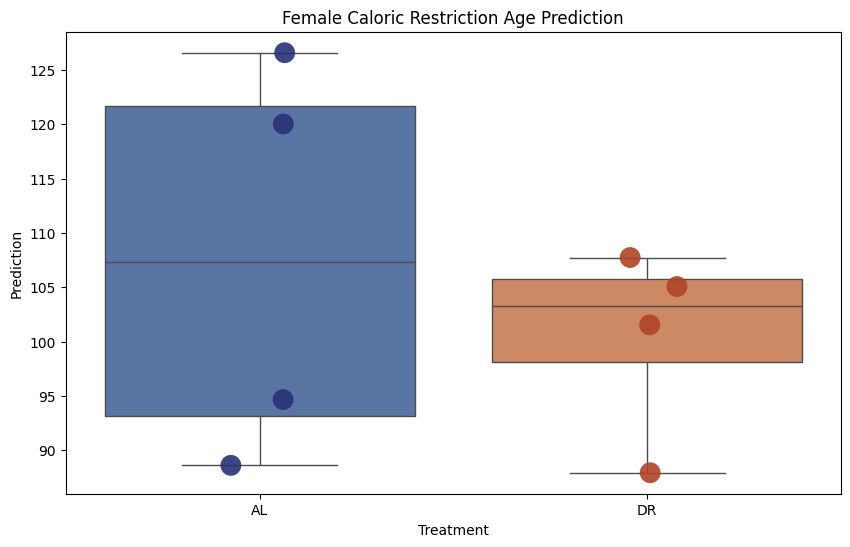

<Figure size 640x480 with 0 Axes>

Components: 20
T-test p-value: 0.5429002071631516
Mann-Whitney U test p-value: 0.6857142857142857
              y_pred treatment
f_AL_L_1  125.264143        AL
f_AL_L_2   94.049527        AL
f_DR_L_1   87.702852        DR
f_DR_L_2  107.115688        DR
f_AL_L_3   88.155223        AL
f_AL_L_4  119.262140        AL
f_DR_L_3  100.765738        DR
f_DR_L_4  104.414565        DR


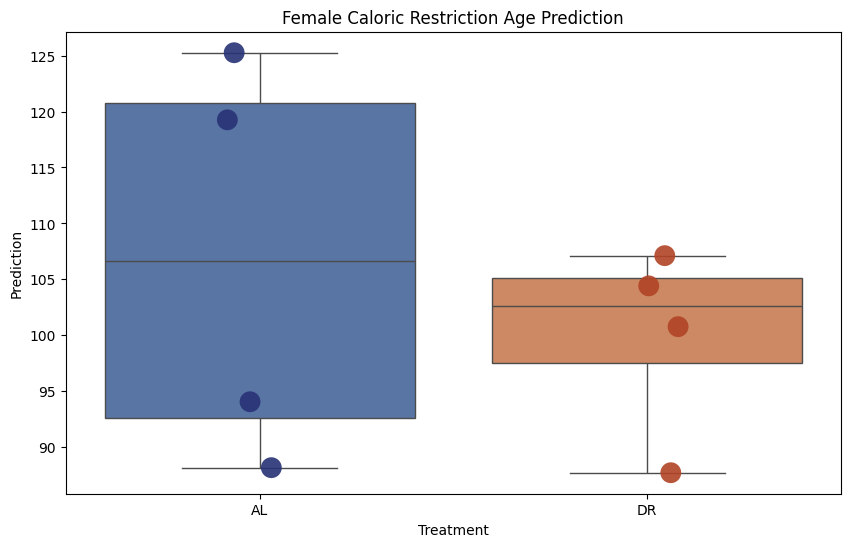

<Figure size 640x480 with 0 Axes>

Components: 21
T-test p-value: 0.5609900391978109
Mann-Whitney U test p-value: 0.8857142857142857
              y_pred treatment
f_AL_L_1  125.807814        AL
f_AL_L_2   92.715796        AL
f_DR_L_1   87.836070        DR
f_DR_L_2  107.758903        DR
f_AL_L_3   87.153659        AL
f_AL_L_4  119.101910        AL
f_DR_L_3   99.872152        DR
f_DR_L_4  102.909726        DR


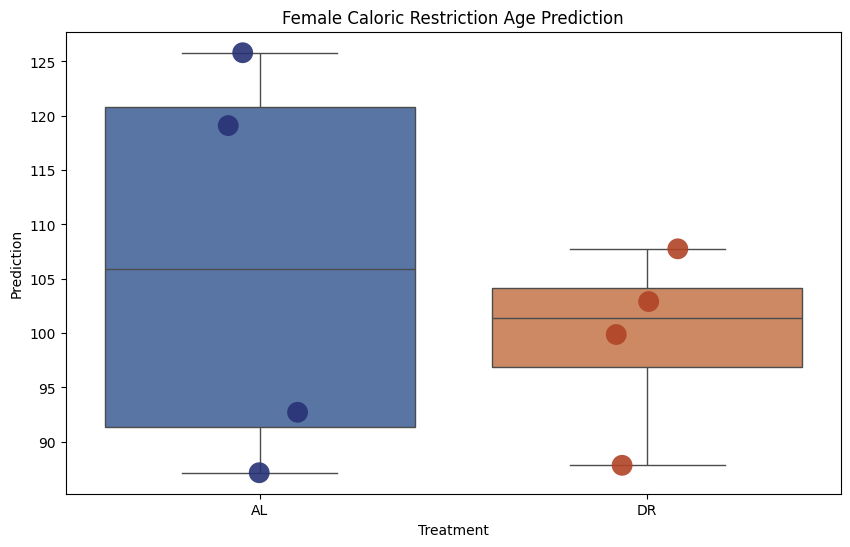

<Figure size 640x480 with 0 Axes>

Components: 22
T-test p-value: 0.5782388966479342
Mann-Whitney U test p-value: 0.8857142857142857
              y_pred treatment
f_AL_L_1  125.082371        AL
f_AL_L_2   91.766530        AL
f_DR_L_1   87.803871        DR
f_DR_L_2  107.189259        DR
f_AL_L_3   86.246233        AL
f_AL_L_4  118.326479        AL
f_DR_L_3   98.885170        DR
f_DR_L_4  102.315927        DR


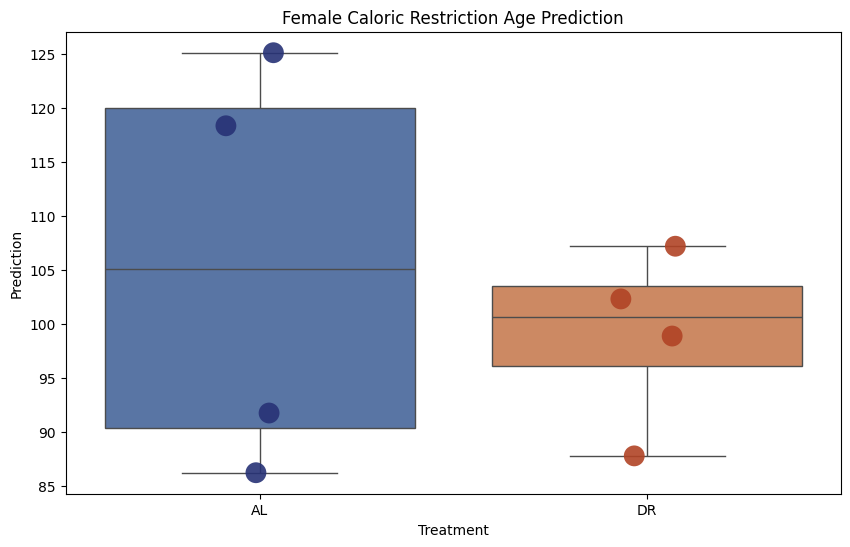

<Figure size 640x480 with 0 Axes>

Components: 23
T-test p-value: 0.5782388966479329
Mann-Whitney U test p-value: 0.8857142857142857
              y_pred treatment
f_AL_L_1  125.082371        AL
f_AL_L_2   91.766530        AL
f_DR_L_1   87.803871        DR
f_DR_L_2  107.189259        DR
f_AL_L_3   86.246233        AL
f_AL_L_4  118.326479        AL
f_DR_L_3   98.885170        DR
f_DR_L_4  102.315927        DR


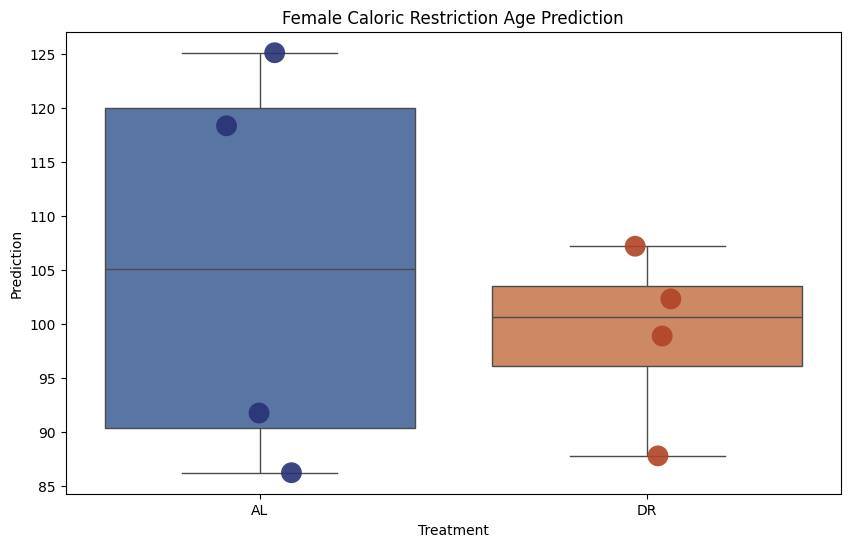

<Figure size 640x480 with 0 Axes>

In [ ]:
# Loop through all possible components to predict the test set
max_components = min(X_train_scaled.shape[0], X_train_scaled.shape[1])
all_y_test_preds = []

for n_components in range(1, max_components + 1):
    print(f"Components: {n_components}")

    # Apply PCA
    pca = PCA(n_components=n_components, random_state=1)
    X_train_pca = pca.fit_transform(X_train_scaled)
    X_test_pca = pca.transform(X_test_scaled)

    # Train the model
    regressor = LinearRegression()
    regressor.fit(X_train_pca, age_train)

    # Predict on the test set
    y_test_pred = regressor.predict(X_test_pca)

    # Save the actual and predicted values to a DataFrame
    results_df = pd.DataFrame({
    'y_pred': y_test_pred
    }, index=df_cr_age_liver_female_norm_common_without_age.index.tolist())

    #print(results_df)
    df_cr = results_df.loc[df_cr_age_liver_female.index.tolist(), ]

    df_cr.head(5)

    df_cr["treatment"] = df_cr_age_liver["treatment"]

    df_cr.head(5)

    # Ensure predictions are numeric
    pred_al = pd.to_numeric(df_cr[df_cr['treatment'] == "AL"]['y_pred'], errors='coerce')
    pred_dr = pd.to_numeric(df_cr[df_cr['treatment'] == "DR"]['y_pred'], errors='coerce')

    # Drop any NaN values if necessary
    pred_al = pred_al.dropna()
    pred_dr = pred_dr.dropna()

    # Perform t-test
    t_stat, p_ttest = ttest_ind(pred_al, pred_dr, equal_var=False)  # Welch's t-test for unequal variances

    # Perform Mann-Whitney U test
    u_stat, p_mwu = mannwhitneyu(pred_al, pred_dr, alternative='two-sided')

    # Print results
    print(f"T-test p-value: {p_ttest}")
    print(f"Mann-Whitney U test p-value: {p_mwu}")

    # Filter the DataFrame to include only rows where true_age is 105
    filtered_df_al = df_cr[df_cr['treatment'] == "AL"]
    filtered_df_dr = df_cr[df_cr['treatment'] == "DR"]

    # Display the filtered DataFrame
    #print(filtered_df_al)
    print(df_cr)

    # Create the box plot
    plt.figure(figsize=(10, 6))
    box = sns.boxplot(x='treatment', y='y_pred', hue='treatment', data=df_cr, palette='deep', showfliers = False, whis = [0,100])

# Add data points
#strip = sns.stripplot(x='feed', y='prediction', hue='feed', data=liver_male_age_predictions_young_het,
#                      palette='deep', dodge=True, alpha=0.9, jitter=True, size=15)# Example of custom colors for each feed category

    #custom_palette = ['#FF6347', '#4682B4', '#32CD32', '#FFD700']  # Use desired hex color codes
    custom_palette = ['#273276', '#B14325']  # Use desired hex color codes


    # Add data points with custom colors
    strip = sns.stripplot(
        x='treatment',
        y='y_pred',
        hue='treatment',
        data=df_cr,
        palette=custom_palette,  # Custom color palette
        dodge=False,
        alpha=0.9,
        jitter=True,
        size=15
    )

    # Remove the legend if not needed
    #strip.legend_.remove()

    # Customize the plot
    plt.title('Female Caloric Restriction Age Prediction')
    plt.xlabel('Treatment')
    plt.ylabel('Prediction')

    # Remove the grid
    plt.grid(False)

    # Show the plot
    plt.show()

    all_y_test_preds.append({
        'n_components': n_components,
        'y_test_pred': y_test_pred
    })

    # Optionally, print the predictions for each number of components
    #print(f"Components: {n_components}, Predictions: {y_test_pred}")

    out_file_name = f"liver_female_PCR_cr_n_components_{n_components}.svg"
    out_path = os.path.join("./outputs/pc_regression/", out_file_name)
    plt.savefig(out_path, dpi=300, bbox_inches="tight")

    # Show the plot
    plt.show()

    all_y_test_preds.append({
        'n_components': n_components,
        'y_test_pred': y_test_pred
    })

    # Optionally, print the predictions for each number of components
    #print(f"Components: {n_components}, Predictions: {y_test_pred}")

    # Save the DataFrame to a CSV file
    output_path = './outputs/pc_regression/'
    pc_num = "".join([str(n_components), "pcs"])
    out_file_prefix = 'ALDR_female_PCregression_pred'
    out_file_name = "_".join([out_file_prefix, pc_num])
    df_cr.to_csv(os.path.join(output_path, out_file_name), sep="\t")

# Convert predictions to a structured format if needed
# For example, save to a DataFrame or analyze further

#####  Fig 5F (F) PC-R: Median adjusted

Components: 1
T-test p-value: 0.29534049179607974
Mann-Whitney U test p-value: 0.34285714285714286
              y_pred treatment
f_AL_L_1  140.581781        AL
f_AL_L_2  121.881527        AL
f_DR_L_1   99.787566        DR
f_DR_L_2  120.627702        DR
f_AL_L_3  107.750792        AL
f_AL_L_4  136.218766        AL
f_DR_L_3  120.760205        DR
f_DR_L_4  122.665102        DR
129.0501468179372
              y_pred treatment  prediction_adjust
f_AL_L_1  140.581781        AL          11.531634
f_AL_L_2  121.881527        AL          -7.168619
f_DR_L_1   99.787566        DR         -29.262581
f_DR_L_2  120.627702        DR          -8.422445
f_AL_L_3  107.750792        AL         -21.299354
f_AL_L_4  136.218766        AL           7.168619
f_DR_L_3  120.760205        DR          -8.289942
f_DR_L_4  122.665102        DR          -6.385045


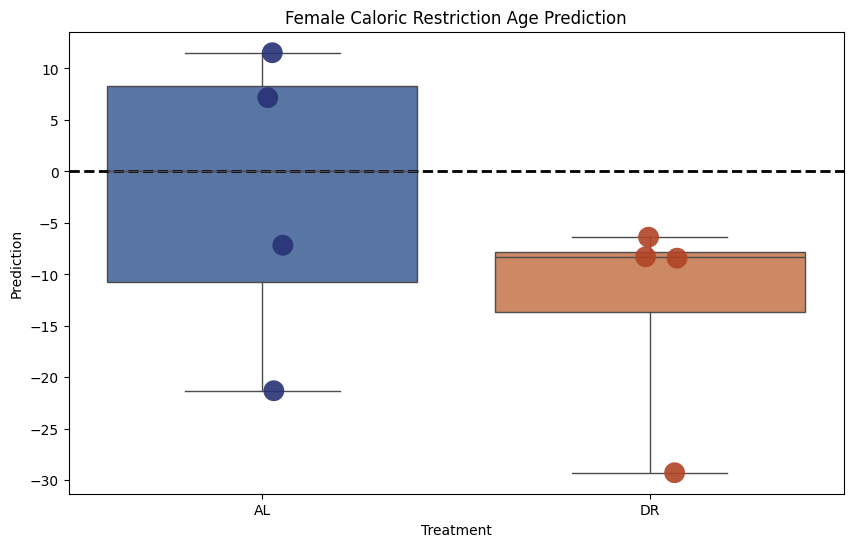

Components: 2
T-test p-value: 0.29457781568173275
Mann-Whitney U test p-value: 0.34285714285714286
              y_pred treatment
f_AL_L_1  142.591661        AL
f_AL_L_2  122.082485        AL
f_DR_L_1  100.349741        DR
f_DR_L_2  121.864433        DR
f_AL_L_3  108.622187        AL
f_AL_L_4  137.880769        AL
f_DR_L_3  121.520361        DR
f_DR_L_4  123.359614        DR
129.98162693360072
              y_pred treatment  prediction_adjust
f_AL_L_1  142.591661        AL          12.610034
f_AL_L_2  122.082485        AL          -7.899142
f_DR_L_1  100.349741        DR         -29.631886
f_DR_L_2  121.864433        DR          -8.117194
f_AL_L_3  108.622187        AL         -21.359440
f_AL_L_4  137.880769        AL           7.899142
f_DR_L_3  121.520361        DR          -8.461265
f_DR_L_4  123.359614        DR          -6.622013


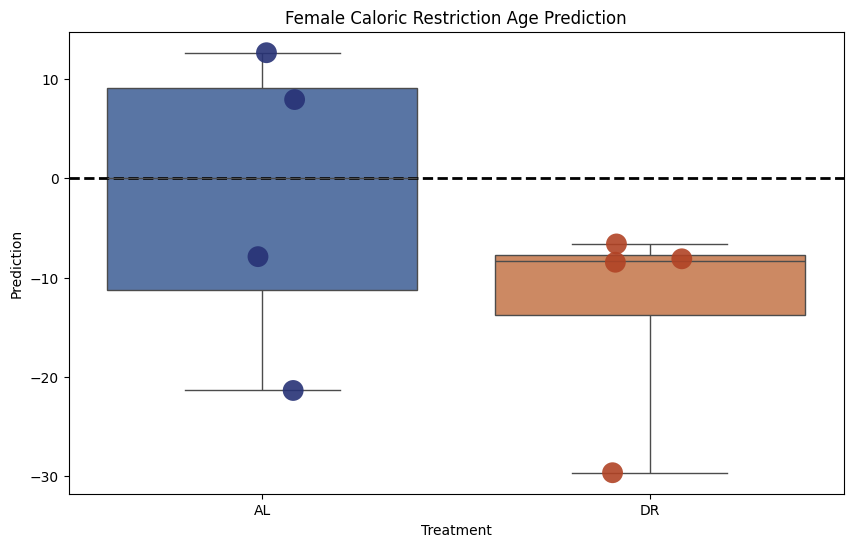

Components: 3
T-test p-value: 0.33439070013425887
Mann-Whitney U test p-value: 0.6857142857142857
              y_pred treatment
f_AL_L_1  145.180465        AL
f_AL_L_2  123.237382        AL
f_DR_L_1  102.030453        DR
f_DR_L_2  126.558953        DR
f_AL_L_3  110.487959        AL
f_AL_L_4  138.742627        AL
f_DR_L_3  124.225792        DR
f_DR_L_4  123.826496        DR
130.99000424979369
              y_pred treatment  prediction_adjust
f_AL_L_1  145.180465        AL          14.190461
f_AL_L_2  123.237382        AL          -7.752622
f_DR_L_1  102.030453        DR         -28.959551
f_DR_L_2  126.558953        DR          -4.431051
f_AL_L_3  110.487959        AL         -20.502045
f_AL_L_4  138.742627        AL           7.752622
f_DR_L_3  124.225792        DR          -6.764213
f_DR_L_4  123.826496        DR          -7.163508


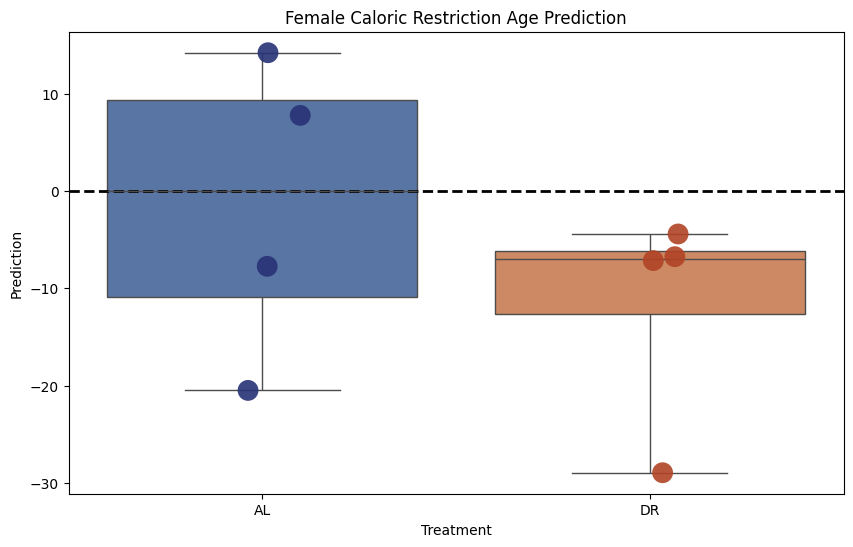

Components: 4
T-test p-value: 0.3535376260597396
Mann-Whitney U test p-value: 0.4857142857142857
              y_pred treatment
f_AL_L_1  144.916642        AL
f_AL_L_2  123.942850        AL
f_DR_L_1  106.252276        DR
f_DR_L_2  129.752907        DR
f_AL_L_3  112.776163        AL
f_AL_L_4  138.101524        AL
f_DR_L_3  124.441588        DR
f_DR_L_4  123.493505        DR
131.02218661905303
              y_pred treatment  prediction_adjust
f_AL_L_1  144.916642        AL          13.894456
f_AL_L_2  123.942850        AL          -7.079337
f_DR_L_1  106.252276        DR         -24.769911
f_DR_L_2  129.752907        DR          -1.269279
f_AL_L_3  112.776163        AL         -18.246024
f_AL_L_4  138.101524        AL           7.079337
f_DR_L_3  124.441588        DR          -6.580599
f_DR_L_4  123.493505        DR          -7.528682


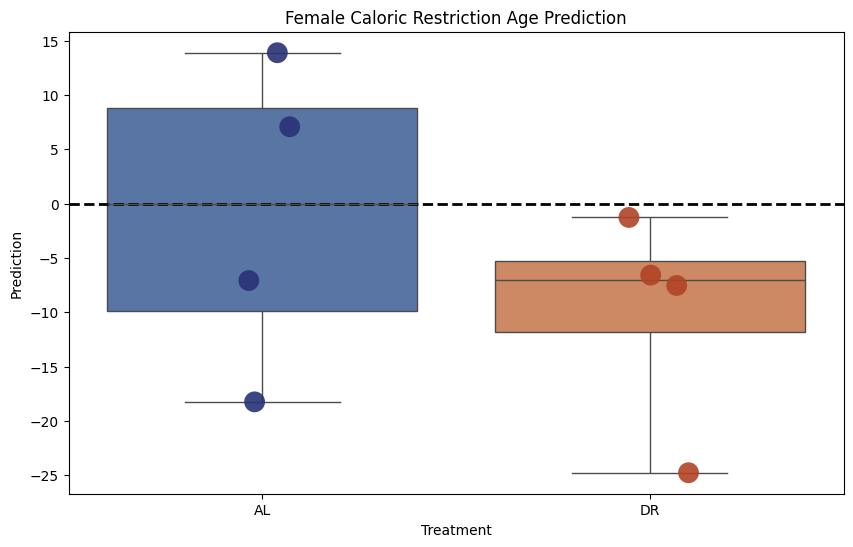

Components: 5
T-test p-value: 0.765921387936244
Mann-Whitney U test p-value: 0.8857142857142857
              y_pred treatment
f_AL_L_1  143.887757        AL
f_AL_L_2  111.194612        AL
f_DR_L_1  104.423273        DR
f_DR_L_2  131.888200        DR
f_AL_L_3   98.948495        AL
f_AL_L_4  134.729513        AL
f_DR_L_3  119.761234        DR
f_DR_L_4  117.793496        DR
122.96206238783302
              y_pred treatment  prediction_adjust
f_AL_L_1  143.887757        AL          20.925694
f_AL_L_2  111.194612        AL         -11.767451
f_DR_L_1  104.423273        DR         -18.538789
f_DR_L_2  131.888200        DR           8.926138
f_AL_L_3   98.948495        AL         -24.013567
f_AL_L_4  134.729513        AL          11.767451
f_DR_L_3  119.761234        DR          -3.200829
f_DR_L_4  117.793496        DR          -5.168566


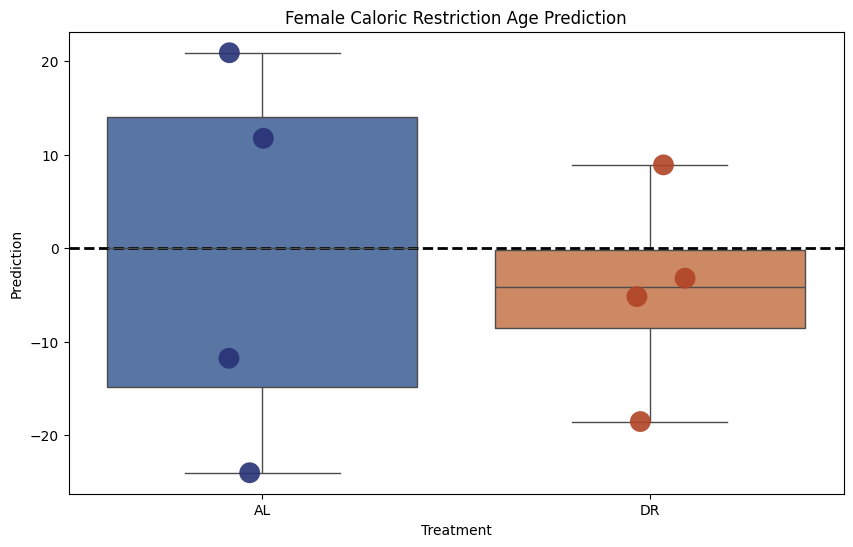

Components: 6
T-test p-value: 0.6961729036965593
Mann-Whitney U test p-value: 0.8857142857142857
              y_pred treatment
f_AL_L_1  135.077952        AL
f_AL_L_2   99.440880        AL
f_DR_L_1   92.345180        DR
f_DR_L_2  120.136208        DR
f_AL_L_3   88.117829        AL
f_AL_L_4  126.619670        AL
f_DR_L_3  107.128775        DR
f_DR_L_4  108.874999        DR
113.03027482744585
              y_pred treatment  prediction_adjust
f_AL_L_1  135.077952        AL          22.047677
f_AL_L_2   99.440880        AL         -13.589395
f_DR_L_1   92.345180        DR         -20.685095
f_DR_L_2  120.136208        DR           7.105934
f_AL_L_3   88.117829        AL         -24.912446
f_AL_L_4  126.619670        AL          13.589395
f_DR_L_3  107.128775        DR          -5.901499
f_DR_L_4  108.874999        DR          -4.155276


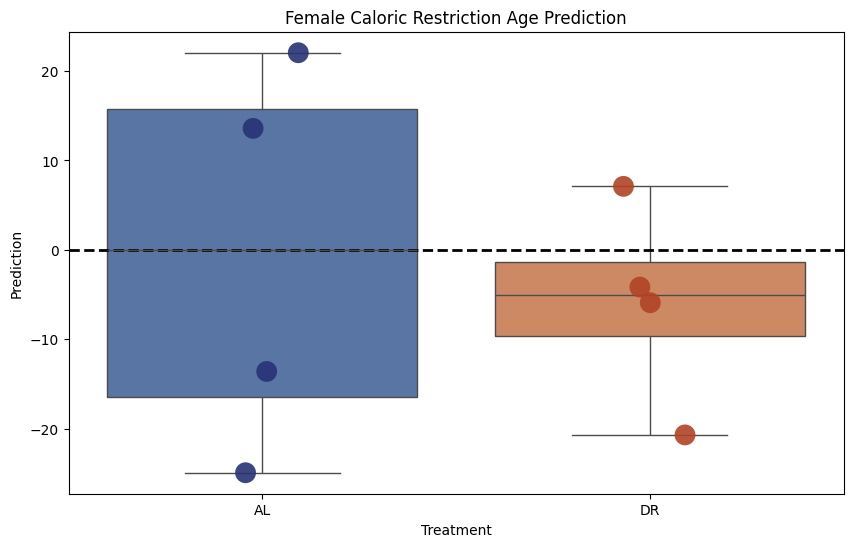

Components: 7
T-test p-value: 0.6749903310444895
Mann-Whitney U test p-value: 0.8857142857142857
              y_pred treatment
f_AL_L_1  132.755391        AL
f_AL_L_2   95.453561        AL
f_DR_L_1   88.312667        DR
f_DR_L_2  114.430658        DR
f_AL_L_3   86.275184        AL
f_AL_L_4  126.034993        AL
f_DR_L_3  104.721397        DR
f_DR_L_4  110.236981        DR
110.74427696850438
              y_pred treatment  prediction_adjust
f_AL_L_1  132.755391        AL          22.011114
f_AL_L_2   95.453561        AL         -15.290716
f_DR_L_1   88.312667        DR         -22.431610
f_DR_L_2  114.430658        DR           3.686381
f_AL_L_3   86.275184        AL         -24.469093
f_AL_L_4  126.034993        AL          15.290716
f_DR_L_3  104.721397        DR          -6.022880
f_DR_L_4  110.236981        DR          -0.507295


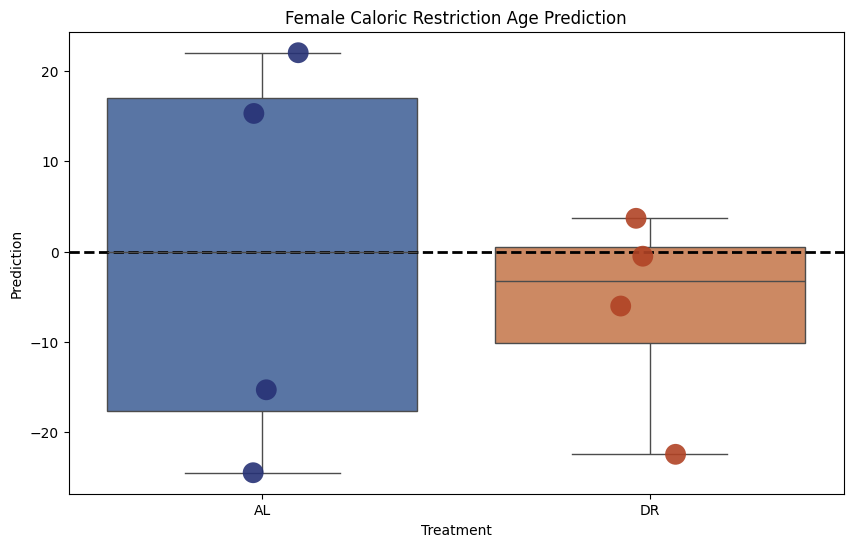

Components: 8
T-test p-value: 0.6808026430045822
Mann-Whitney U test p-value: 0.8857142857142857
              y_pred treatment
f_AL_L_1  133.716673        AL
f_AL_L_2   96.261395        AL
f_DR_L_1   89.111130        DR
f_DR_L_2  115.427279        DR
f_AL_L_3   87.067386        AL
f_AL_L_4  126.944558        AL
f_DR_L_3  105.645858        DR
f_DR_L_4  111.328711        DR
111.60297648897374
              y_pred treatment  prediction_adjust
f_AL_L_1  133.716673        AL          22.113697
f_AL_L_2   96.261395        AL         -15.341582
f_DR_L_1   89.111130        DR         -22.491847
f_DR_L_2  115.427279        DR           3.824302
f_AL_L_3   87.067386        AL         -24.535590
f_AL_L_4  126.944558        AL          15.341582
f_DR_L_3  105.645858        DR          -5.957119
f_DR_L_4  111.328711        DR          -0.274266


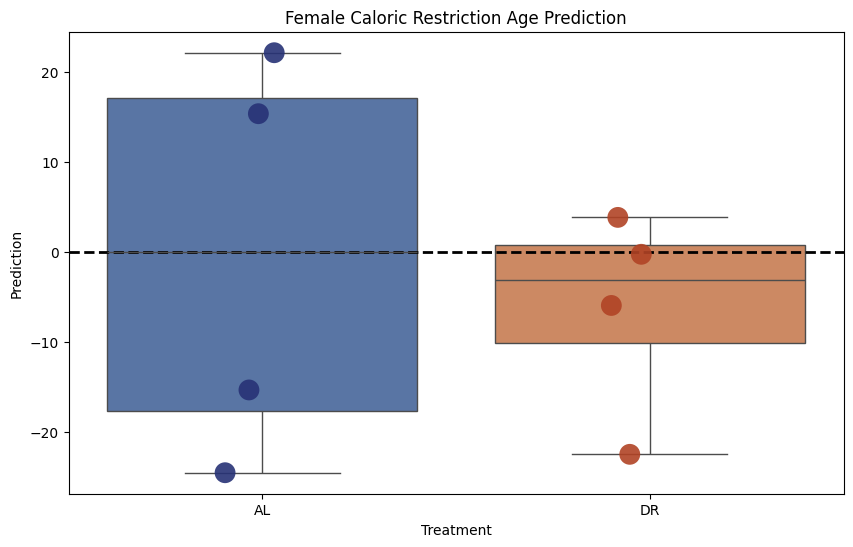

Components: 9
T-test p-value: 0.6127007596200023
Mann-Whitney U test p-value: 0.8857142857142857
              y_pred treatment
f_AL_L_1  130.956511        AL
f_AL_L_2   92.882769        AL
f_DR_L_1   85.788394        DR
f_DR_L_2  111.490764        DR
f_AL_L_3   84.973797        AL
f_AL_L_4  121.686094        AL
f_DR_L_3  101.340429        DR
f_DR_L_4  104.986329        DR
107.28443182926691
              y_pred treatment  prediction_adjust
f_AL_L_1  130.956511        AL          23.672079
f_AL_L_2   92.882769        AL         -14.401663
f_DR_L_1   85.788394        DR         -21.496037
f_DR_L_2  111.490764        DR           4.206332
f_AL_L_3   84.973797        AL         -22.310635
f_AL_L_4  121.686094        AL          14.401663
f_DR_L_3  101.340429        DR          -5.944002
f_DR_L_4  104.986329        DR          -2.298102


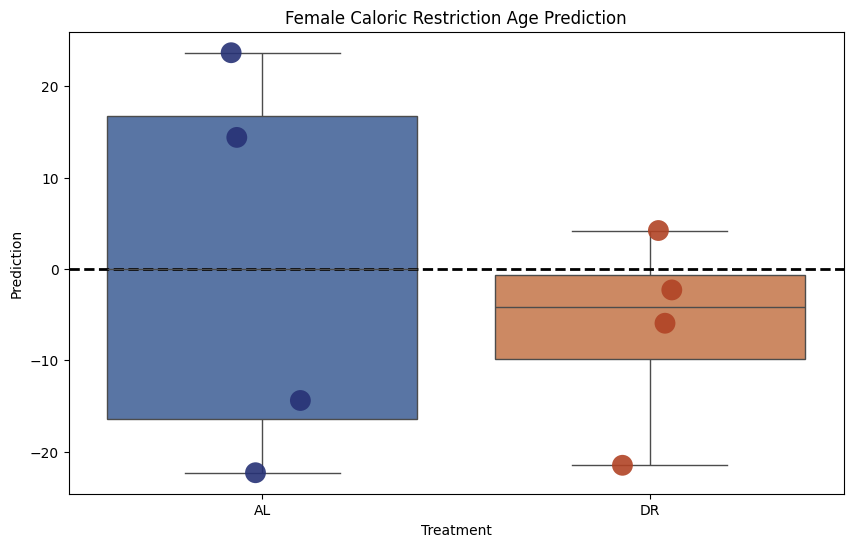

Components: 10
T-test p-value: 0.5476421816476709
Mann-Whitney U test p-value: 0.6857142857142857
              y_pred treatment
f_AL_L_1  128.979225        AL
f_AL_L_2   92.584139        AL
f_DR_L_1   83.130582        DR
f_DR_L_2  107.644908        DR
f_AL_L_3   84.710859        AL
f_AL_L_4  119.708799        AL
f_DR_L_3  100.554338        DR
f_DR_L_4  103.713925        DR
106.14646930139907
              y_pred treatment  prediction_adjust
f_AL_L_1  128.979225        AL          22.832756
f_AL_L_2   92.584139        AL         -13.562330
f_DR_L_1   83.130582        DR         -23.015887
f_DR_L_2  107.644908        DR           1.498438
f_AL_L_3   84.710859        AL         -21.435610
f_AL_L_4  119.708799        AL          13.562330
f_DR_L_3  100.554338        DR          -5.592131
f_DR_L_4  103.713925        DR          -2.432545


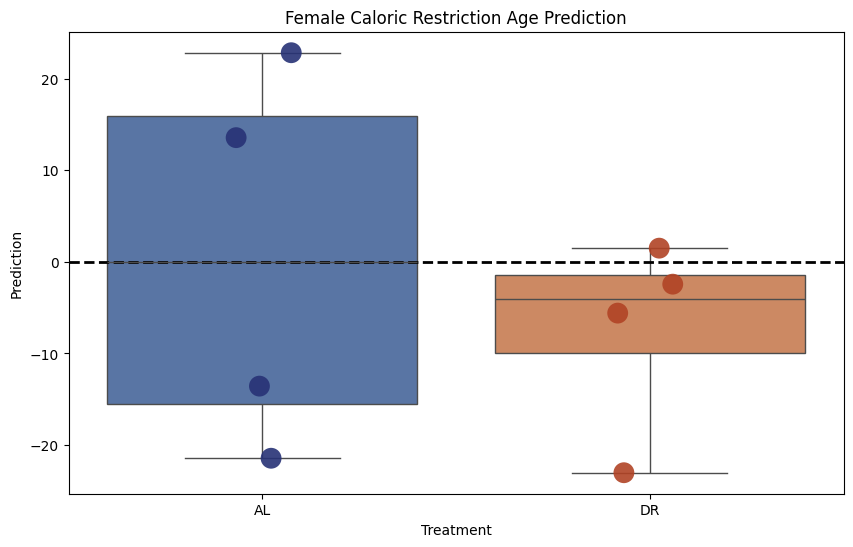

Components: 11
T-test p-value: 0.5759125178321303
Mann-Whitney U test p-value: 0.6857142857142857
              y_pred treatment
f_AL_L_1  132.848181        AL
f_AL_L_2   96.041027        AL
f_DR_L_1   88.055203        DR
f_DR_L_2  111.351109        DR
f_AL_L_3   88.464302        AL
f_AL_L_4  122.739100        AL
f_DR_L_3  104.735441        DR
f_DR_L_4  107.531581        DR
109.39006352278282
              y_pred treatment  prediction_adjust
f_AL_L_1  132.848181        AL          23.458117
f_AL_L_2   96.041027        AL         -13.349037
f_DR_L_1   88.055203        DR         -21.334860
f_DR_L_2  111.351109        DR           1.961046
f_AL_L_3   88.464302        AL         -20.925762
f_AL_L_4  122.739100        AL          13.349037
f_DR_L_3  104.735441        DR          -4.654622
f_DR_L_4  107.531581        DR          -1.858483


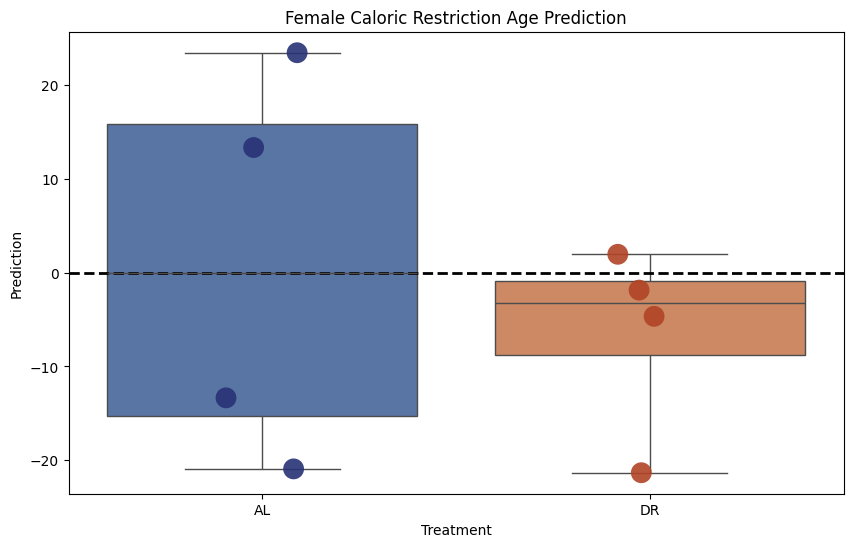

Components: 12
T-test p-value: 0.5936200617523686
Mann-Whitney U test p-value: 0.8857142857142857
              y_pred treatment
f_AL_L_1  128.549761        AL
f_AL_L_2   92.530075        AL
f_DR_L_1   84.945042        DR
f_DR_L_2  108.502362        DR
f_AL_L_3   84.817044        AL
f_AL_L_4  119.520843        AL
f_DR_L_3  101.140164        DR
f_DR_L_4  103.965613        DR
106.02545894301022
              y_pred treatment  prediction_adjust
f_AL_L_1  128.549761        AL          22.524302
f_AL_L_2   92.530075        AL         -13.495384
f_DR_L_1   84.945042        DR         -21.080417
f_DR_L_2  108.502362        DR           2.476903
f_AL_L_3   84.817044        AL         -21.208414
f_AL_L_4  119.520843        AL          13.495384
f_DR_L_3  101.140164        DR          -4.885295
f_DR_L_4  103.965613        DR          -2.059846


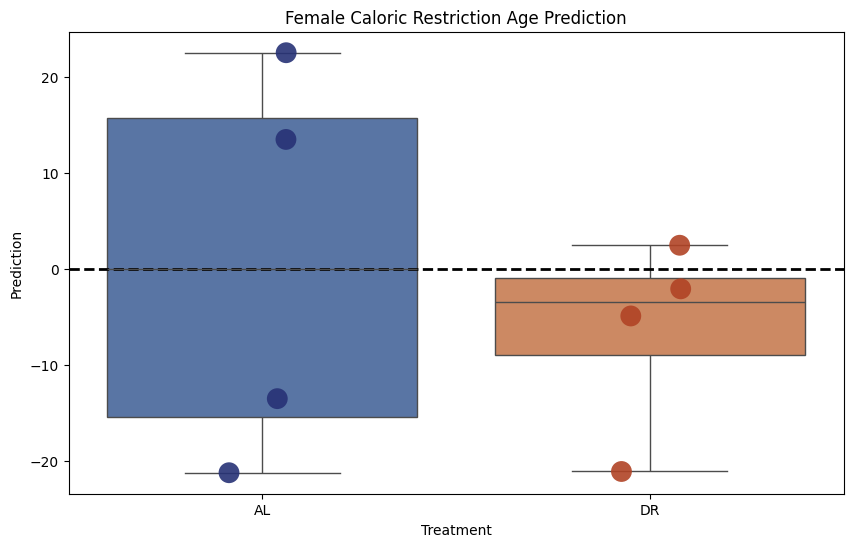

Components: 13
T-test p-value: 0.5818283937404045
Mann-Whitney U test p-value: 0.6857142857142857
              y_pred treatment
f_AL_L_1  129.561561        AL
f_AL_L_2   96.474240        AL
f_DR_L_1   87.668089        DR
f_DR_L_2  111.010311        DR
f_AL_L_3   89.023537        AL
f_AL_L_4  120.732284        AL
f_DR_L_3  103.960670        DR
f_DR_L_4  107.267051        DR
108.60326214233666
              y_pred treatment  prediction_adjust
f_AL_L_1  129.561561        AL          20.958299
f_AL_L_2   96.474240        AL         -12.129022
f_DR_L_1   87.668089        DR         -20.935173
f_DR_L_2  111.010311        DR           2.407049
f_AL_L_3   89.023537        AL         -19.579725
f_AL_L_4  120.732284        AL          12.129022
f_DR_L_3  103.960670        DR          -4.642593
f_DR_L_4  107.267051        DR          -1.336211


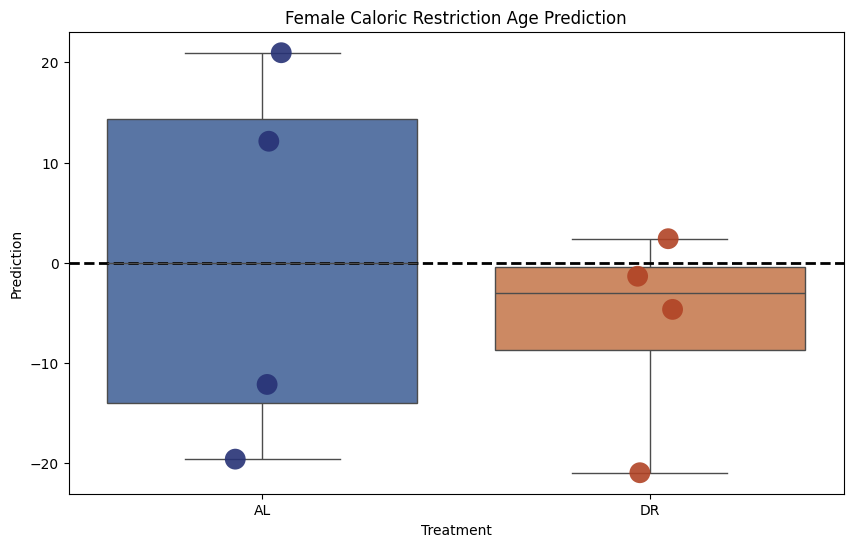

Components: 14
T-test p-value: 0.5582804666040961
Mann-Whitney U test p-value: 0.6857142857142857
              y_pred treatment
f_AL_L_1  129.748247        AL
f_AL_L_2   96.139495        AL
f_DR_L_1   87.113941        DR
f_DR_L_2  110.666157        DR
f_AL_L_3   89.074994        AL
f_AL_L_4  121.727509        AL
f_DR_L_3  103.741577        DR
f_DR_L_4  107.133768        DR
108.93350195170366
              y_pred treatment  prediction_adjust
f_AL_L_1  129.748247        AL          20.814745
f_AL_L_2   96.139495        AL         -12.794007
f_DR_L_1   87.113941        DR         -21.819561
f_DR_L_2  110.666157        DR           1.732655
f_AL_L_3   89.074994        AL         -19.858508
f_AL_L_4  121.727509        AL          12.794007
f_DR_L_3  103.741577        DR          -5.191925
f_DR_L_4  107.133768        DR          -1.799734


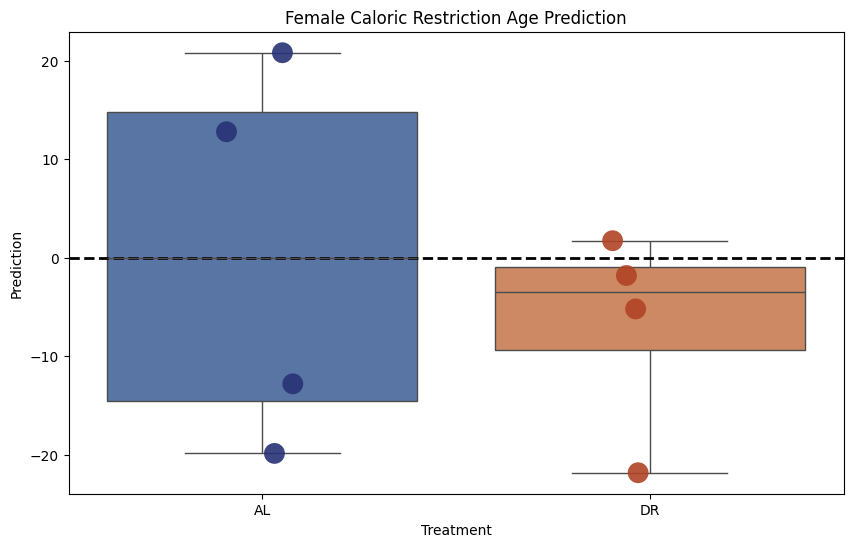

Components: 15
T-test p-value: 0.5768866342495311
Mann-Whitney U test p-value: 0.6857142857142857
              y_pred treatment
f_AL_L_1  129.149062        AL
f_AL_L_2   95.199988        AL
f_DR_L_1   86.863996        DR
f_DR_L_2  110.411429        DR
f_AL_L_3   88.817353        AL
f_AL_L_4  121.514470        AL
f_DR_L_3  103.575063        DR
f_DR_L_4  107.095393        DR
108.35722935010014
              y_pred treatment  prediction_adjust
f_AL_L_1  129.149062        AL          20.791832
f_AL_L_2   95.199988        AL         -13.157241
f_DR_L_1   86.863996        DR         -21.493233
f_DR_L_2  110.411429        DR           2.054199
f_AL_L_3   88.817353        AL         -19.539876
f_AL_L_4  121.514470        AL          13.157241
f_DR_L_3  103.575063        DR          -4.782166
f_DR_L_4  107.095393        DR          -1.261837


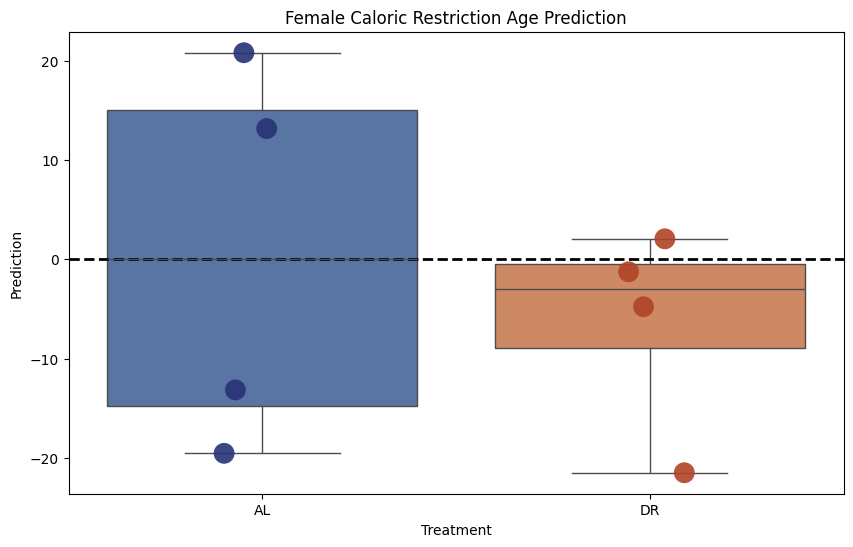

Components: 16
T-test p-value: 0.5757472964752233
Mann-Whitney U test p-value: 0.6857142857142857
              y_pred treatment
f_AL_L_1  129.143275        AL
f_AL_L_2   95.196358        AL
f_DR_L_1   86.780601        DR
f_DR_L_2  110.495133        DR
f_AL_L_3   88.809726        AL
f_AL_L_4  121.592884        AL
f_DR_L_3  103.539598        DR
f_DR_L_4  107.062816        DR
108.39462093535926
              y_pred treatment  prediction_adjust
f_AL_L_1  129.143275        AL          20.748654
f_AL_L_2   95.196358        AL         -13.198263
f_DR_L_1   86.780601        DR         -21.614020
f_DR_L_2  110.495133        DR           2.100512
f_AL_L_3   88.809726        AL         -19.584895
f_AL_L_4  121.592884        AL          13.198263
f_DR_L_3  103.539598        DR          -4.855023
f_DR_L_4  107.062816        DR          -1.331805


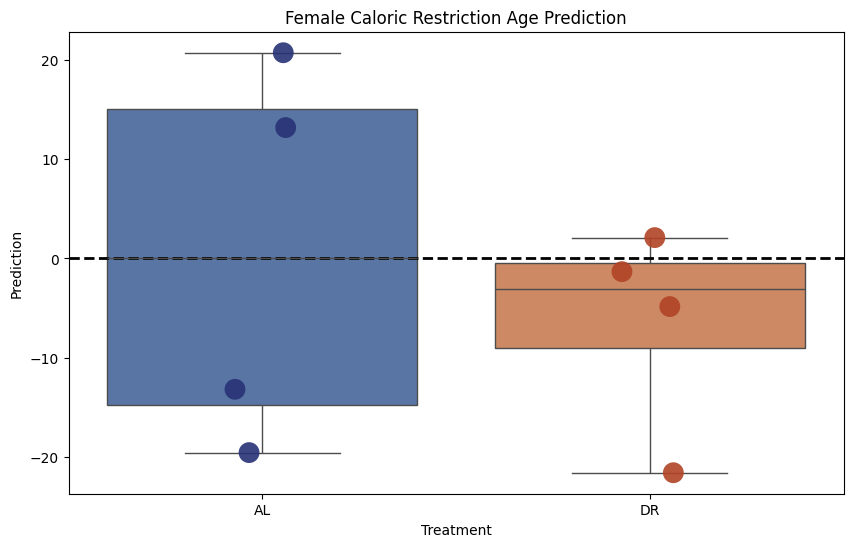

Components: 17
T-test p-value: 0.577574768323323
Mann-Whitney U test p-value: 0.6857142857142857
              y_pred treatment
f_AL_L_1  128.627653        AL
f_AL_L_2   94.943823        AL
f_DR_L_1   87.001481        DR
f_DR_L_2  109.900646        DR
f_AL_L_3   88.678630        AL
f_AL_L_4  121.125800        AL
f_DR_L_3  103.335792        DR
f_DR_L_4  106.753905        DR
108.03481157583158
              y_pred treatment  prediction_adjust
f_AL_L_1  128.627653        AL          20.592841
f_AL_L_2   94.943823        AL         -13.090989
f_DR_L_1   87.001481        DR         -21.033330
f_DR_L_2  109.900646        DR           1.865835
f_AL_L_3   88.678630        AL         -19.356181
f_AL_L_4  121.125800        AL          13.090989
f_DR_L_3  103.335792        DR          -4.699020
f_DR_L_4  106.753905        DR          -1.280906


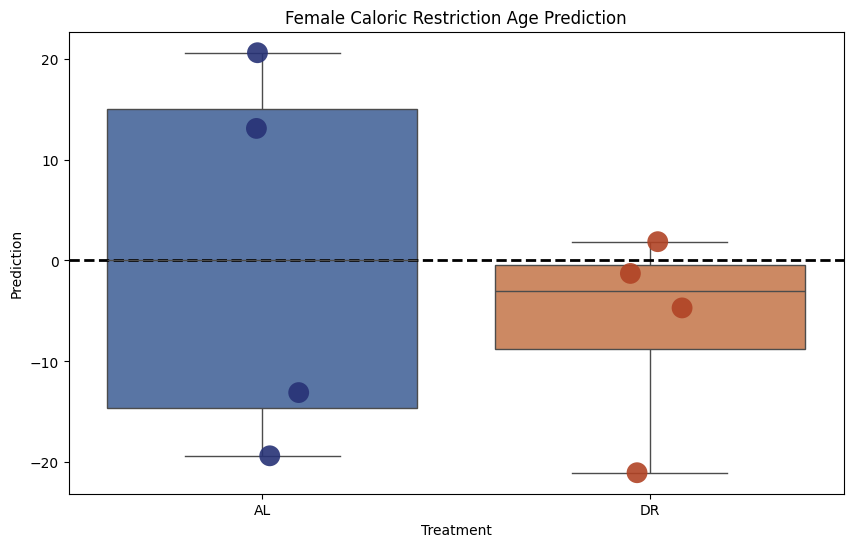

Components: 18
T-test p-value: 0.5705025411323759
Mann-Whitney U test p-value: 0.6857142857142857
              y_pred treatment
f_AL_L_1  128.380431        AL
f_AL_L_2   94.729988        AL
f_DR_L_1   86.833911        DR
f_DR_L_2  109.482185        DR
f_AL_L_3   88.614479        AL
f_AL_L_4  120.809184        AL
f_DR_L_3  103.077049        DR
f_DR_L_4  106.388931        DR
107.76958597776837
              y_pred treatment  prediction_adjust
f_AL_L_1  128.380431        AL          20.610845
f_AL_L_2   94.729988        AL         -13.039598
f_DR_L_1   86.833911        DR         -20.935675
f_DR_L_2  109.482185        DR           1.712599
f_AL_L_3   88.614479        AL         -19.155107
f_AL_L_4  120.809184        AL          13.039598
f_DR_L_3  103.077049        DR          -4.692537
f_DR_L_4  106.388931        DR          -1.380655


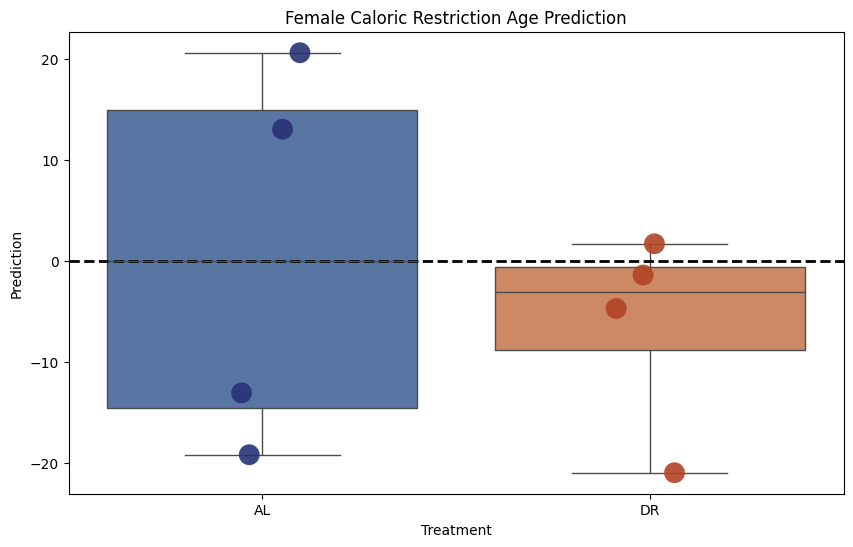

Components: 19
T-test p-value: 0.537637189183501
Mann-Whitney U test p-value: 0.6857142857142857
              y_pred treatment
f_AL_L_1  126.580158        AL
f_AL_L_2   94.657522        AL
f_DR_L_1   87.925344        DR
f_DR_L_2  107.731611        DR
f_AL_L_3   88.605034        AL
f_AL_L_4  120.017774        AL
f_DR_L_3  101.537174        DR
f_DR_L_4  105.063478        DR
107.3376477066052
              y_pred treatment  prediction_adjust
f_AL_L_1  126.580158        AL          19.242511
f_AL_L_2   94.657522        AL         -12.680126
f_DR_L_1   87.925344        DR         -19.412304
f_DR_L_2  107.731611        DR           0.393964
f_AL_L_3   88.605034        AL         -18.732614
f_AL_L_4  120.017774        AL          12.680126
f_DR_L_3  101.537174        DR          -5.800473
f_DR_L_4  105.063478        DR          -2.274170


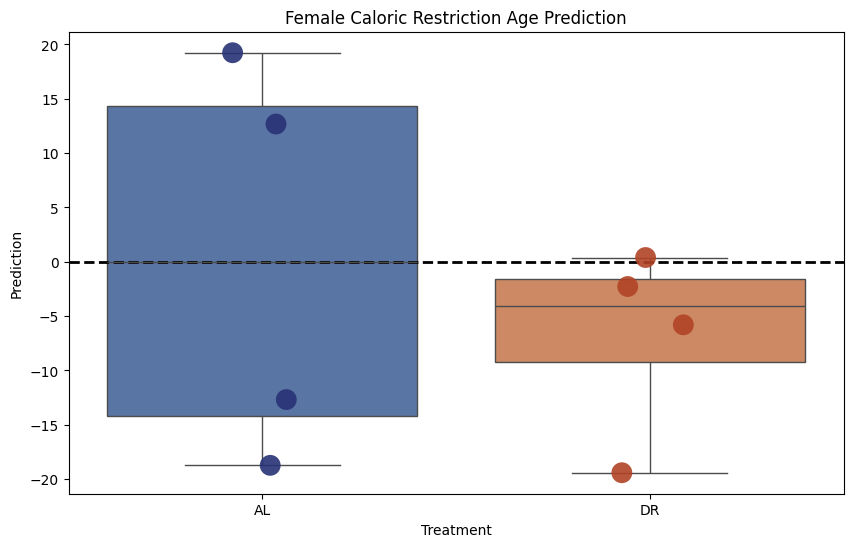

Components: 20
T-test p-value: 0.5429002071631516
Mann-Whitney U test p-value: 0.6857142857142857
              y_pred treatment
f_AL_L_1  125.264143        AL
f_AL_L_2   94.049527        AL
f_DR_L_1   87.702852        DR
f_DR_L_2  107.115688        DR
f_AL_L_3   88.155223        AL
f_AL_L_4  119.262140        AL
f_DR_L_3  100.765738        DR
f_DR_L_4  104.414565        DR
106.65583317837329
              y_pred treatment  prediction_adjust
f_AL_L_1  125.264143        AL          18.608310
f_AL_L_2   94.049527        AL         -12.606307
f_DR_L_1   87.702852        DR         -18.952981
f_DR_L_2  107.115688        DR           0.459855
f_AL_L_3   88.155223        AL         -18.500610
f_AL_L_4  119.262140        AL          12.606307
f_DR_L_3  100.765738        DR          -5.890095
f_DR_L_4  104.414565        DR          -2.241268


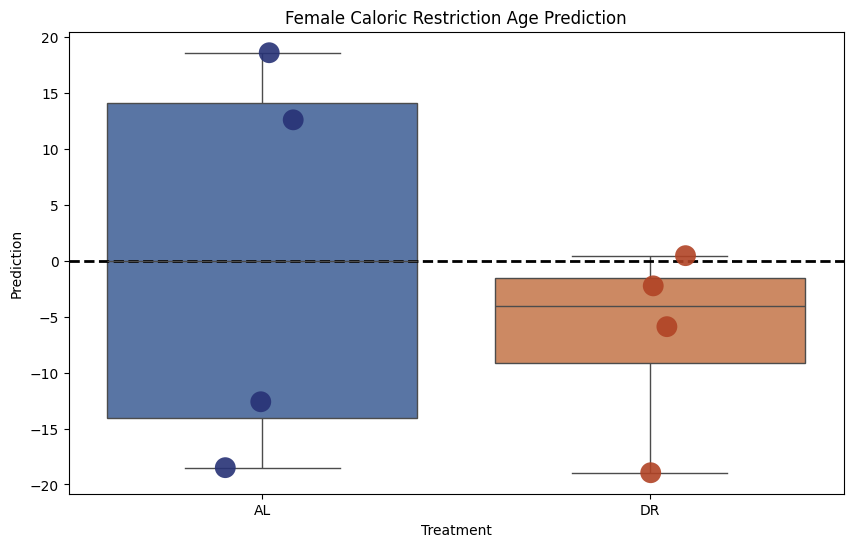

Components: 21
T-test p-value: 0.5609900391978109
Mann-Whitney U test p-value: 0.8857142857142857
              y_pred treatment
f_AL_L_1  125.807814        AL
f_AL_L_2   92.715796        AL
f_DR_L_1   87.836070        DR
f_DR_L_2  107.758903        DR
f_AL_L_3   87.153659        AL
f_AL_L_4  119.101910        AL
f_DR_L_3   99.872152        DR
f_DR_L_4  102.909726        DR
105.90885326000924
              y_pred treatment  prediction_adjust
f_AL_L_1  125.807814        AL          19.898961
f_AL_L_2   92.715796        AL         -13.193057
f_DR_L_1   87.836070        DR         -18.072783
f_DR_L_2  107.758903        DR           1.850049
f_AL_L_3   87.153659        AL         -18.755194
f_AL_L_4  119.101910        AL          13.193057
f_DR_L_3   99.872152        DR          -6.036702
f_DR_L_4  102.909726        DR          -2.999128


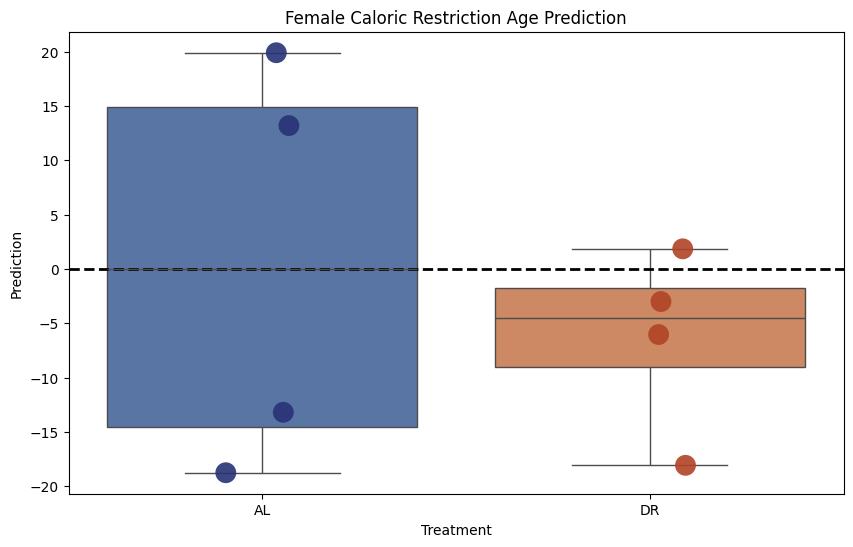

Components: 22
T-test p-value: 0.5782388966479342
Mann-Whitney U test p-value: 0.8857142857142857
              y_pred treatment
f_AL_L_1  125.082371        AL
f_AL_L_2   91.766530        AL
f_DR_L_1   87.803871        DR
f_DR_L_2  107.189259        DR
f_AL_L_3   86.246233        AL
f_AL_L_4  118.326479        AL
f_DR_L_3   98.885170        DR
f_DR_L_4  102.315927        DR
105.04650435331621
              y_pred treatment  prediction_adjust
f_AL_L_1  125.082371        AL          20.035866
f_AL_L_2   91.766530        AL         -13.279974
f_DR_L_1   87.803871        DR         -17.242633
f_DR_L_2  107.189259        DR           2.142755
f_AL_L_3   86.246233        AL         -18.800272
f_AL_L_4  118.326479        AL          13.279974
f_DR_L_3   98.885170        DR          -6.161334
f_DR_L_4  102.315927        DR          -2.730577


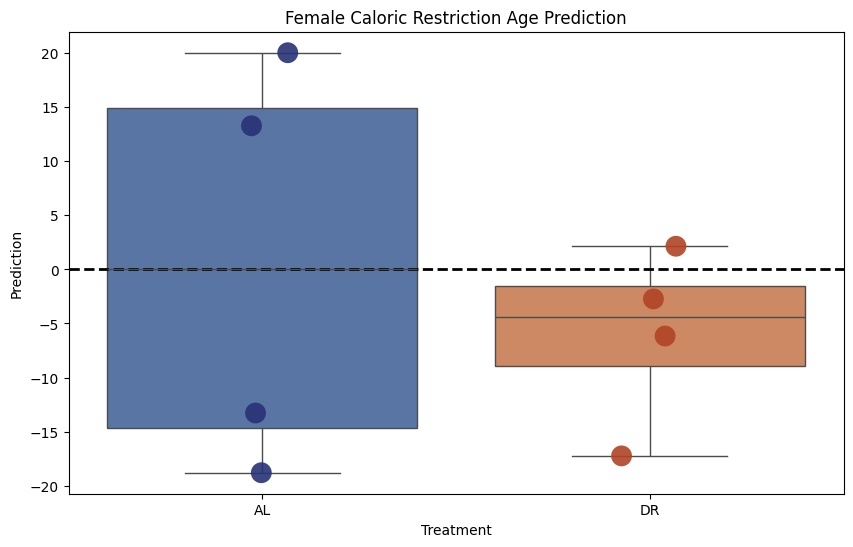

Components: 23
T-test p-value: 0.5782388966479329
Mann-Whitney U test p-value: 0.8857142857142857
              y_pred treatment
f_AL_L_1  125.082371        AL
f_AL_L_2   91.766530        AL
f_DR_L_1   87.803871        DR
f_DR_L_2  107.189259        DR
f_AL_L_3   86.246233        AL
f_AL_L_4  118.326479        AL
f_DR_L_3   98.885170        DR
f_DR_L_4  102.315927        DR
105.04650435331617
              y_pred treatment  prediction_adjust
f_AL_L_1  125.082371        AL          20.035866
f_AL_L_2   91.766530        AL         -13.279974
f_DR_L_1   87.803871        DR         -17.242633
f_DR_L_2  107.189259        DR           2.142755
f_AL_L_3   86.246233        AL         -18.800272
f_AL_L_4  118.326479        AL          13.279974
f_DR_L_3   98.885170        DR          -6.161334
f_DR_L_4  102.315927        DR          -2.730577


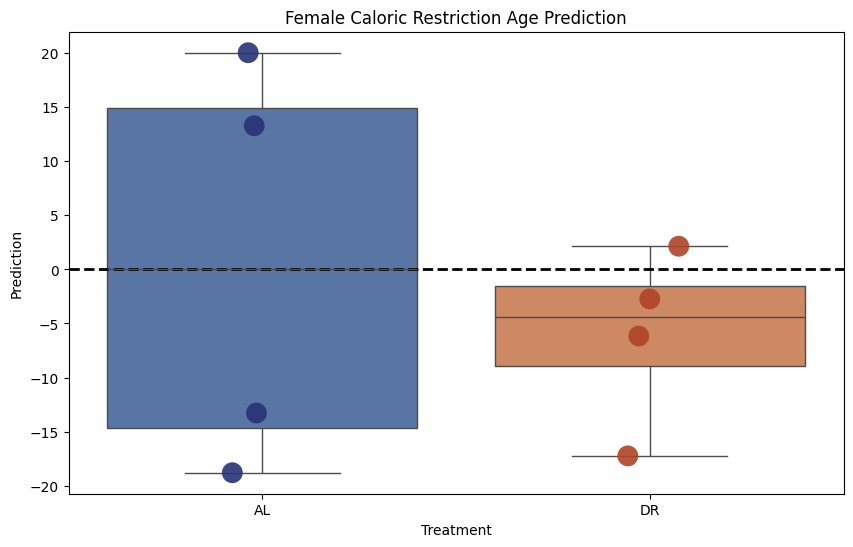

In [ ]:
# Loop through all possible components to predict the test set
max_components = min(X_train_scaled.shape[0], X_train_scaled.shape[1])
all_y_test_preds = []

for n_components in range(1, max_components + 1):
    print(f"Components: {n_components}")

    # Apply PCA
    pca = PCA(n_components=n_components, random_state=1)
    X_train_pca = pca.fit_transform(X_train_scaled)
    X_test_pca = pca.transform(X_test_scaled)

    # Train the model
    regressor = LinearRegression()
    regressor.fit(X_train_pca, age_train)

    # Predict on the test set
    y_test_pred = regressor.predict(X_test_pca)

    # Save the actual and predicted values to a DataFrame
    results_df = pd.DataFrame({
    'y_pred': y_test_pred
    }, index=df_cr_age_liver_female_norm_common_without_age.index.tolist())

    #print(results_df)
    df_cr = results_df.loc[df_cr_age_liver_female.index.tolist(), ]

    df_cr.head(5)

    df_cr["treatment"] = df_cr_age_liver["treatment"]

    df_cr.head(5)

    # Ensure predictions are numeric
    pred_al = pd.to_numeric(df_cr[df_cr['treatment'] == "AL"]['y_pred'], errors='coerce')
    pred_dr = pd.to_numeric(df_cr[df_cr['treatment'] == "DR"]['y_pred'], errors='coerce')

    # Drop any NaN values if necessary
    pred_al = pred_al.dropna()
    pred_dr = pred_dr.dropna()

    # Perform t-test
    t_stat, p_ttest = ttest_ind(pred_al, pred_dr, equal_var=False)  # Welch's t-test for unequal variances

    # Perform Mann-Whitney U test
    u_stat, p_mwu = mannwhitneyu(pred_al, pred_dr, alternative='two-sided')

    # Print results
    print(f"T-test p-value: {p_ttest}")
    print(f"Mann-Whitney U test p-value: {p_mwu}")

    # Filter the DataFrame to include only rows where true_age is 105
    filtered_df_al = df_cr[df_cr['treatment'] == "AL"]
    filtered_df_dr = df_cr[df_cr['treatment'] == "DR"]

    # Display the filtered DataFrame
    #print(filtered_df_al)
    print(df_cr)

    # Adjust to the median of the AL samples
    median_AL = df_cr[df_cr['treatment'] == 'AL']['y_pred'].median()
    print(median_AL)

    df_cr["prediction_adjust"] = df_cr["y_pred"] - median_AL
    print(df_cr)

    # Create the box plot
    plt.figure(figsize=(10, 6))
    box = sns.boxplot(x='treatment', y='prediction_adjust', hue='treatment', data=df_cr, palette='deep', showfliers = False, whis = [0,100])


    #custom_palette = ['#FF6347', '#4682B4', '#32CD32', '#FFD700']  # Use desired hex color codes
    custom_palette = ['#273276', '#B14325']  # Use desired hex color codes


    # Add data points with custom colors
    strip = sns.stripplot(
        x='treatment',
        y='prediction_adjust',
        hue='treatment',
        data=df_cr,
        palette=custom_palette,  # Custom color palette
        dodge=False,
        alpha=0.9,
        jitter=True,
        size=15
    )

    # Remove the legend if not needed
    #strip.legend_.remove()

    plt.axhline(y=0, color='black', linestyle='--', linewidth=2)

    # Customize the plot
    plt.title('Female Caloric Restriction Age Prediction')
    plt.xlabel('Treatment')
    plt.ylabel('Prediction')

    # Remove the grid
    plt.grid(False)
    out_file_name = f"liver_female_PCR_cr_medianadjust_n_components_{n_components}.svg"
    out_path = os.path.join("./outputs/pc_regression/", out_file_name)
    plt.savefig(out_path, dpi=300, bbox_inches="tight")

    # Show the plot
    plt.show()

    all_y_test_preds.append({
        'n_components': n_components,
        'y_test_pred': y_test_pred
    })

    # Save the DataFrame to a CSV file
    output_path = './outputs/pc_regression/'
    pc_num = "".join([str(n_components), "pcs"])
    out_file_prefix = 'ALDR_female_PCregression_medianadjust_pred'
    out_file_name = "_".join([out_file_prefix, pc_num])
    df_cr.to_csv(os.path.join(output_path, out_file_name), sep="\t")

# Convert predictions to a structured format if needed
# For example, save to a DataFrame or analyze further

##### Save PC loadings

In [ ]:
# Loop through all possible components to predict the test set
max_components = min(X_train_scaled.shape[0], X_train_scaled.shape[1])
all_y_test_preds = []

# Prepare directory to save PCA loadings
loadings_output_dir = './outputs/pc_regression/pca_loadings/female/'
os.makedirs(loadings_output_dir, exist_ok=True)

for n_components in range(1, max_components + 1):
    print(f"Components: {n_components}")

    # Apply PCA
    pca = PCA(n_components=n_components, random_state=1)
    X_train_pca = pca.fit_transform(X_train_scaled)
    X_test_pca = pca.transform(X_test_scaled)

    # Save PCA loadings
    loadings_df = pd.DataFrame(
    pca.components_,
    columns=X_train.columns if isinstance(X_train, pd.DataFrame) else [f"Feature_{i+1}" for i in range(X_train_scaled.shape[1])],
    index=[f"PC{i+1}" for i in range(n_components)])

    loadings_file_name = f"pca_loadings_{n_components}components.csv"
    loadings_df.to_csv(os.path.join(loadings_output_dir, loadings_file_name), sep="\t")

    for pc in loadings_df.index:
      top_genes = loadings_df.loc[pc].abs().nlargest(30)
      print(f"Top genes for {pc}:")
      print(top_genes)
      top_genes.to_csv(os.path.join(loadings_output_dir, f"top_genes_{pc}.csv"), sep="\t")

    # plt.figure(figsize=(12, 8))
    # sns.heatmap(loadings_df, cmap='coolwarm', annot=False)
    # plt.title('PCA Loadings')
    # plt.xlabel('Genes')
    # plt.ylabel('Principal Components')
    # plt.show()



Streaming output truncated to the last 5000 lines.
Components: 16
Top genes for PC1:
LOC107384872    0.016855
dohh            0.016401
LOC107383491    0.016382
LOC107394770    0.016309
cdv3            0.016290
LOC107372411    0.016208
LOC107384756    0.016187
LOC107378494    0.016153
mdn1            0.016152
eif3j           0.016104
rrp15           0.016081
lyar            0.015992
timm8b          0.015949
cnbp            0.015897
surf2           0.015832
hnrnpu          0.015819
eif4a3          0.015802
exosc6          0.015785
LOC107384406    0.015769
srsf2           0.015747
kri1            0.015741
ppig            0.015736
mpv17           0.015701
LOC107381657    0.015699
LOC107389840    0.015647
nifk            0.015628
LOC107374393    0.015608
bop1            0.015583
mrpl21          0.015576
zc3hc1          0.015552
Name: PC1, dtype: float64
Top genes for PC2:
scfd1           0.018303
LOC107392618    0.018016
LOC107378135    0.017911
sec22b          0.017902
slc11a2         0.01